<img src='a.png'>

# Problem Statement
<p>Ask a home buyer to describe their dream house, and they probably won't begin   with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.
With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.</p>
    
# Real World/ Business Objectives and Constraints

### Objectives:
1.	Predict the sale price for each house.
1.	Minimize the difference between predicted and actual rating (RMSE/MSE) 

### Constraints:
1. Some form of interpretability

# Mapping the real world problem to a Machine Learning Problem

##  Type of Machine Learning Problem :
				
- This problem involves predicting the prices of the houses which are continuous and real valued outputs. Thus, this is a __Regression Problem.__ 

# Performance metric 
<p>Root Mean Square Error: https://en.wikipedia.org/wiki/Root-mean-square_deviation</p>

# Machine Learning Objective and Constraints 
1.	Minimize RMSE.
1.	Try to provide some interpretability.


In [139]:
#import all the necessary packages.
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
from keras.initializers import he_normal
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.layers import Dropout

from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import math
import time
import re
import os
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity  
from sklearn.metrics import pairwise_distances
from matplotlib import gridspec
from scipy.sparse import hstack
import plotly
import plotly.figure_factory as ff
from plotly.graph_objs import Scatter, Layout

plotly.offline.init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

In [140]:
import os
os.chdir('C:/Users/kingsubham27091995/AITSInternship/HousePricePrediction')

In [141]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

In [142]:
print("Number of data points in train data:{0} and Number of features in train data:{1}".format(train_data.shape[0],train_data.shape[1]))
print("Number of data points in test data:{0} and Number of features in test data:{1}".format(test_data.shape[0],test_data.shape[1]))

Number of data points in train data:1460 and Number of features in train data:81
Number of data points in test data:1459 and Number of features in test data:80


In [143]:
train_data.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [144]:
test_data.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities      ...       ScreenPorch PoolArea PoolQC  Fence  \
0         Lvl    AllPub      ...               120        0    NaN  MnPrv   
1         Lvl    AllPub      ...                 0        0    NaN    NaN   
2         Lvl    AllPub      ...                 0        0    NaN  MnPrv   
3         Lvl    AllPub      ...                 0        0    NaN    NaN   
4         HLS    AllPub      ...               144        0    NaN    NaN   

  MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         NaN       0      6    2010        WD         Normal  
1        Gar2   12500      6    2010        WD         Normal  
2         NaN       0      3    2010        WD         Normal  
3         NaN       0      6    2010        WD         Normal  
4         NaN       0      1    2010        WD         Normal  

[5 rows x 80 columns]

## Observation:
- There are 1460 datapoints in Train data, and 1459 datapoints in Test data.
- We can also dee NaN's in the data, which needs to be handled carefully.

## Train Data Information:

In [145]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## Test Data Information

In [146]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

## Basic Statistics for each feature in Train Data

In [147]:
for i in train_data.columns:
    print("Basic statistics for feature : {0}".format(i))
    print(train_data[i].describe())
    print("---------------------------------------------")

Basic statistics for feature : Id
count    1460.000000
mean      730.500000
std       421.610009
min         1.000000
25%       365.750000
50%       730.500000
75%      1095.250000
max      1460.000000
Name: Id, dtype: float64
---------------------------------------------
Basic statistics for feature : MSSubClass
count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64
---------------------------------------------
Basic statistics for feature : MSZoning
count     1460
unique       5
top         RL
freq      1151
Name: MSZoning, dtype: object
---------------------------------------------
Basic statistics for feature : LotFrontage
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
-----------------

count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64
---------------------------------------------
Basic statistics for feature : 2ndFlrSF
count    1460.000000
mean      346.992466
std       436.528436
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64
---------------------------------------------
Basic statistics for feature : LowQualFinSF
count    1460.000000
mean        5.844521
std        48.623081
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       572.000000
Name: LowQualFinSF, dtype: float64
---------------------------------------------
Basic statistics for feature : GrLivArea
count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1

## Basic Statistics for each feature in Test Data

In [148]:
for i in test_data.columns:
    print("Basic statistics for feature : {0}".format(i))
    print(train_data[i].describe())
    print("---------------------------------------------")

Basic statistics for feature : Id
count    1460.000000
mean      730.500000
std       421.610009
min         1.000000
25%       365.750000
50%       730.500000
75%      1095.250000
max      1460.000000
Name: Id, dtype: float64
---------------------------------------------
Basic statistics for feature : MSSubClass
count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64
---------------------------------------------
Basic statistics for feature : MSZoning
count     1460
unique       5
top         RL
freq      1151
Name: MSZoning, dtype: object
---------------------------------------------
Basic statistics for feature : LotFrontage
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
-----------------

count    1460.000000
mean        1.767123
std         0.747315
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64
---------------------------------------------
Basic statistics for feature : GarageArea
count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64
---------------------------------------------
Basic statistics for feature : GarageQual
count     1379
unique       5
top         TA
freq      1311
Name: GarageQual, dtype: object
---------------------------------------------
Basic statistics for feature : GarageCond
count     1379
unique       5
top         TA
freq      1326
Name: GarageCond, dtype: object
---------------------------------------------
Basic statistics for feature : PavedDrive
count     1460
unique       3
top          Y
freq      1340
Na

## Checking for NaN in our Train data

In [149]:
train_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

## Checking for NaN in our Test data

In [150]:
test_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt        78
GarageFinish       78
GarageCars          1
GarageArea          1
GarageQual         78
GarageCond

## Using Pandas Profiling to get more insights

### Train Data

In [151]:
import pandas_profiling as pp
pp.ProfileReport(train_data)

### Test Data

In [152]:
import pandas_profiling as pp
pp.ProfileReport(test_data)

## Lets check Statistics of Output Variable now: 


In [153]:
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

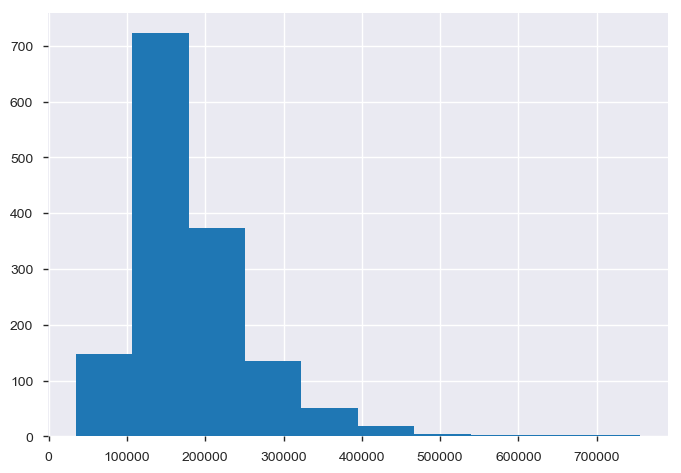

In [154]:
plt.hist(train_data['SalePrice'])
plt.show()

In [155]:
print ("Skew of SalePrice:", train_data['SalePrice'].skew())

Skew of SalePrice: 1.8828757597682129


## Observation:  
- This looks skewed towards the right with Skew of 1.8828757597682129

## Fact :

- The __Log Transformation__ can be used to make highly skewed distributions less skewed. The comparison of the means of log-transformed data is actually a comparison of geometric means. This occurs because, as shown below, the anti-log of the arithmetic mean of log-transformed values is the geometric mean.

### Lets apply Log Transform:

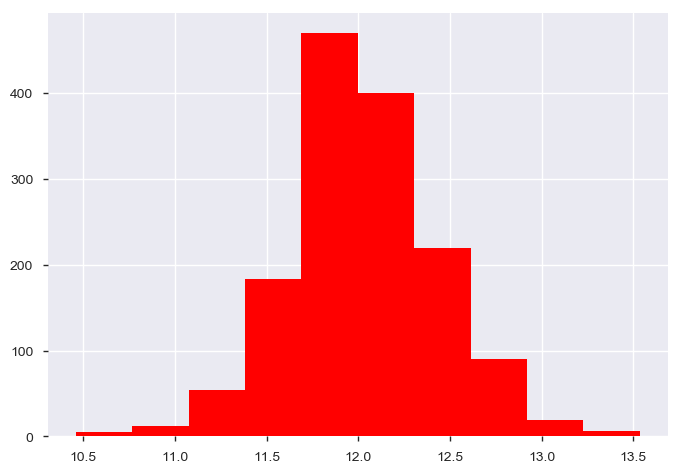

In [156]:
train_data['LT_SalePrice'] = np.log(train_data['SalePrice']+1)
plt.hist(train_data['LT_SalePrice'], color='red')
plt.show()

In [157]:
print ("Skew of Log Transformed SalePrice:", train_data['LT_SalePrice'].skew())

Skew of Log Transformed SalePrice: 0.12134661989685333


## Observation:  
- This looks normal with Skew of 0.12134661989685333

## Checking for Correlation with Output Features:

In [158]:
train_data.select_dtypes(include=[np.number]).columns.values

array(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'LT_SalePrice'], dtype=object)

In [159]:
zero_feat=[  'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold','LT_SalePrice']
out_feat=['SalePrice']

In [160]:
from scipy.stats import pearsonr
for i in zero_feat:
    for j in out_feat:   
        corr, _ = pearsonr(train_data[i], train_data[j])
        print('Pearsons correlation of {0} with {1} is {2}'.format(i,j,corr))
    print('-'*60)

Pearsons correlation of MSSubClass with SalePrice is -0.08428413512659517
------------------------------------------------------------
Pearsons correlation of LotFrontage with SalePrice is nan
------------------------------------------------------------
Pearsons correlation of LotArea with SalePrice is 0.2638433538714056
------------------------------------------------------------
Pearsons correlation of OverallQual with SalePrice is 0.7909816005838051
------------------------------------------------------------
Pearsons correlation of OverallCond with SalePrice is -0.077855894048678
------------------------------------------------------------
Pearsons correlation of YearBuilt with SalePrice is 0.5228973328794969
------------------------------------------------------------
Pearsons correlation of YearRemodAdd with SalePrice is 0.5071009671113862
------------------------------------------------------------
Pearsons correlation of MasVnrArea with SalePrice is nan
------------------------

## Inference:
- We can see that columns which has mostly zeros has very low correlation(i.e. in negative or very small positive values) with Output Feature

# Lets visualize the Correlation Matrix for better understanding

### Train Data

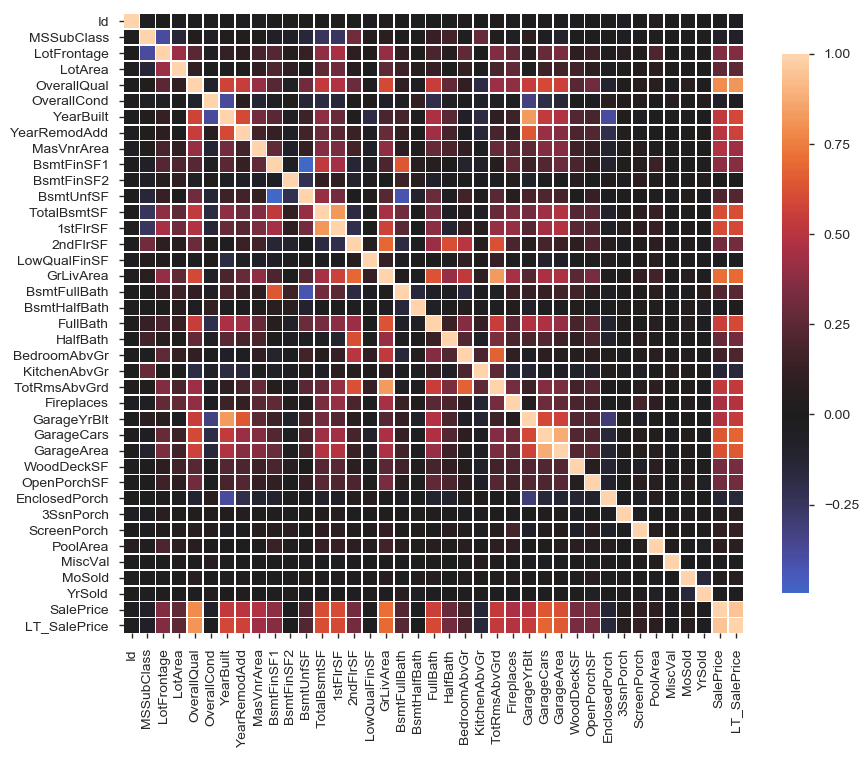

In [161]:
# www.kaggle.com
def correlation_heatmap(train_data):
    correlations = train_data.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5,  cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(train_data)

### Test Data

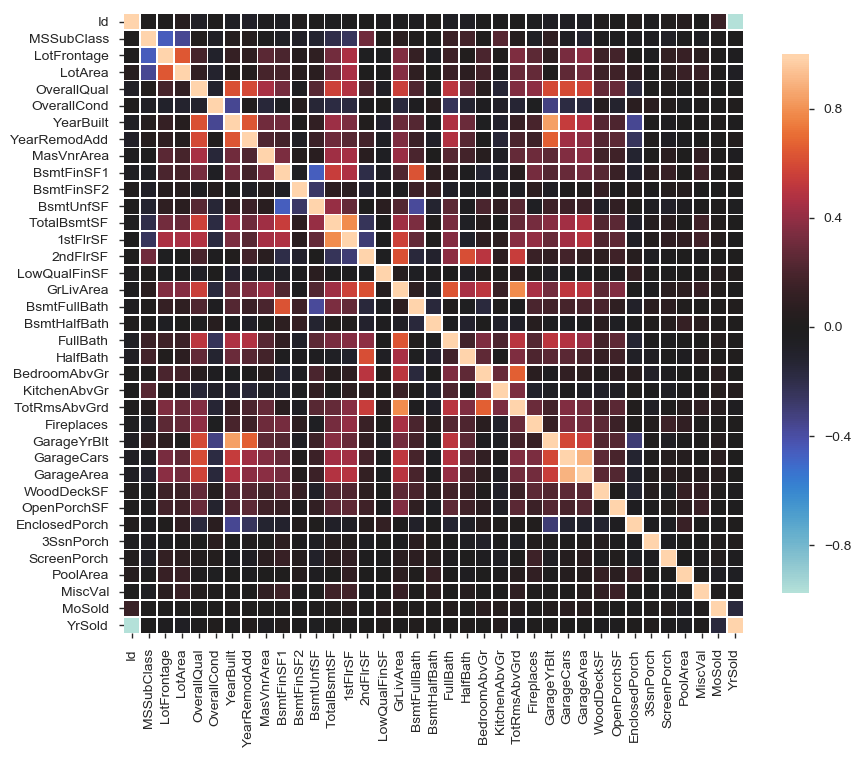

In [162]:
# www.kaggle.com
def correlation_heatmap(test_data):
    correlations = test_data.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5,  cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(test_data)

## Observation:
- We can see that there isn't much correlation among the input features .  Thus there is no Multicollinearity among the features. This is good. 
- Few Features have greater than 0.5 Pearson Correlation with output feature. 

## It's time to deal with the NaN or Null Values :

In [163]:
#Removing the null values
null_values = pd.DataFrame(train_data.isnull().sum().sort_values(ascending=False)[:10])
null_values.index.name = 'Feature'
null_values.columns = ['Number of Null Values']
null_values

Number of Null Values
Feature                            
PoolQC                         1453
MiscFeature                    1406
Alley                          1369
Fence                          1179
FireplaceQu                     690
LotFrontage                     259
GarageQual                       81
GarageCond                       81
GarageFinish                     81
GarageType                       81

In [164]:
nan_rows=train_data.iloc[np.where(train_data.isnull())]
print(nan_rows)

     Alley FireplaceQu PoolQC  Fence MiscFeature Alley PoolQC  Fence  \
0      NaN         NaN    NaN    NaN         NaN   NaN    NaN    NaN   
0      NaN         NaN    NaN    NaN         NaN   NaN    NaN    NaN   
0      NaN         NaN    NaN    NaN         NaN   NaN    NaN    NaN   
0      NaN         NaN    NaN    NaN         NaN   NaN    NaN    NaN   
0      NaN         NaN    NaN    NaN         NaN   NaN    NaN    NaN   
1      NaN          TA    NaN    NaN         NaN   NaN    NaN    NaN   
1      NaN          TA    NaN    NaN         NaN   NaN    NaN    NaN   
1      NaN          TA    NaN    NaN         NaN   NaN    NaN    NaN   
1      NaN          TA    NaN    NaN         NaN   NaN    NaN    NaN   
2      NaN          TA    NaN    NaN         NaN   NaN    NaN    NaN   
2      NaN          TA    NaN    NaN         NaN   NaN    NaN    NaN   
2      NaN          TA    NaN    NaN         NaN   NaN    NaN    NaN   
2      NaN          TA    NaN    NaN         NaN   NaN    NaN   

In [165]:
nan2_rows=test_data.iloc[np.where(test_data.isnull())]
print(nan2_rows)

     Alley FireplaceQu PoolQC MiscFeature Alley FireplaceQu PoolQC  Fence  \
0      NaN         NaN    NaN         NaN   NaN         NaN    NaN  MnPrv   
0      NaN         NaN    NaN         NaN   NaN         NaN    NaN  MnPrv   
0      NaN         NaN    NaN         NaN   NaN         NaN    NaN  MnPrv   
0      NaN         NaN    NaN         NaN   NaN         NaN    NaN  MnPrv   
1      NaN         NaN    NaN        Gar2   NaN         NaN    NaN    NaN   
1      NaN         NaN    NaN        Gar2   NaN         NaN    NaN    NaN   
1      NaN         NaN    NaN        Gar2   NaN         NaN    NaN    NaN   
1      NaN         NaN    NaN        Gar2   NaN         NaN    NaN    NaN   
2      NaN          TA    NaN         NaN   NaN          TA    NaN  MnPrv   
2      NaN          TA    NaN         NaN   NaN          TA    NaN  MnPrv   
2      NaN          TA    NaN         NaN   NaN          TA    NaN  MnPrv   
3      NaN          Gd    NaN         NaN   NaN          Gd    NaN    NaN   

## Lets see Categorical Features: 

In [166]:
train_data.select_dtypes(exclude=[np.number]).columns.values

array(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'], dtype=object)

In [1]:
cat_feat=['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'] 

In [168]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [169]:
data = train_data.select_dtypes(include=[np.number]).interpolate().dropna()


In [170]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples = 100, random_state = 42)
clf.fit(data)
y_noano = clf.predict(data)
y_noano = pd.DataFrame(y_noano, columns = ['Top'])
y_noano[y_noano['Top'] == 1].index.values

data = data.iloc[y_noano[y_noano['Top'] == 1].index.values]
data.reset_index(drop = True, inplace = True)
print("Number of Outliers:", y_noano[y_noano['Top'] == -1].shape[0])
print("Number of rows without outliers:", data.shape[0])

Number of Outliers: 146
Number of rows without outliers: 1314


In [171]:
data.head(5)

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1      ...       OpenPorchSF  \
0          2003       196.0         706      ...                61   
1          1976         0.0         978      ...                 0   
2          2002       162.0         486      ...                42   
3          1970         0.0         216      ...                35   
4          2000       350.0         655      ...                84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  LT_SalePrice  
0     208500     12.247699  
1     181500     12.109016  
2     223500     12.317171  
3     140000     11.849405  
4     250000     12.429220  

[5 rows x 39 columns]

In [172]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler

col_train = list(data.columns)
col_train_bis = list(data.columns)

col_train_bis.remove('SalePrice')

mat_train = np.matrix(data)
#mat_test  = np.matrix(test_)
mat_new = np.matrix(data.drop('SalePrice',axis = 1))
mat_y = np.array(data.SalePrice).reshape((1314,1))

prepro_y = MinMaxScaler()
prepro_y.fit(mat_y)

prepro = MinMaxScaler()
prepro.fit(mat_train)

prepro_test = MinMaxScaler()
prepro_test.fit(mat_new)

train = pd.DataFrame(prepro.transform(mat_train),columns = col_train)
#test  = pd.DataFrame(prepro_test.transform(mat_test),columns = col_train_bis)

train.head()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0  0.000000    0.235294     0.150685  0.062802     0.666667        0.500   
1  0.000685    0.000000     0.202055  0.072904     0.555556        0.875   
2  0.001371    0.235294     0.160959  0.087396     0.666667        0.500   
3  0.002056    0.294118     0.133562  0.072464     0.666667        0.500   
4  0.002742    0.235294     0.215753  0.113835     0.777778        0.500   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1      ...       OpenPorchSF  \
0   0.956204      0.883333     0.12250    0.428919      ...          0.116635   
1   0.759124      0.433333     0.00000    0.594168      ...          0.000000   
2   0.941606      0.866667     0.10125    0.295261      ...          0.080306   
3   0.313869      0.333333     0.00000    0.131227      ...          0.066922   
4   0.934307      0.833333     0.21875    0.397934      ...          0.160612   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal    MoSold  YrSold  \
0       0.000000        0.0          0.0       0.0      0.0  0.090909    0.50   
1       0.000000        0.0          0.0       0.0      0.0  0.363636    0.25   
2       0.000000        0.0          0.0       0.0      0.0  0.727273    0.50   
3       0.824242        0.0          0.0       0.0      0.0  0.090909    0.00   
4       0.000000        0.0          0.0       0.0      0.0  1.000000    0.50   

   SalePrice  LT_SalePrice  
0   0.481831      0.736519  
1   0.406892      0.679374  
2   0.523464      0.765146  
3   0.291708      0.572400  
4   0.597016      0.811316  

[5 rows x 39 columns]

In [173]:
# Linear Model for the  train and test
y = np.log(train_data.SalePrice)
X = train_data.drop(['SalePrice', 'Id'], axis=1)

In [174]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=.33)

In [38]:
X_train=train_data[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'LT_SalePrice']]
y_train=train_data['SalePrice']

In [39]:
test_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [40]:
X_test=test_data[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']]

## Handling NaN values

In [175]:
X_train=X_train.fillna(0)
nan_rows=X_train.iloc[np.where(X_train.isnull())]
print(nan_rows)

Empty DataFrame
Columns: []
Index: []


In [176]:
X_train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
615           85       RL         80.0     8800   Pave     0      Reg   
613           20       RL         70.0     8402   Pave     0      Reg   
1303          20       RL         73.0     8688   Pave     0      Reg   
486           20       RL         79.0    10289   Pave     0      Reg   
561           20       RL         77.0    10010   Pave     0      Reg   

     LandContour Utilities LotConfig      ...      PoolArea PoolQC  Fence  \
615          Lvl    AllPub    Inside      ...             0      0  MnPrv   
613          Lvl    AllPub    Inside      ...             0      0      0   
1303         Lvl    AllPub    Inside      ...             0      0      0   
486          Lvl    AllPub    Inside      ...             0      0      0   
561          Lvl    AllPub    Inside      ...             0      0      0   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  LT_SalePrice  
615            0       0      5    2010        WD        Abnorml     11.831386  
613            0       0     12    2007       New        Partial     11.898195  
1303           0       0      4    2006        WD         Normal     12.354497  
486            0       0      6    2007        WD         Normal     11.957618  
561            0       0      4    2006        WD         Normal     12.043560  

[5 rows x 80 columns]

In [178]:
X_test=X_test.fillna(0)
nan_rows=X_test.iloc[np.where(X_test.isnull())]
print(nan_rows)

Empty DataFrame
Columns: []
Index: []


In [179]:
X_test.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
892           20       RL         70.0     8414   Pave     0      Reg   
1105          60       RL         98.0    12256   Pave     0      IR1   
413           30       RM         56.0     8960   Pave  Grvl      Reg   
522           50       RM         50.0     5000   Pave     0      Reg   
1036          20       RL         89.0    12898   Pave     0      IR1   

     LandContour Utilities LotConfig      ...      PoolArea PoolQC  Fence  \
892          Lvl    AllPub    Inside      ...             0      0  MnPrv   
1105         Lvl    AllPub    Corner      ...             0      0      0   
413          Lvl    AllPub    Inside      ...             0      0      0   
522          Lvl    AllPub    Corner      ...             0      0      0   
1036         HLS    AllPub    Inside      ...             0      0      0   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  LT_SalePrice  
892            0       0      2    2006        WD         Normal     11.947956  
1105           0       0      4    2010        WD         Normal     12.691584  
413            0       0      3    2010        WD         Normal     11.652696  
522            0       0     10    2006        WD         Normal     11.976666  
1036           0       0      9    2009        WD         Normal     12.661917  

[5 rows x 80 columns]

## Vectorization of Numerical Features

In [180]:
zero_feat=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold']


In [181]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

def numerical_vectorizations(m,o):
    
    scalars = StandardScaler()
    scalars.fit(m.values.reshape(-1,1)) 
    print(f"Mean : {scalars.mean_[0]}, Standard deviation : {np.sqrt(scalars.var_[0])}")

    standardized_train = scalars.transform(m.values.reshape(-1, 1))
    standardized_test = scalars.transform(o.values.reshape(-1, 1))
    return standardized_train,standardized_test

In [182]:
std_train_1 ,std_test_1 = numerical_vectorizations(X_train['MSSubClass'],X_test['MSSubClass'])
print("After Column Standardisation: ")
print(std_train_1.shape, y_train.shape)
print(std_test_1.shape)

Mean : 57.2239263803681, Standard deviation : 42.85191078346649
After Column Standardisation: 
(978, 1) (978,)
(482, 1)


In [183]:
std_train_2 ,std_test_2 = numerical_vectorizations(X_train['LotFrontage'],X_test['LotFrontage'])
print("After Column Standardisation: ")
print(std_train_2.shape, y_train.shape)
print(std_test_2.shape)

Mean : 57.13292433537832, Standard deviation : 35.78612793804264
After Column Standardisation: 
(978, 1) (978,)
(482, 1)


In [184]:
std_train_3 ,std_test_3 = numerical_vectorizations(X_train['LotArea'],X_test['LotArea'])
print("After Column Standardisation: ")
print(std_train_3.shape, y_train.shape)
print(std_test_3.shape)

Mean : 10743.494887525563, Standard deviation : 11550.28439953305
After Column Standardisation: 
(978, 1) (978,)
(482, 1)


In [185]:
std_train_4 ,std_test_4 = numerical_vectorizations(X_train['OverallQual'],X_test['OverallQual'])
print("After Column Standardisation: ")
print(std_train_4.shape, y_train.shape)
print(std_test_4.shape)

Mean : 6.119631901840491, Standard deviation : 1.3697741620781114
After Column Standardisation: 
(978, 1) (978,)
(482, 1)


In [186]:
std_train_5 ,std_test_5 = numerical_vectorizations(X_train['OverallCond'],X_test['OverallCond'])
print("After Column Standardisation: ")
print(std_train_5.shape, y_train.shape)
print(std_test_5.shape)

Mean : 5.567484662576687, Standard deviation : 1.1132433925210412
After Column Standardisation: 
(978, 1) (978,)
(482, 1)


In [187]:
std_train_6 ,std_test_6 = numerical_vectorizations(X_train['YearBuilt'],X_test['YearBuilt'])
print("After Column Standardisation: ")
print(std_train_6.shape, y_train.shape)
print(std_test_6.shape)

Mean : 1971.0071574642127, Standard deviation : 30.737175820178454
After Column Standardisation: 
(978, 1) (978,)
(482, 1)


In [188]:
std_train_7 ,std_test_7 = numerical_vectorizations(X_train['YearRemodAdd'],X_test['YearRemodAdd'])
print("After Column Standardisation: ")
print(std_train_7.shape, y_train.shape)
print(std_test_7.shape)

Mean : 1984.8486707566462, Standard deviation : 20.749691481974384
After Column Standardisation: 
(978, 1) (978,)
(482, 1)


In [189]:
std_train_8 ,std_test_8 = numerical_vectorizations(X_train['MasVnrArea'],X_test['MasVnrArea'])
print("After Column Standardisation: ")
print(std_train_8.shape, y_train.shape)
print(std_test_8.shape)

Mean : 107.16973415132924, Standard deviation : 174.84222459450783
After Column Standardisation: 
(978, 1) (978,)
(482, 1)


In [190]:
std_train_9 ,std_test_9 = numerical_vectorizations(X_train['BsmtFinSF1'],X_test['BsmtFinSF1'])
print("After Column Standardisation: ")
print(std_train_9.shape, y_train.shape)
print(std_test_9.shape)

Mean : 448.719836400818, Standard deviation : 459.74668853932724
After Column Standardisation: 
(978, 1) (978,)
(482, 1)


In [191]:
std_train_10 ,std_test_10 = numerical_vectorizations(X_train['BsmtFinSF2'],X_test['BsmtFinSF2'])
print("After Column Standardisation: ")
print(std_train_10.shape, y_train.shape)
print(std_test_10.shape)

Mean : 41.670756646216766, Standard deviation : 151.68049775236432
After Column Standardisation: 
(978, 1) (978,)
(482, 1)


In [192]:
std_train_11 ,std_test_11 = numerical_vectorizations(X_train['BsmtUnfSF'],X_test['BsmtUnfSF'])
print("After Column Standardisation: ")
print(std_train_11.shape, y_train.shape)
print(std_test_11.shape)

Mean : 568.861963190184, Standard deviation : 443.9619384893594
After Column Standardisation: 
(978, 1) (978,)
(482, 1)


In [193]:
std_train_12 ,std_test_12 = numerical_vectorizations(X_train['TotalBsmtSF'],X_test['TotalBsmtSF'])
print("After Column Standardisation: ")
print(std_train_12.shape, y_train.shape)
print(std_test_12.shape)

Mean : 1059.2525562372189, Standard deviation : 447.46458728009276
After Column Standardisation: 
(978, 1) (978,)
(482, 1)


In [194]:
std_train_13 ,std_test_13 = numerical_vectorizations(X_train['1stFlrSF'],X_test['1stFlrSF'])
print("After Column Standardisation: ")
print(std_train_13.shape, y_train.shape)
print(std_test_13.shape)

Mean : 1167.864008179959, Standard deviation : 389.15747822175814
After Column Standardisation: 
(978, 1) (978,)
(482, 1)


In [195]:
std_train_14 ,std_test_14 = numerical_vectorizations(X_train['2ndFlrSF'],X_test['2ndFlrSF'])
print("After Column Standardisation: ")
print(std_train_14.shape, y_train.shape)
print(std_test_14.shape)

Mean : 352.06850715746424, Standard deviation : 438.77441135431496
After Column Standardisation: 
(978, 1) (978,)
(482, 1)


In [196]:
std_train_15 ,std_test_15 = numerical_vectorizations(X_train['LowQualFinSF'],X_test['LowQualFinSF'])
print("After Column Standardisation: ")
print(std_train_15.shape, y_train.shape)
print(std_test_15.shape)

Mean : 5.619631901840491, Standard deviation : 47.352488668448956
After Column Standardisation: 
(978, 1) (978,)
(482, 1)


In [197]:
std_train_16 ,std_test_16 = numerical_vectorizations(X_train['GrLivArea'],X_test['GrLivArea'])
print("After Column Standardisation: ")
print(std_train_16.shape, y_train.shape)
print(std_test_16.shape)

Mean : 1525.5521472392638, Standard deviation : 523.1296588023874
After Column Standardisation: 
(978, 1) (978,)
(482, 1)


In [198]:
std_train_17 ,std_test_17 = numerical_vectorizations(X_train['BsmtFullBath'],X_test['BsmtFullBath'])
print("After Column Standardisation: ")
print(std_train_17.shape, y_train.shape)
print(std_test_17.shape)

Mean : 0.4233128834355828, Standard deviation : 0.5202921806338243
After Column Standardisation: 
(978, 1) (978,)
(482, 1)


In [199]:
std_train_18 ,std_test_18 = numerical_vectorizations(X_train['BsmtHalfBath'],X_test['BsmtHalfBath'])
print("After Column Standardisation: ")
print(std_train_18.shape, y_train.shape)
print(std_test_18.shape)

Mean : 0.06134969325153374, Standard deviation : 0.24419438602172572
After Column Standardisation: 
(978, 1) (978,)
(482, 1)


In [200]:
std_train_19 ,std_test_19 = numerical_vectorizations(X_train['FullBath'],X_test['FullBath'])
print("After Column Standardisation: ")
print(std_train_19.shape, y_train.shape)
print(std_test_19.shape)

Mean : 1.5828220858895705, Standard deviation : 0.5443438584573448
After Column Standardisation: 
(978, 1) (978,)
(482, 1)


In [201]:
std_train_20 ,std_test_20 = numerical_vectorizations(X_train['HalfBath'],X_test['HalfBath'])
print("After Column Standardisation: ")
print(std_train_20.shape, y_train.shape)
print(std_test_20.shape)

Mean : 0.37423312883435583, Standard deviation : 0.49437601377136
After Column Standardisation: 
(978, 1) (978,)
(482, 1)


In [202]:
std_train_21 ,std_test_21 = numerical_vectorizations(X_train['BedroomAbvGr'],X_test['BedroomAbvGr'])
print("After Column Standardisation: ")
print(std_train_21.shape, y_train.shape)
print(std_test_21.shape)

Mean : 2.88241308793456, Standard deviation : 0.811142687333868
After Column Standardisation: 
(978, 1) (978,)
(482, 1)


In [203]:
std_train_22 ,std_test_22 = numerical_vectorizations(X_train['KitchenAbvGr'],X_test['KitchenAbvGr'])
print("After Column Standardisation: ")
print(std_train_22.shape, y_train.shape)
print(std_test_22.shape)

Mean : 1.0460122699386503, Standard deviation : 0.21433648949442605
After Column Standardisation: 
(978, 1) (978,)
(482, 1)


In [204]:
std_train_23 ,std_test_23 = numerical_vectorizations(X_train['TotRmsAbvGrd'],X_test['TotRmsAbvGrd'])
print("After Column Standardisation: ")
print(std_train_23.shape, y_train.shape)
print(std_test_23.shape)

Mean : 6.534764826175869, Standard deviation : 1.6176803041300107
After Column Standardisation: 
(978, 1) (978,)
(482, 1)


In [205]:
std_train_24 ,std_test_24 = numerical_vectorizations(X_train['Fireplaces'],X_test['Fireplaces'])
print("After Column Standardisation: ")
print(std_train_24.shape, y_train.shape)
print(std_test_24.shape)

Mean : 0.6124744376278118, Standard deviation : 0.6507254185983208
After Column Standardisation: 
(978, 1) (978,)
(482, 1)


In [206]:
std_train_25 ,std_test_25 = numerical_vectorizations(X_train['GarageYrBlt'],X_test['GarageYrBlt'])
print("After Column Standardisation: ")
print(std_train_25.shape, y_train.shape)
print(std_test_25.shape)

Mean : 1871.4734151329244, Standard deviation : 448.627887451933
After Column Standardisation: 
(978, 1) (978,)
(482, 1)


In [207]:
std_train_26 ,std_test_26 = numerical_vectorizations(X_train['GarageCars'],X_test['GarageCars'])
print("After Column Standardisation: ")
print(std_train_26.shape, y_train.shape)
print(std_test_26.shape)

Mean : 1.7852760736196318, Standard deviation : 0.7326088460627327
After Column Standardisation: 
(978, 1) (978,)
(482, 1)


In [208]:
std_train_27 ,std_test_27 = numerical_vectorizations(X_train['GarageArea'],X_test['GarageArea'])
print("After Column Standardisation: ")
print(std_train_27.shape, y_train.shape)
print(std_test_27.shape)

Mean : 477.20040899795504, Standard deviation : 209.9852773099802
After Column Standardisation: 
(978, 1) (978,)
(482, 1)


In [209]:
std_train_28 ,std_test_28 = numerical_vectorizations(X_train['WoodDeckSF'],X_test['WoodDeckSF'])
print("After Column Standardisation: ")
print(std_train_28.shape, y_train.shape)
print(std_test_28.shape)

Mean : 97.28527607361963, Standard deviation : 131.4409888352457
After Column Standardisation: 
(978, 1) (978,)
(482, 1)


In [210]:
std_train_29 ,std_test_29 = numerical_vectorizations(X_train['OpenPorchSF'],X_test['OpenPorchSF'])
print("After Column Standardisation: ")
print(std_train_29.shape, y_train.shape)
print(std_test_29.shape)

Mean : 49.84764826175869, Standard deviation : 69.67896218043828
After Column Standardisation: 
(978, 1) (978,)
(482, 1)


In [211]:
std_train_30 ,std_test_30 = numerical_vectorizations(X_train['EnclosedPorch'],X_test['EnclosedPorch'])
print("After Column Standardisation: ")
print(std_train_30.shape, y_train.shape)
print(std_test_30.shape)

Mean : 21.47648261758691, Standard deviation : 62.08905767463818
After Column Standardisation: 
(978, 1) (978,)
(482, 1)


In [212]:
std_train_31 ,std_test_31 = numerical_vectorizations(X_train['3SsnPorch'],X_test['3SsnPorch'])
print("After Column Standardisation: ")
print(std_train_31.shape, y_train.shape)
print(std_test_31.shape)

Mean : 4.056237218813906, Standard deviation : 33.24489146839501
After Column Standardisation: 
(978, 1) (978,)
(482, 1)


In [213]:
std_train_32 ,std_test_32 = numerical_vectorizations(X_train['ScreenPorch'],X_test['ScreenPorch'])
print("After Column Standardisation: ")
print(std_train_32.shape, y_train.shape)
print(std_test_32.shape)

Mean : 15.686094069529652, Standard deviation : 56.79719086776809
After Column Standardisation: 
(978, 1) (978,)
(482, 1)


In [214]:
std_train_33 ,std_test_33 = numerical_vectorizations(X_train['PoolArea'],X_test['PoolArea'])
print("After Column Standardisation: ")
print(std_train_33.shape, y_train.shape)
print(std_test_33.shape)

Mean : 2.29959100204499, Standard deviation : 36.47809690793846
After Column Standardisation: 
(978, 1) (978,)
(482, 1)


In [215]:
std_train_34 ,std_test_34 = numerical_vectorizations(X_train['MoSold'],X_test['MoSold'])
print("After Column Standardisation: ")
print(std_train_34.shape, y_train.shape)
print(std_test_34.shape)

Mean : 6.377300613496932, Standard deviation : 2.664961636717018
After Column Standardisation: 
(978, 1) (978,)
(482, 1)


In [216]:
std_train_35 ,std_test_35 = numerical_vectorizations(X_train['MiscVal'],X_test['MiscVal'])
print("After Column Standardisation: ")
print(std_train_35.shape, y_train.shape)
print(std_test_35.shape)

Mean : 43.02658486707566, Standard deviation : 345.18250605068164
After Column Standardisation: 
(978, 1) (978,)
(482, 1)


In [217]:
std_train_36 ,std_test_36 = numerical_vectorizations(X_train['YrSold'],X_test['YrSold'])
print("After Column Standardisation: ")
print(std_train_36.shape, y_train.shape)
print(std_test_36.shape)

Mean : 2007.8047034764827, Standard deviation : 1.3275815473388217
After Column Standardisation: 
(978, 1) (978,)
(482, 1)


## Vectorization of Categorical Features

In [218]:
cat_feat=['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'] 

In [219]:
for i in cat_feat:
    X_train[i]=X_train[i].replace(0,'')

In [220]:
for i in cat_feat:
    X_test[i]=X_test[i].replace(0,'')

In [221]:
for i in X_train['MSZoning']:
    if i=='C (all)':
        X_train['MSZoning']=X_train['MSZoning'].replace(i,'all')

In [222]:
from collections import Counter
def categorical_vectorization(m,o):
    
    
    my_counter = Counter()
    for word in m.values:
        my_counter.update(str(word).split())
    category_dict = dict(my_counter)
    sorted_dict = dict(sorted(category_dict.items(), key=lambda kv: kv[1]))
    
    ## we use count vectorizer to convert the values into one hot encoded features
    vectorizer = CountVectorizer(vocabulary=list(sorted_dict.keys()), lowercase=False, binary=True)
    vectorizer.fit(m.values)
    print(vectorizer.get_feature_names())
    
    one_hot_train = vectorizer.transform(m.values)
    one_hot_test = vectorizer.transform(o.values)
    return one_hot_train, one_hot_test

In [223]:
std_train_37 ,std_test_37 = categorical_vectorization(X_train['MSZoning'],X_test['MSZoning'])
print("After Column Standardisation: ")
print(std_train_37.shape, y_train.shape)
print(std_test_37.shape)

['all', 'RH', 'FV', 'RM', 'RL']
After Column Standardisation: 
(978, 5) (978,)
(482, 5)


In [224]:
std_train_38 ,std_test_38 = categorical_vectorization(X_train['Street'],X_test['Street'])
print("After Column Standardisation: ")
print(std_train_38.shape, y_train.shape)
print(std_test_38.shape)

['Grvl', 'Pave']
After Column Standardisation: 
(978, 2) (978,)
(482, 2)


In [225]:
std_train_39 ,std_test_39 = categorical_vectorization(X_train['Alley'],X_test['Alley'])
print("After Column Standardisation: ")
print(std_train_39.shape, y_train.shape)
print(std_test_39.shape)

['Pave', 'Grvl']
After Column Standardisation: 
(978, 2) (978,)
(482, 2)


In [226]:
std_train_40 ,std_test_40 = categorical_vectorization(X_train['LotShape'],X_test['LotShape'])
print("After Column Standardisation: ")
print(std_train_40.shape, y_train.shape)
print(std_test_40.shape)

['IR3', 'IR2', 'IR1', 'Reg']
After Column Standardisation: 
(978, 4) (978,)
(482, 4)


In [227]:
std_train_41 ,std_test_41 = categorical_vectorization(X_train['LandContour'],X_test['LandContour'])
print("After Column Standardisation: ")
print(std_train_41.shape, y_train.shape)
print(std_test_41.shape)

['Low', 'HLS', 'Bnk', 'Lvl']
After Column Standardisation: 
(978, 4) (978,)
(482, 4)


In [228]:
std_train_42 ,std_test_42 = categorical_vectorization(X_train['Utilities'],X_test['Utilities'])
print("After Column Standardisation: ")
print(std_train_42.shape, y_train.shape)
print(std_test_42.shape)

['NoSeWa', 'AllPub']
After Column Standardisation: 
(978, 2) (978,)
(482, 2)


In [229]:
std_train_43 ,std_test_43 = categorical_vectorization(X_train['LotConfig'],X_test['LotConfig'])
print("After Column Standardisation: ")
print(std_train_43.shape, y_train.shape)
print(std_test_43.shape)

['FR3', 'FR2', 'CulDSac', 'Corner', 'Inside']
After Column Standardisation: 
(978, 5) (978,)
(482, 5)


In [230]:
std_train_44 ,std_test_44 = categorical_vectorization(X_train['LandSlope'],X_test['LandSlope'])
print("After Column Standardisation: ")
print(std_train_44.shape, y_train.shape)
print(std_test_44.shape)

['Sev', 'Mod', 'Gtl']
After Column Standardisation: 
(978, 3) (978,)
(482, 3)


In [231]:
std_train_45 ,std_test_45 = categorical_vectorization(X_train['Neighborhood'],X_test['Neighborhood'])
print("After Column Standardisation: ")
print(std_train_45.shape, y_train.shape)
print(std_test_45.shape)

['Blueste', 'NPkVill', 'Veenker', 'MeadowV', 'BrDale', 'Blmngtn', 'SWISU', 'ClearCr', 'StoneBr', 'IDOTRR', 'Timber', 'NoRidge', 'Mitchel', 'SawyerW', 'Crawfor', 'BrkSide', 'Sawyer', 'Gilbert', 'NridgHt', 'NWAmes', 'Somerst', 'Edwards', 'OldTown', 'CollgCr', 'NAmes']
After Column Standardisation: 
(978, 25) (978,)
(482, 25)


In [232]:
std_train_46 ,std_test_46 = categorical_vectorization(X_train['Condition1'],X_test['Condition1'])
print("After Column Standardisation: ")
print(std_train_46.shape, y_train.shape)
print(std_test_46.shape)

['RRNe', 'RRNn', 'PosA', 'RRAe', 'PosN', 'RRAn', 'Artery', 'Feedr', 'Norm']
After Column Standardisation: 
(978, 9) (978,)
(482, 9)


In [233]:
std_train_47 ,std_test_47 = categorical_vectorization(X_train['Condition2'],X_test['Condition2'])
print("After Column Standardisation: ")
print(std_train_47.shape, y_train.shape)
print(std_test_47.shape)

['RRAe', 'RRAn', 'PosN', 'Artery', 'Feedr', 'Norm']
After Column Standardisation: 
(978, 6) (978,)
(482, 6)


In [234]:
std_train_48 ,std_test_48 = categorical_vectorization(X_train['BldgType'],X_test['BldgType'])
print("After Column Standardisation: ")
print(std_train_48.shape, y_train.shape)
print(std_test_48.shape)

['2fmCon', 'Twnhs', 'Duplex', 'TwnhsE', '1Fam']
After Column Standardisation: 
(978, 5) (978,)
(482, 5)


In [235]:
std_train_49 ,std_test_49 = categorical_vectorization(X_train['HouseStyle'],X_test['HouseStyle'])
print("After Column Standardisation: ")
print(std_train_49.shape, y_train.shape)
print(std_test_49.shape)

['2.5Fin', '2.5Unf', '1.5Unf', 'SFoyer', 'SLvl', '1.5Fin', '2Story', '1Story']
After Column Standardisation: 
(978, 8) (978,)
(482, 8)


In [236]:
std_train_50 ,std_test_50 = categorical_vectorization(X_train['RoofStyle'],X_test['RoofStyle'])
print("After Column Standardisation: ")
print(std_train_50.shape, y_train.shape)
print(std_test_50.shape)

['Shed', 'Mansard', 'Gambrel', 'Flat', 'Hip', 'Gable']
After Column Standardisation: 
(978, 6) (978,)
(482, 6)


In [237]:
std_train_51 ,std_test_51 = categorical_vectorization(X_train['RoofMatl'],X_test['RoofMatl'])
print("After Column Standardisation: ")
print(std_train_51.shape, y_train.shape)
print(std_test_51.shape)

['Metal', 'ClyTile', 'Roll', 'WdShake', 'WdShngl', 'Tar&Grv', 'CompShg']
After Column Standardisation: 
(978, 7) (978,)
(482, 7)


In [238]:
std_train_52 ,std_test_52 = categorical_vectorization(X_train['Exterior1st'],X_test['Exterior1st'])
print("After Column Standardisation: ")
print(std_train_52.shape, y_train.shape)
print(std_test_52.shape)

['BrkComm', 'CBlock', 'AsphShn', 'Stone', 'AsbShng', 'WdShing', 'Stucco', 'BrkFace', 'CemntBd', 'Plywood', 'Wd', 'Sdng', 'MetalSd', 'HdBoard', 'VinylSd']
After Column Standardisation: 
(978, 15) (978,)
(482, 15)


In [239]:
std_train_53 ,std_test_53 = categorical_vectorization(X_train['Exterior2nd'],X_test['Exterior2nd'])
print("After Column Standardisation: ")
print(std_train_53.shape, y_train.shape)
print(std_test_53.shape)

['Other', 'CBlock', 'AsphShn', 'Stone', 'ImStucc', 'Brk', 'Cmn', 'BrkFace', 'AsbShng', 'Stucco', 'Shng', 'CmentBd', 'Plywood', 'Sdng', 'HdBoard', 'MetalSd', 'Wd', 'VinylSd']
After Column Standardisation: 
(978, 18) (978,)
(482, 18)


In [240]:
std_train_54 ,std_test_54 = categorical_vectorization(X_train['MasVnrType'],X_test['MasVnrType'])
print("After Column Standardisation: ")
print(std_train_54.shape, y_train.shape)
print(std_test_54.shape)

['BrkCmn', 'Stone', 'BrkFace', 'None']
After Column Standardisation: 
(978, 4) (978,)
(482, 4)


In [241]:
std_train_55 ,std_test_55 = categorical_vectorization(X_train['ExterQual'],X_test['ExterQual'])
print("After Column Standardisation: ")
print(std_train_55.shape, y_train.shape)
print(std_test_55.shape)

['Fa', 'Ex', 'Gd', 'TA']
After Column Standardisation: 
(978, 4) (978,)
(482, 4)


In [242]:
std_train_56 ,std_test_56 = categorical_vectorization(X_train['ExterCond'],X_test['ExterCond'])
print("After Column Standardisation: ")
print(std_train_56.shape, y_train.shape)
print(std_test_56.shape)

['Po', 'Ex', 'Fa', 'Gd', 'TA']
After Column Standardisation: 
(978, 5) (978,)
(482, 5)


In [243]:
std_train_57 ,std_test_57 = categorical_vectorization(X_train['Foundation'],X_test['Foundation'])
print("After Column Standardisation: ")
print(std_train_57.shape, y_train.shape)
print(std_test_57.shape)

['Wood', 'Stone', 'Slab', 'BrkTil', 'CBlock', 'PConc']
After Column Standardisation: 
(978, 6) (978,)
(482, 6)


In [244]:
std_train_58 ,std_test_58 = categorical_vectorization(X_train['BsmtQual'],X_test['BsmtQual'])
print("After Column Standardisation: ")
print(std_train_58.shape, y_train.shape)
print(std_test_58.shape)

['Fa', 'Ex', 'Gd', 'TA']
After Column Standardisation: 
(978, 4) (978,)
(482, 4)


In [245]:
std_train_59 ,std_test_59 = categorical_vectorization(X_train['BsmtCond'],X_test['BsmtCond'])
print("After Column Standardisation: ")
print(std_train_59.shape, y_train.shape)
print(std_test_59.shape)

['Po', 'Fa', 'Gd', 'TA']
After Column Standardisation: 
(978, 4) (978,)
(482, 4)


In [246]:
std_train_60 ,std_test_60 = categorical_vectorization(X_train['BsmtExposure'],X_test['BsmtExposure'])
print("After Column Standardisation: ")
print(std_train_60.shape, y_train.shape)
print(std_test_60.shape)

['Mn', 'Gd', 'Av', 'No']
After Column Standardisation: 
(978, 4) (978,)
(482, 4)


In [247]:
std_train_61 ,std_test_61 = categorical_vectorization(X_train['BsmtFinType1'],X_test['BsmtFinType1'])
print("After Column Standardisation: ")
print(std_train_61.shape, y_train.shape)
print(std_test_61.shape)

['LwQ', 'Rec', 'BLQ', 'ALQ', 'Unf', 'GLQ']
After Column Standardisation: 
(978, 6) (978,)
(482, 6)


In [248]:
std_train_62 ,std_test_62 = categorical_vectorization(X_train['BsmtFinType2'],X_test['BsmtFinType2'])
print("After Column Standardisation: ")
print(std_train_62.shape, y_train.shape)
print(std_test_62.shape)

['GLQ', 'BLQ', 'ALQ', 'LwQ', 'Rec', 'Unf']
After Column Standardisation: 
(978, 6) (978,)
(482, 6)


In [249]:
std_train_63 ,std_test_63 = categorical_vectorization(X_train['Heating'],X_test['Heating'])
print("After Column Standardisation: ")
print(std_train_63.shape, y_train.shape)
print(std_test_63.shape)

['Floor', 'OthW', 'Wall', 'Grav', 'GasW', 'GasA']
After Column Standardisation: 
(978, 6) (978,)
(482, 6)


In [250]:
std_train_64 ,std_test_64 = categorical_vectorization(X_train['HeatingQC'],X_test['HeatingQC'])
print("After Column Standardisation: ")
print(std_train_64.shape, y_train.shape)
print(std_test_64.shape)

['Po', 'Fa', 'Gd', 'TA', 'Ex']
After Column Standardisation: 
(978, 5) (978,)
(482, 5)


In [251]:
std_train_65 ,std_test_65 = categorical_vectorization(X_train['CentralAir'],X_test['CentralAir'])
print("After Column Standardisation: ")
print(std_train_65.shape, y_train.shape)
print(std_test_65.shape)

['N', 'Y']
After Column Standardisation: 
(978, 2) (978,)
(482, 2)


In [252]:
std_train_66 ,std_test_66 = categorical_vectorization(X_train['Electrical'],X_test['Electrical'])
print("After Column Standardisation: ")
print(std_train_66.shape, y_train.shape)
print(std_test_66.shape)

['FuseP', 'FuseF', 'FuseA', 'SBrkr']
After Column Standardisation: 
(978, 4) (978,)
(482, 4)


In [253]:
std_train_67 ,std_test_67 = categorical_vectorization(X_train['KitchenQual'],X_test['KitchenQual'])
print("After Column Standardisation: ")
print(std_train_67.shape, y_train.shape)
print(std_test_67.shape)

['Fa', 'Ex', 'Gd', 'TA']
After Column Standardisation: 
(978, 4) (978,)
(482, 4)


In [254]:
std_train_68 ,std_test_68 = categorical_vectorization(X_train['Functional'],X_test['Functional'])
print("After Column Standardisation: ")
print(std_train_68.shape, y_train.shape)
print(std_test_68.shape)

['Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']
After Column Standardisation: 
(978, 7) (978,)
(482, 7)


In [255]:
std_train_69 ,std_test_69 = categorical_vectorization(X_train['FireplaceQu'],X_test['FireplaceQu'])
print("After Column Standardisation: ")
print(std_train_69.shape, y_train.shape)
print(std_test_69.shape)

['Po', 'Ex', 'Fa', 'TA', 'Gd']
After Column Standardisation: 
(978, 5) (978,)
(482, 5)


In [256]:
std_train_70 ,std_test_70 = categorical_vectorization(X_train['GarageType'],X_test['GarageType'])
print("After Column Standardisation: ")
print(std_train_70.shape, y_train.shape)
print(std_test_70.shape)

['2Types', 'CarPort', 'Basment', 'BuiltIn', 'Detchd', 'Attchd']
After Column Standardisation: 
(978, 6) (978,)
(482, 6)


In [257]:
std_train_71 ,std_test_71 = categorical_vectorization(X_train['GarageFinish'],X_test['GarageFinish'])
print("After Column Standardisation: ")
print(std_train_71.shape, y_train.shape)
print(std_test_71.shape)

['Fin', 'RFn', 'Unf']
After Column Standardisation: 
(978, 3) (978,)
(482, 3)


In [258]:
std_train_72 ,std_test_72 = categorical_vectorization(X_train['GarageQual'],X_test['GarageQual'])
print("After Column Standardisation: ")
print(std_train_72.shape, y_train.shape)
print(std_test_72.shape)

['Po', 'Ex', 'Gd', 'Fa', 'TA']
After Column Standardisation: 
(978, 5) (978,)
(482, 5)


In [259]:
std_train_73 ,std_test_73 = categorical_vectorization(X_train['GarageCond'],X_test['GarageCond'])
print("After Column Standardisation: ")
print(std_train_73.shape, y_train.shape)
print(std_test_73.shape)

['Ex', 'Po', 'Gd', 'Fa', 'TA']
After Column Standardisation: 
(978, 5) (978,)
(482, 5)


In [260]:
std_train_74 ,std_test_74 = categorical_vectorization(X_train['PavedDrive'],X_test['PavedDrive'])
print("After Column Standardisation: ")
print(std_train_74.shape, y_train.shape)
print(std_test_74.shape)

['P', 'N', 'Y']
After Column Standardisation: 
(978, 3) (978,)
(482, 3)


In [261]:
std_train_75 ,std_test_75 = categorical_vectorization(X_train['PoolQC'],X_test['PoolQC'])
print("After Column Standardisation: ")
print(std_train_75.shape, y_train.shape)
print(std_test_75.shape)

['Ex', 'Fa', 'Gd']
After Column Standardisation: 
(978, 3) (978,)
(482, 3)


In [262]:
std_train_76 ,std_test_76 = categorical_vectorization(X_train['Fence'],X_test['Fence'])
print("After Column Standardisation: ")
print(std_train_76.shape, y_train.shape)
print(std_test_76.shape)

['MnWw', 'GdPrv', 'GdWo', 'MnPrv']
After Column Standardisation: 
(978, 4) (978,)
(482, 4)


In [263]:
std_train_77 ,std_test_77 = categorical_vectorization(X_train['MiscFeature'],X_test['MiscFeature'])
print("After Column Standardisation: ")
print(std_train_77.shape, y_train.shape)
print(std_test_77.shape)

['Othr', 'Gar2', 'TenC', 'Shed']
After Column Standardisation: 
(978, 4) (978,)
(482, 4)


In [264]:
std_train_78 ,std_test_78 = categorical_vectorization(X_train['SaleType'],X_test['SaleType'])
print("After Column Standardisation: ")
print(std_train_78.shape, y_train.shape)
print(std_test_78.shape)

['Oth', 'ConLI', 'Con', 'ConLw', 'CWD', 'ConLD', 'COD', 'New', 'WD']
After Column Standardisation: 
(978, 9) (978,)
(482, 9)


In [265]:
std_train_79 ,std_test_79 = categorical_vectorization(X_train['SaleCondition'],X_test['SaleCondition'])
print("After Column Standardisation: ")
print(std_train_79.shape, y_train.shape)
print(std_test_79.shape)

['AdjLand', 'Alloca', 'Family', 'Abnorml', 'Partial', 'Normal']
After Column Standardisation: 
(978, 6) (978,)
(482, 6)


## Stacking the Numerical and Categorical Features

In [266]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack((std_train_1,std_train_2,std_train_3,std_train_4,std_train_5,std_train_6,std_train_7,std_train_8,std_train_9,std_train_10,std_train_11,std_train_12,std_train_13,std_train_14,std_train_15,std_train_16,std_train_17,std_train_18,std_train_19,std_train_20,std_train_21,std_train_22,std_train_23,std_train_24,std_train_25,std_train_26,std_train_27,std_train_28,std_train_29,std_train_30,std_train_31,std_train_32,std_train_33,std_train_34,std_train_35,std_train_36,std_train_37,std_train_38,std_train_39,std_train_40,std_train_41,std_train_42,std_train_43,std_train_44,std_train_45,std_train_46,std_train_47,std_train_48,std_train_49,std_train_50,std_train_51,std_train_52,std_train_53,std_train_54,std_train_55,std_train_56,std_train_57,std_train_58,std_train_59,std_train_60,std_train_61,std_train_62,std_train_63,std_train_64,std_train_65,std_train_66,std_train_67,std_train_68,std_train_69,std_train_70,std_train_71,std_train_72,std_train_73,std_train_74,std_train_75,std_train_76,std_train_77,std_train_78,std_train_79)).tocsr()
X_te = hstack((std_test_1,std_test_2,std_test_3,std_test_4,std_test_5,std_test_6,std_test_7,std_test_8,std_test_9,std_test_10,std_test_11,std_test_12,std_test_13,std_test_14,std_test_15,std_test_16,std_test_17,std_test_18,std_test_19,std_test_20,std_test_21,std_test_22,std_test_23,std_test_24,std_test_25,std_test_26,std_test_27,std_test_28,std_test_29,std_test_30,std_test_31,std_test_32,std_test_33,std_test_34,std_test_35,std_test_36,std_test_37,std_test_38,std_test_39,std_test_40,std_test_41,std_test_42,std_test_43,std_test_44,std_test_45,std_test_46,std_test_47,std_test_48,std_test_49,std_test_50,std_test_51,std_test_52,std_test_53,std_test_54,std_test_55,std_test_56,std_test_57,std_test_58,std_test_59,std_test_60,std_test_61,std_test_62,std_test_63,std_test_64,std_test_65,std_test_66,std_test_67,std_test_68,std_test_69,std_test_70,std_test_71,std_test_72,std_test_73,std_test_74,std_test_75,std_test_76,std_test_77,std_test_78,std_test_79)).tocsr()


In [267]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape)

Final Data matrix
(978, 286) (978,)
(482, 286)


# Building Machine Learning Models

## MODEL 1: XGBoostRegressor

In [651]:

import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from datetime import datetime
start = datetime.now()


# initialize Our first XGBoost model...
regr = xgb.XGBRegressor(silent=False, random_state=15)
#regr = MultiOutputRegressor(regr1)
# declare parameters for hyperparameter tuning
parameters = {'learning_rate':[0.001,0.01,0.1],'n_estimators':[100,300,500,700],'max_depth':[1,2,3]} 

# Perform cross validation 
clf = GridSearchCV(regr,
                    param_grid = parameters,
                    scoring="neg_mean_squared_error",
                    cv = 5,
                    n_jobs = -1,
                    verbose = 1)
result = clf.fit(X_tr, y_train)

# Summarize results
print("Best: %f using %s" % (result.best_score_, result.best_params_))
means = result.cv_results_['mean_test_score']
stds = result.cv_results_['std_test_score']
params = result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f 1(%f) with: %r" % (mean, stdev, param))   
    
print("\nTime Taken: ",start - datetime.now())

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  2.0min finished


Best: -0.016281 using {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
-108.983324 1(0.472466) with: {'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 100}
-73.127192 1(0.400330) with: {'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 300}
-49.081146 1(0.332452) with: {'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 500}
-32.954955 1(0.236676) with: {'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 700}
-108.983324 1(0.472466) with: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 100}
-73.127192 1(0.400330) with: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 300}
-49.081146 1(0.332452) with: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 500}
-32.954955 1(0.236676) with: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 700}
-108.983324 1(0.472466) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100}
-73.127192 1(0.400330) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 300}
-49.0

In [652]:
xgb1 = xgb.XGBRegressor(max_depth=3,learning_rate = 0.1,n_estimators=300,nthread=-1)
xgb1

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
       nthread=-1, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

## Predict Test Data

In [654]:
y_pred_testf2=clf.predict(X_te)

## Plotting the results

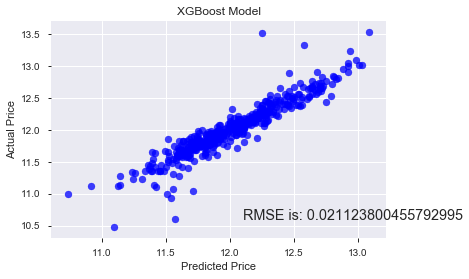

In [672]:
% matplotlib inline
actual_values = y_test
plt.scatter(y_pred_testf2, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('XGBoost Model')
overlay = 'RMSE is: {}'.format(
                    
                    mean_squared_error(y_test, y_pred_testf2))
plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
plt.show()

__XGBoost RMSE = 0.0211__

## MODEL 2: RidgeRegressor

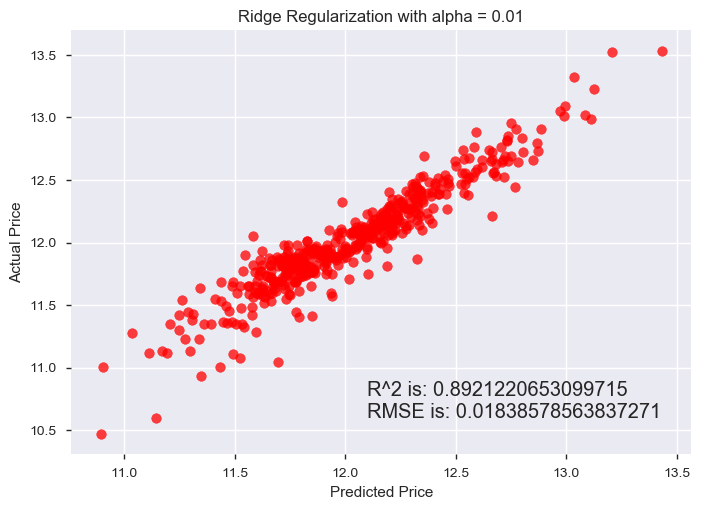

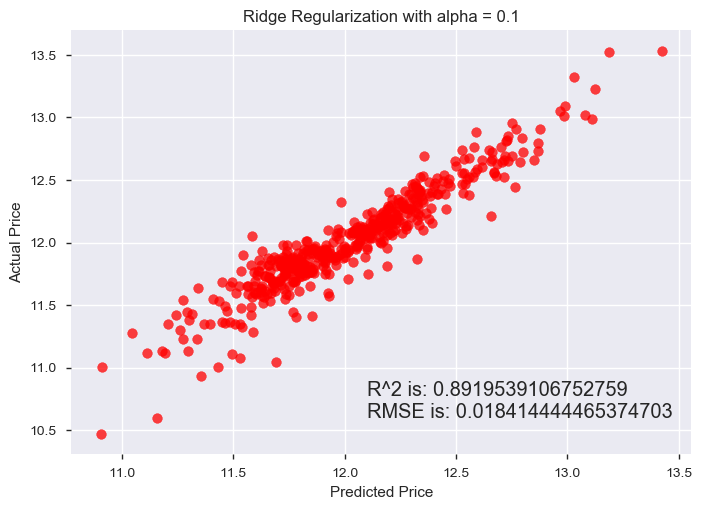

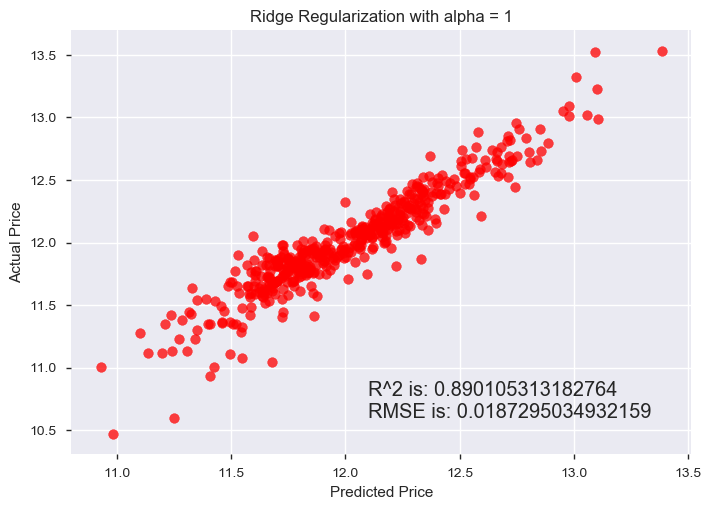

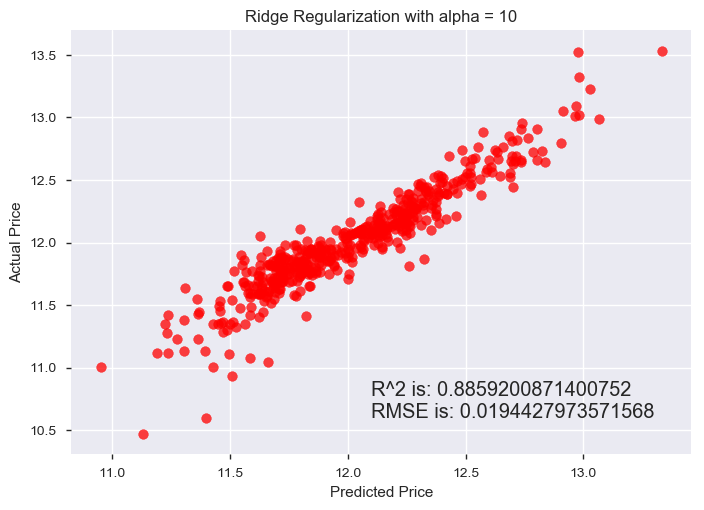

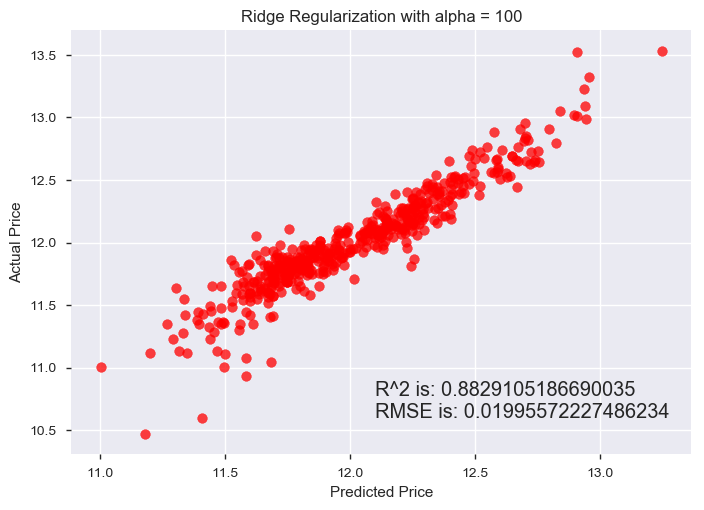

In [274]:
from sklearn import linear_model
for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_tr, y_train)
    preds_ridge = ridge_model.predict(X_te)
    actual_values = y_test
    plt.scatter(preds_ridge, actual_values, alpha=.75, color='r')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_te, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

__RMSE is: 0.018__

## MODEL 3: Linear Regression

In [270]:
from sklearn import linear_model
from sklearn import ensemble
lr = linear_model.LinearRegression()
model = lr.fit(X_tr, y_train)


In [271]:
print ("R^2 is: \n", model.score(X_te, y_test))
predictions = model.predict(X_te)

R^2 is: 
 0.8989768666813921


In [272]:

from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.017217512358292855


Text(0.5,1,'LinearRegression Model')

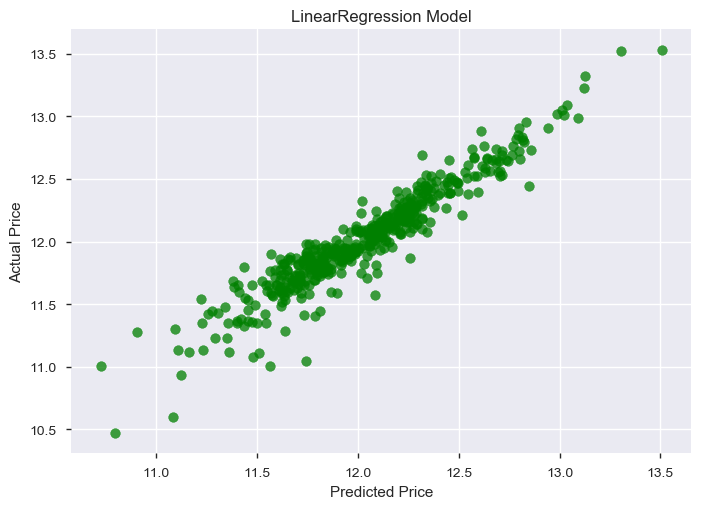

In [273]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='g') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('LinearRegression Model')

__RMSE is: 0.017__

# Building Deep Learning Models

In [301]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.callbacks import ModelCheckpoint

In [302]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

## Lets combine them

In [303]:
data = pd.concat([train, test],axis=0, sort='False', ignore_index = True)

## Use only one 'Id' Column

In [304]:
data = data[data.columns.difference(['Id'])]

## Collect id for future use while making csv

In [305]:
ids = test["Id"]

## Handling NaN or Null Values

In [306]:
data = data.fillna(0)

## Encoding the Categorical Data

In [307]:
#Encoding categorical data
data = pd.get_dummies(data)

In [308]:
data.shape

(2919, 312)

In [309]:
data.head(5)

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
0       856       854          0             3       706.0         0.0   
1      1262         0          0             3       978.0         0.0   
2       920       866          0             3       486.0         0.0   
3       961       756          0             3       216.0         0.0   
4      1145      1053          0             4       655.0         0.0   

   BsmtFullBath  BsmtHalfBath  BsmtUnfSF  EnclosedPorch        ...         \
0           1.0           0.0      150.0              0        ...          
1           0.0           1.0      284.0              0        ...          
2           1.0           0.0      434.0              0        ...          
3           1.0           0.0      540.0            272        ...          
4           1.0           0.0      490.0              0        ...          

   SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0               0             0             0            1   
1               0               0             0             0            1   
2               0               0             0             0            1   
3               0               0             0             0            1   
4               0               0             0             0            1   

   Street_Grvl  Street_Pave  Utilities_0  Utilities_AllPub  Utilities_NoSeWa  
0            0            1            0                 1                 0  
1            0            1            0                 1                 0  
2            0            1            0                 1                 0  
3            0            1            0                 1                 0  
4            0            1            0                 1                 0  

[5 rows x 312 columns]

## Test Train Split

In [310]:
train = data.iloc[:1460,:] #Upto 1460 rows from first
test = data.iloc[1460:,:] # From 1461th row to last
X_train = train[train.columns.difference(['SalePrice'])].values
y_train = train[['SalePrice']].values
X_test = test[test.columns.difference(['SalePrice'])].values

## After vectorising now its time to Scale it

In [311]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler, PowerTransformer
pt_X = PowerTransformer(method='yeo-johnson', standardize=False)
sc_y = StandardScaler()
sc_X = StandardScaler()
y_train = sc_y.fit_transform(y_train)
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [312]:
y_train.shape

(1460, 1)

In [313]:
flat_y = y_train.flatten()
flat_y.shape

(1460,)

In [314]:
from sklearn.model_selection import KFold, cross_val_score
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

In [317]:
import lightgbm as lgb
# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, flat_y)
# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=250)
# predict
lgbm_prediction_tr = gbm.predict(X_train, num_iteration=gbm.best_iteration)
lgbm_prediction_te = gbm.predict(X_test, num_iteration=gbm.best_iteration)


Starting training...


In [318]:
train["lgb"] = lgbm_prediction_tr
test["lgb"] = lgbm_prediction_te

In [328]:
train.head(2)

1stFlrSF  2ndFlrSF  3SsnPorch  Alley_0  Alley_Grvl  Alley_Pave  \
0       856       854          0        1           0           0   
1      1262         0          0        1           0           0   

   BedroomAbvGr  BldgType_1Fam  BldgType_2fmCon  BldgType_Duplex    ...     \
0             3              1                0                0    ...      
1             3              1                0                0    ...      

   TotRmsAbvGrd  TotalBsmtSF  Utilities_0  Utilities_AllPub  Utilities_NoSeWa  \
0             8        856.0            0                 1                 0   
1             6       1262.0            0                 1                 0   

   WoodDeckSF  YearBuilt  YearRemodAdd  YrSold       lgb  
0           0       2003          2003    2008  0.306243  
1         298       1976          1976    2007 -0.028191  

[2 rows x 313 columns]

In [331]:
y_pred = sc_y.inverse_transform(lgbm_prediction_te)

In [332]:
y_pred

array([129022.27866396, 159240.35397222, 180618.04090122, ...,
       149972.09431614, 115913.17690197, 227277.3794836 ])

In [322]:
data = pd.concat([train, test],axis=0, sort='False', ignore_index = True)
data = data[data.columns.difference(['Id'])]
train = data.iloc[:1460,:]
test = data.iloc[1460:,:]
X_train = train[train.columns.difference(['SalePrice'])].values
y_train = train[['SalePrice']].values
X_test = test[test.columns.difference(['SalePrice'])].values
pt_X = PowerTransformer(method='yeo-johnson', standardize=False)
sc_y = StandardScaler()
sc_X = StandardScaler()
y_train = sc_y.fit_transform(y_train)
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## MODEL 1 : (ANN with 2 hidden layers, Activation='tanh', no Dropouts, no BatchNormalisation)

In [325]:
#Inıtialising the ANN
model = Sequential()
#Adding the input layer and first hidden layer
model.add(Dense(units =480, kernel_initializer='random_uniform', activation= 'tanh', 
                input_dim=X_train.shape[1]))
#Add the second hidden layer
model.add(Dense(units =480, kernel_initializer='random_uniform', activation= 'tanh'))
#Add the second hidden layer

model.add(Dense(units =10, kernel_initializer='random_uniform', activation= 'relu'))
#The output layer
model.add(Dense(units =1, kernel_initializer='random_uniform', activation= 'elu'))


In [326]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 480)               150240    
_________________________________________________________________
dense_9 (Dense)              (None, 480)               230880    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                4810      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 385,941
Trainable params: 385,941
Non-trainable params: 0
_________________________________________________________________
None


In [327]:

#Compiling the ANN
opt = keras.optimizers.Adam(lr=0.0015, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=opt, loss='mean_squared_logarithmic_error', metrics=['mse'])
#Fitting the ANN to the training set
model_filepath = 'min_vl_model.h5'
checkpoint = ModelCheckpoint(model_filepath, monitor = 'val_loss', verbose=1, save_best_only = True, mode='min' )
model.fit(X_train,y_train, validation_split=0.07, batch_size=32, nb_epoch=3000, callbacks=[checkpoint])
model.load_weights(model_filepath)

Train on 1357 samples, validate on 103 samples
Epoch 1/3000
1357/1357 [==============================] - 1s 1ms/step - loss: 0.0716 - mean_squared_error: 0.6378 - val_loss: 0.0262 - val_mean_squared_error: 0.4018

Epoch 00001: val_loss improved from inf to 0.02616, saving model to min_vl_model.h5
Epoch 2/3000
1357/1357 [==============================] - 0s 344us/step - loss: 0.0256 - mean_squared_error: 0.3380 - val_loss: 0.0262 - val_mean_squared_error: 0.2291

Epoch 00002: val_loss improved from 0.02616 to 0.02615, saving model to min_vl_model.h5
Epoch 3/3000
1357/1357 [==============================] - 0s 348us/step - loss: 0.0199 - mean_squared_error: 0.2537 - val_loss: 0.0247 - val_mean_squared_error: 0.2159

Epoch 00003: val_loss improved from 0.02615 to 0.02474, saving model to min_vl_model.h5
Epoch 4/3000
1357/1357 [==============================] - 0s 306us/step - loss: 0.0146 - mean_squared_error: 0.2052 - val_loss: 0.0243 - val_mean_squared_error: 0.2328

Epoch 00004: val_lo


Epoch 00035: val_loss did not improve from 0.01553
Epoch 36/3000
1357/1357 [==============================] - 0s 298us/step - loss: 0.0020 - mean_squared_error: 0.0986 - val_loss: 0.0455 - val_mean_squared_error: 0.3480

Epoch 00036: val_loss did not improve from 0.01553
Epoch 37/3000
1357/1357 [==============================] - 1s 421us/step - loss: 0.0019 - mean_squared_error: 0.0978 - val_loss: 0.0458 - val_mean_squared_error: 0.3508

Epoch 00037: val_loss did not improve from 0.01553
Epoch 38/3000
1357/1357 [==============================] - 0s 290us/step - loss: 0.0019 - mean_squared_error: 0.0984 - val_loss: 0.0470 - val_mean_squared_error: 0.3624

Epoch 00038: val_loss did not improve from 0.01553
Epoch 39/3000
1357/1357 [==============================] - 0s 297us/step - loss: 0.0019 - mean_squared_error: 0.0971 - val_loss: 0.0478 - val_mean_squared_error: 0.3739

Epoch 00039: val_loss did not improve from 0.01553
Epoch 40/3000
1357/1357 [==============================] - 1s 40

1357/1357 [==============================] - 1s 415us/step - loss: 0.0015 - mean_squared_error: 0.1165 - val_loss: 0.0469 - val_mean_squared_error: 0.3432

Epoch 00073: val_loss did not improve from 0.01553
Epoch 74/3000
1357/1357 [==============================] - 1s 398us/step - loss: 0.0015 - mean_squared_error: 0.1164 - val_loss: 0.0476 - val_mean_squared_error: 0.3541

Epoch 00074: val_loss did not improve from 0.01553
Epoch 75/3000
1357/1357 [==============================] - 0s 349us/step - loss: 0.0015 - mean_squared_error: 0.1164 - val_loss: 0.0456 - val_mean_squared_error: 0.3437

Epoch 00075: val_loss did not improve from 0.01553
Epoch 76/3000
1357/1357 [==============================] - 0s 345us/step - loss: 0.0015 - mean_squared_error: 0.1163 - val_loss: 0.0473 - val_mean_squared_error: 0.3517

Epoch 00076: val_loss did not improve from 0.01553
Epoch 77/3000
1357/1357 [==============================] - 1s 377us/step - loss: 0.0015 - mean_squared_error: 0.1163 - val_loss: 0


Epoch 00146: val_loss did not improve from 0.01538
Epoch 147/3000
1357/1357 [==============================] - 0s 314us/step - loss: 0.0010 - mean_squared_error: 0.1190 - val_loss: 0.0156 - val_mean_squared_error: 0.2076

Epoch 00147: val_loss did not improve from 0.01538
Epoch 148/3000
1357/1357 [==============================] - 0s 317us/step - loss: 0.0011 - mean_squared_error: 0.1192 - val_loss: 0.0157 - val_mean_squared_error: 0.2100

Epoch 00148: val_loss did not improve from 0.01538
Epoch 149/3000
1357/1357 [==============================] - 1s 453us/step - loss: 0.0011 - mean_squared_error: 0.1194 - val_loss: 0.0158 - val_mean_squared_error: 0.2118

Epoch 00149: val_loss did not improve from 0.01538
Epoch 150/3000
1357/1357 [==============================] - 0s 329us/step - loss: 0.0012 - mean_squared_error: 0.1201 - val_loss: 0.0161 - val_mean_squared_error: 0.2101

Epoch 00150: val_loss did not improve from 0.01538
Epoch 151/3000
1357/1357 [==============================] - 


Epoch 00219: val_loss did not improve from 0.01525
Epoch 220/3000
1357/1357 [==============================] - 0s 316us/step - loss: 9.9001e-04 - mean_squared_error: 0.1233 - val_loss: 0.0435 - val_mean_squared_error: 0.3600

Epoch 00220: val_loss did not improve from 0.01525
Epoch 221/3000
1357/1357 [==============================] - 1s 416us/step - loss: 9.8996e-04 - mean_squared_error: 0.1233 - val_loss: 0.0434 - val_mean_squared_error: 0.3591

Epoch 00221: val_loss did not improve from 0.01525
Epoch 222/3000
1357/1357 [==============================] - 0s 319us/step - loss: 9.8991e-04 - mean_squared_error: 0.1233 - val_loss: 0.0432 - val_mean_squared_error: 0.3586

Epoch 00222: val_loss did not improve from 0.01525
Epoch 223/3000
1357/1357 [==============================] - 0s 304us/step - loss: 9.8982e-04 - mean_squared_error: 0.1233 - val_loss: 0.0433 - val_mean_squared_error: 0.3585

Epoch 00223: val_loss did not improve from 0.01525
Epoch 224/3000
1357/1357 [==================

1357/1357 [==============================] - 0s 294us/step - loss: 0.0010 - mean_squared_error: 0.1223 - val_loss: 0.0467 - val_mean_squared_error: 0.4369

Epoch 00293: val_loss did not improve from 0.01525
Epoch 294/3000
1357/1357 [==============================] - 1s 370us/step - loss: 0.0010 - mean_squared_error: 0.1225 - val_loss: 0.0466 - val_mean_squared_error: 0.4377

Epoch 00294: val_loss did not improve from 0.01525
Epoch 295/3000
1357/1357 [==============================] - 0s 337us/step - loss: 0.0010 - mean_squared_error: 0.1224 - val_loss: 0.0459 - val_mean_squared_error: 0.4282

Epoch 00295: val_loss did not improve from 0.01525
Epoch 296/3000
1357/1357 [==============================] - 0s 339us/step - loss: 0.0010 - mean_squared_error: 0.1223 - val_loss: 0.0458 - val_mean_squared_error: 0.4245

Epoch 00296: val_loss did not improve from 0.01525
Epoch 297/3000
1357/1357 [==============================] - 1s 508us/step - loss: 0.0010 - mean_squared_error: 0.1224 - val_los

1357/1357 [==============================] - 1s 383us/step - loss: 0.0010 - mean_squared_error: 0.1245 - val_loss: 0.0178 - val_mean_squared_error: 0.2255

Epoch 00330: val_loss did not improve from 0.01525
Epoch 331/3000
1357/1357 [==============================] - 1s 372us/step - loss: 0.0010 - mean_squared_error: 0.1244 - val_loss: 0.0177 - val_mean_squared_error: 0.2252

Epoch 00331: val_loss did not improve from 0.01525
Epoch 332/3000
1357/1357 [==============================] - 0s 325us/step - loss: 0.0010 - mean_squared_error: 0.1244 - val_loss: 0.0177 - val_mean_squared_error: 0.2253

Epoch 00332: val_loss did not improve from 0.01525
Epoch 333/3000
1357/1357 [==============================] - 0s 366us/step - loss: 0.0010 - mean_squared_error: 0.1244 - val_loss: 0.0177 - val_mean_squared_error: 0.2252

Epoch 00333: val_loss did not improve from 0.01525
Epoch 334/3000
1357/1357 [==============================] - 1s 403us/step - loss: 0.0010 - mean_squared_error: 0.1244 - val_los

1357/1357 [==============================] - 0s 325us/step - loss: 0.0011 - mean_squared_error: 0.1244 - val_loss: 0.0177 - val_mean_squared_error: 0.2254

Epoch 00367: val_loss did not improve from 0.01525
Epoch 368/3000
1357/1357 [==============================] - 1s 443us/step - loss: 0.0011 - mean_squared_error: 0.1244 - val_loss: 0.0176 - val_mean_squared_error: 0.2250

Epoch 00368: val_loss did not improve from 0.01525
Epoch 369/3000
1357/1357 [==============================] - 0s 308us/step - loss: 0.0011 - mean_squared_error: 0.1245 - val_loss: 0.0176 - val_mean_squared_error: 0.2252

Epoch 00369: val_loss did not improve from 0.01525
Epoch 370/3000
1357/1357 [==============================] - 0s 317us/step - loss: 0.0011 - mean_squared_error: 0.1245 - val_loss: 0.0175 - val_mean_squared_error: 0.2252

Epoch 00370: val_loss did not improve from 0.01525
Epoch 371/3000
1357/1357 [==============================] - 1s 389us/step - loss: 0.0011 - mean_squared_error: 0.1245 - val_los


Epoch 00403: val_loss did not improve from 0.01525
Epoch 404/3000
1357/1357 [==============================] - 1s 389us/step - loss: 0.0010 - mean_squared_error: 0.1255 - val_loss: 0.0175 - val_mean_squared_error: 0.2292

Epoch 00404: val_loss did not improve from 0.01525
Epoch 405/3000
1357/1357 [==============================] - 1s 511us/step - loss: 0.0010 - mean_squared_error: 0.1255 - val_loss: 0.0175 - val_mean_squared_error: 0.2289

Epoch 00405: val_loss did not improve from 0.01525
Epoch 406/3000
1357/1357 [==============================] - 1s 383us/step - loss: 0.0010 - mean_squared_error: 0.1255 - val_loss: 0.0175 - val_mean_squared_error: 0.2293

Epoch 00406: val_loss did not improve from 0.01525
Epoch 407/3000
1357/1357 [==============================] - 0s 323us/step - loss: 0.0010 - mean_squared_error: 0.1255 - val_loss: 0.0175 - val_mean_squared_error: 0.2291

Epoch 00407: val_loss did not improve from 0.01525
Epoch 408/3000
1357/1357 [==============================] - 


Epoch 00440: val_loss did not improve from 0.01525
Epoch 441/3000
1357/1357 [==============================] - 1s 383us/step - loss: 0.0010 - mean_squared_error: 0.1273 - val_loss: 0.0178 - val_mean_squared_error: 0.2295

Epoch 00441: val_loss did not improve from 0.01525
Epoch 442/3000
1357/1357 [==============================] - 0s 366us/step - loss: 0.0010 - mean_squared_error: 0.1272 - val_loss: 0.0178 - val_mean_squared_error: 0.2295

Epoch 00442: val_loss did not improve from 0.01525
Epoch 443/3000
1357/1357 [==============================] - 1s 476us/step - loss: 0.0010 - mean_squared_error: 0.1271 - val_loss: 0.0178 - val_mean_squared_error: 0.2294

Epoch 00443: val_loss did not improve from 0.01525
Epoch 444/3000
1357/1357 [==============================] - 1s 465us/step - loss: 0.0010 - mean_squared_error: 0.1271 - val_loss: 0.0179 - val_mean_squared_error: 0.2304

Epoch 00444: val_loss did not improve from 0.01525
Epoch 445/3000
1357/1357 [==============================] - 

1357/1357 [==============================] - 1s 434us/step - loss: 0.0010 - mean_squared_error: 0.1294 - val_loss: 0.0191 - val_mean_squared_error: 0.2343

Epoch 00514: val_loss did not improve from 0.01525
Epoch 515/3000
1357/1357 [==============================] - 0s 324us/step - loss: 0.0010 - mean_squared_error: 0.1292 - val_loss: 0.0193 - val_mean_squared_error: 0.2355

Epoch 00515: val_loss did not improve from 0.01525
Epoch 516/3000
1357/1357 [==============================] - 0s 347us/step - loss: 0.0010 - mean_squared_error: 0.1295 - val_loss: 0.0192 - val_mean_squared_error: 0.2350

Epoch 00516: val_loss did not improve from 0.01525
Epoch 517/3000
1357/1357 [==============================] - 1s 423us/step - loss: 0.0010 - mean_squared_error: 0.1293 - val_loss: 0.0191 - val_mean_squared_error: 0.2350

Epoch 00517: val_loss did not improve from 0.01525
Epoch 518/3000
1357/1357 [==============================] - 0s 365us/step - loss: 9.9932e-04 - mean_squared_error: 0.1293 - val


Epoch 00550: val_loss did not improve from 0.01525
Epoch 551/3000
1357/1357 [==============================] - 0s 365us/step - loss: 9.8019e-04 - mean_squared_error: 0.1198 - val_loss: 0.0174 - val_mean_squared_error: 0.2194

Epoch 00551: val_loss did not improve from 0.01525
Epoch 552/3000
1357/1357 [==============================] - 0s 361us/step - loss: 8.6711e-04 - mean_squared_error: 0.1195 - val_loss: 0.0176 - val_mean_squared_error: 0.2199

Epoch 00552: val_loss did not improve from 0.01525
Epoch 553/3000
1357/1357 [==============================] - 1s 532us/step - loss: 8.1919e-04 - mean_squared_error: 0.1195 - val_loss: 0.0174 - val_mean_squared_error: 0.2187

Epoch 00553: val_loss did not improve from 0.01525
Epoch 554/3000
1357/1357 [==============================] - 1s 392us/step - loss: 7.9094e-04 - mean_squared_error: 0.1192 - val_loss: 0.0173 - val_mean_squared_error: 0.2181

Epoch 00554: val_loss did not improve from 0.01525
Epoch 555/3000
1357/1357 [==================

1357/1357 [==============================] - 0s 311us/step - loss: 7.4889e-04 - mean_squared_error: 0.1187 - val_loss: 0.0173 - val_mean_squared_error: 0.2177

Epoch 00587: val_loss did not improve from 0.01525
Epoch 588/3000
1357/1357 [==============================] - 1s 693us/step - loss: 7.4927e-04 - mean_squared_error: 0.1188 - val_loss: 0.0173 - val_mean_squared_error: 0.2182

Epoch 00588: val_loss did not improve from 0.01525
Epoch 589/3000
1357/1357 [==============================] - 1s 549us/step - loss: 7.4878e-04 - mean_squared_error: 0.1188 - val_loss: 0.0174 - val_mean_squared_error: 0.2182

Epoch 00589: val_loss did not improve from 0.01525
Epoch 590/3000
1357/1357 [==============================] - 1s 553us/step - loss: 7.4802e-04 - mean_squared_error: 0.1188 - val_loss: 0.0174 - val_mean_squared_error: 0.2181

Epoch 00590: val_loss did not improve from 0.01525
Epoch 591/3000
1357/1357 [==============================] - 1s 383us/step - loss: 7.4647e-04 - mean_squared_err

1357/1357 [==============================] - 1s 570us/step - loss: 7.4612e-04 - mean_squared_error: 0.1225 - val_loss: 0.0175 - val_mean_squared_error: 0.2263

Epoch 00659: val_loss did not improve from 0.01525
Epoch 660/3000
1357/1357 [==============================] - 0s 310us/step - loss: 7.4532e-04 - mean_squared_error: 0.1225 - val_loss: 0.0176 - val_mean_squared_error: 0.2269

Epoch 00660: val_loss did not improve from 0.01525
Epoch 661/3000
1357/1357 [==============================] - 0s 318us/step - loss: 7.4583e-04 - mean_squared_error: 0.1225 - val_loss: 0.0174 - val_mean_squared_error: 0.2261

Epoch 00661: val_loss did not improve from 0.01525
Epoch 662/3000
1357/1357 [==============================] - 1s 467us/step - loss: 7.4587e-04 - mean_squared_error: 0.1225 - val_loss: 0.0174 - val_mean_squared_error: 0.2260

Epoch 00662: val_loss did not improve from 0.01525
Epoch 663/3000
1357/1357 [==============================] - 1s 378us/step - loss: 7.4588e-04 - mean_squared_err

1357/1357 [==============================] - 0s 360us/step - loss: 7.4774e-04 - mean_squared_error: 0.1243 - val_loss: 0.0171 - val_mean_squared_error: 0.2202

Epoch 00731: val_loss did not improve from 0.01525
Epoch 732/3000
1357/1357 [==============================] - 1s 387us/step - loss: 7.4813e-04 - mean_squared_error: 0.1243 - val_loss: 0.0171 - val_mean_squared_error: 0.2200

Epoch 00732: val_loss did not improve from 0.01525
Epoch 733/3000
1357/1357 [==============================] - 0s 299us/step - loss: 7.4881e-04 - mean_squared_error: 0.1243 - val_loss: 0.0173 - val_mean_squared_error: 0.2212

Epoch 00733: val_loss did not improve from 0.01525
Epoch 734/3000
1357/1357 [==============================] - 0s 344us/step - loss: 7.5599e-04 - mean_squared_error: 0.1243 - val_loss: 0.0172 - val_mean_squared_error: 0.2216

Epoch 00734: val_loss did not improve from 0.01525
Epoch 735/3000
1357/1357 [==============================] - 1s 378us/step - loss: 7.4996e-04 - mean_squared_err

1357/1357 [==============================] - 1s 380us/step - loss: 7.4850e-04 - mean_squared_error: 0.1150 - val_loss: 0.0184 - val_mean_squared_error: 0.2277

Epoch 00803: val_loss did not improve from 0.01525
Epoch 804/3000
1357/1357 [==============================] - 0s 340us/step - loss: 7.4866e-04 - mean_squared_error: 0.1149 - val_loss: 0.0184 - val_mean_squared_error: 0.2276

Epoch 00804: val_loss did not improve from 0.01525
Epoch 805/3000
1357/1357 [==============================] - 0s 313us/step - loss: 7.4805e-04 - mean_squared_error: 0.1150 - val_loss: 0.0183 - val_mean_squared_error: 0.2271

Epoch 00805: val_loss did not improve from 0.01525
Epoch 806/3000
1357/1357 [==============================] - 1s 399us/step - loss: 7.4821e-04 - mean_squared_error: 0.1149 - val_loss: 0.0184 - val_mean_squared_error: 0.2273

Epoch 00806: val_loss did not improve from 0.01525
Epoch 807/3000
1357/1357 [==============================] - 0s 334us/step - loss: 7.4863e-04 - mean_squared_err

1357/1357 [==============================] - 1s 435us/step - loss: 7.3785e-04 - mean_squared_error: 0.1076 - val_loss: 0.0176 - val_mean_squared_error: 0.2374

Epoch 00875: val_loss did not improve from 0.01525
Epoch 876/3000
1357/1357 [==============================] - ETA: 0s - loss: 8.2319e-04 - mean_squared_error: 0.11 - 1s 454us/step - loss: 7.3797e-04 - mean_squared_error: 0.1076 - val_loss: 0.0176 - val_mean_squared_error: 0.2377

Epoch 00876: val_loss did not improve from 0.01525
Epoch 877/3000
1357/1357 [==============================] - 0s 320us/step - loss: 7.3813e-04 - mean_squared_error: 0.1076 - val_loss: 0.0175 - val_mean_squared_error: 0.2377

Epoch 00877: val_loss did not improve from 0.01525
Epoch 878/3000
1357/1357 [==============================] - 0s 344us/step - loss: 7.3950e-04 - mean_squared_error: 0.1076 - val_loss: 0.0176 - val_mean_squared_error: 0.2378

Epoch 00878: val_loss did not improve from 0.01525
Epoch 879/3000
1357/1357 [=============================

1357/1357 [==============================] - 0s 331us/step - loss: 7.3708e-04 - mean_squared_error: 0.1076 - val_loss: 0.0169 - val_mean_squared_error: 0.2358

Epoch 00947: val_loss did not improve from 0.01525
Epoch 948/3000
1357/1357 [==============================] - 0s 299us/step - loss: 7.3704e-04 - mean_squared_error: 0.1076 - val_loss: 0.0169 - val_mean_squared_error: 0.2358

Epoch 00948: val_loss did not improve from 0.01525
Epoch 949/3000
1357/1357 [==============================] - 0s 333us/step - loss: 7.3727e-04 - mean_squared_error: 0.1076 - val_loss: 0.0169 - val_mean_squared_error: 0.2356

Epoch 00949: val_loss did not improve from 0.01525
Epoch 950/3000
1357/1357 [==============================] - 0s 366us/step - loss: 7.3727e-04 - mean_squared_error: 0.1076 - val_loss: 0.0169 - val_mean_squared_error: 0.2359

Epoch 00950: val_loss did not improve from 0.01525
Epoch 951/3000
1357/1357 [==============================] - 0s 292us/step - loss: 7.3793e-04 - mean_squared_err

1357/1357 [==============================] - 0s 341us/step - loss: 7.4303e-04 - mean_squared_error: 0.1076 - val_loss: 0.0175 - val_mean_squared_error: 0.2235

Epoch 01019: val_loss did not improve from 0.01525
Epoch 1020/3000
1357/1357 [==============================] - 1s 386us/step - loss: 7.4120e-04 - mean_squared_error: 0.1076 - val_loss: 0.0175 - val_mean_squared_error: 0.2239

Epoch 01020: val_loss did not improve from 0.01525
Epoch 1021/3000
1357/1357 [==============================] - 0s 320us/step - loss: 7.4074e-04 - mean_squared_error: 0.1076 - val_loss: 0.0175 - val_mean_squared_error: 0.2237

Epoch 01021: val_loss did not improve from 0.01525
Epoch 1022/3000
1357/1357 [==============================] - 0s 305us/step - loss: 7.4081e-04 - mean_squared_error: 0.1076 - val_loss: 0.0176 - val_mean_squared_error: 0.2241

Epoch 01022: val_loss did not improve from 0.01525
Epoch 1023/3000
1357/1357 [==============================] - 0s 349us/step - loss: 7.4193e-04 - mean_squared

1357/1357 [==============================] - 0s 302us/step - loss: 7.4038e-04 - mean_squared_error: 0.1135 - val_loss: 0.0181 - val_mean_squared_error: 0.2240

Epoch 01091: val_loss did not improve from 0.01525
Epoch 1092/3000
1357/1357 [==============================] - 1s 433us/step - loss: 7.4097e-04 - mean_squared_error: 0.1135 - val_loss: 0.0180 - val_mean_squared_error: 0.2235

Epoch 01092: val_loss did not improve from 0.01525
Epoch 1093/3000
1357/1357 [==============================] - 0s 304us/step - loss: 7.4072e-04 - mean_squared_error: 0.1134 - val_loss: 0.0180 - val_mean_squared_error: 0.2238

Epoch 01093: val_loss did not improve from 0.01525
Epoch 1094/3000
1357/1357 [==============================] - 0s 307us/step - loss: 7.3974e-04 - mean_squared_error: 0.1134 - val_loss: 0.0179 - val_mean_squared_error: 0.2230

Epoch 01094: val_loss did not improve from 0.01525
Epoch 1095/3000
1357/1357 [==============================] - 1s 418us/step - loss: 7.4061e-04 - mean_squared

1357/1357 [==============================] - 0s 336us/step - loss: 7.3865e-04 - mean_squared_error: 0.1134 - val_loss: 0.0179 - val_mean_squared_error: 0.2227

Epoch 01127: val_loss did not improve from 0.01525
Epoch 1128/3000
1357/1357 [==============================] - 1s 430us/step - loss: 7.3932e-04 - mean_squared_error: 0.1134 - val_loss: 0.0180 - val_mean_squared_error: 0.2230

Epoch 01128: val_loss did not improve from 0.01525
Epoch 1129/3000
1357/1357 [==============================] - 0s 338us/step - loss: 7.4022e-04 - mean_squared_error: 0.1134 - val_loss: 0.0179 - val_mean_squared_error: 0.2226

Epoch 01129: val_loss did not improve from 0.01525
Epoch 1130/3000
1357/1357 [==============================] - 0s 365us/step - loss: 7.4086e-04 - mean_squared_error: 0.1134 - val_loss: 0.0180 - val_mean_squared_error: 0.2234

Epoch 01130: val_loss did not improve from 0.01525
Epoch 1131/3000
1357/1357 [==============================] - 1s 528us/step - loss: 7.4102e-04 - mean_squared

1357/1357 [==============================] - 0s 355us/step - loss: 7.4133e-04 - mean_squared_error: 0.1077 - val_loss: 0.0155 - val_mean_squared_error: 0.2101

Epoch 01199: val_loss did not improve from 0.01525
Epoch 1200/3000
1357/1357 [==============================] - 1s 421us/step - loss: 7.4394e-04 - mean_squared_error: 0.1078 - val_loss: 0.0155 - val_mean_squared_error: 0.2098

Epoch 01200: val_loss did not improve from 0.01525
Epoch 1201/3000
1357/1357 [==============================] - 1s 392us/step - loss: 7.4943e-04 - mean_squared_error: 0.1077 - val_loss: 0.0156 - val_mean_squared_error: 0.2100

Epoch 01201: val_loss did not improve from 0.01525
Epoch 1202/3000
1357/1357 [==============================] - 0s 351us/step - loss: 7.4188e-04 - mean_squared_error: 0.1077 - val_loss: 0.0155 - val_mean_squared_error: 0.2095

Epoch 01202: val_loss did not improve from 0.01525
Epoch 1203/3000
1357/1357 [==============================] - 1s 457us/step - loss: 7.4299e-04 - mean_squared


Epoch 01235: val_loss did not improve from 0.01525
Epoch 1236/3000
1357/1357 [==============================] - 1s 470us/step - loss: 0.0072 - mean_squared_error: 0.1943 - val_loss: 0.0164 - val_mean_squared_error: 0.2043

Epoch 01236: val_loss did not improve from 0.01525
Epoch 1237/3000
1357/1357 [==============================] - 0s 333us/step - loss: 0.0072 - mean_squared_error: 0.1944 - val_loss: 0.0164 - val_mean_squared_error: 0.2039

Epoch 01237: val_loss did not improve from 0.01525
Epoch 1238/3000
1357/1357 [==============================] - 0s 303us/step - loss: 0.0072 - mean_squared_error: 0.1943 - val_loss: 0.0164 - val_mean_squared_error: 0.2043

Epoch 01238: val_loss did not improve from 0.01525
Epoch 1239/3000
1357/1357 [==============================] - 1s 408us/step - loss: 0.0072 - mean_squared_error: 0.1943 - val_loss: 0.0165 - val_mean_squared_error: 0.2046

Epoch 01239: val_loss did not improve from 0.01525
Epoch 1240/3000
1357/1357 [=============================

1357/1357 [==============================] - 0s 342us/step - loss: 7.5538e-04 - mean_squared_error: 0.1148 - val_loss: 0.0166 - val_mean_squared_error: 0.1954

Epoch 01308: val_loss did not improve from 0.01525
Epoch 1309/3000
1357/1357 [==============================] - 1s 371us/step - loss: 7.5092e-04 - mean_squared_error: 0.1148 - val_loss: 0.0166 - val_mean_squared_error: 0.1936

Epoch 01309: val_loss did not improve from 0.01525
Epoch 1310/3000
1357/1357 [==============================] - 1s 469us/step - loss: 7.5265e-04 - mean_squared_error: 0.1149 - val_loss: 0.0165 - val_mean_squared_error: 0.1926

Epoch 01310: val_loss did not improve from 0.01525
Epoch 1311/3000
1357/1357 [==============================] - 1s 431us/step - loss: 7.4870e-04 - mean_squared_error: 0.1148 - val_loss: 0.0165 - val_mean_squared_error: 0.1940

Epoch 01311: val_loss did not improve from 0.01525
Epoch 1312/3000
1357/1357 [==============================] - 1s 421us/step - loss: 7.4643e-04 - mean_squared

1357/1357 [==============================] - 1s 387us/step - loss: 8.4604e-04 - mean_squared_error: 0.1178 - val_loss: 0.0174 - val_mean_squared_error: 0.1860

Epoch 01380: val_loss did not improve from 0.01353
Epoch 1381/3000
1357/1357 [==============================] - 0s 297us/step - loss: 8.2728e-04 - mean_squared_error: 0.1180 - val_loss: 0.0174 - val_mean_squared_error: 0.1855

Epoch 01381: val_loss did not improve from 0.01353
Epoch 1382/3000
1357/1357 [==============================] - 1s 385us/step - loss: 8.0123e-04 - mean_squared_error: 0.1179 - val_loss: 0.0164 - val_mean_squared_error: 0.1815

Epoch 01382: val_loss did not improve from 0.01353
Epoch 1383/3000
1357/1357 [==============================] - 1s 422us/step - loss: 7.8398e-04 - mean_squared_error: 0.1179 - val_loss: 0.0145 - val_mean_squared_error: 0.1788

Epoch 01383: val_loss did not improve from 0.01353
Epoch 1384/3000
1357/1357 [==============================] - 0s 318us/step - loss: 7.8039e-04 - mean_squared


Epoch 01415: val_loss did not improve from 0.01353
Epoch 1416/3000
1357/1357 [==============================] - 1s 383us/step - loss: 7.5127e-04 - mean_squared_error: 0.1162 - val_loss: 0.0179 - val_mean_squared_error: 0.2020

Epoch 01416: val_loss did not improve from 0.01353
Epoch 1417/3000
1357/1357 [==============================] - 1s 442us/step - loss: 7.4561e-04 - mean_squared_error: 0.1162 - val_loss: 0.0180 - val_mean_squared_error: 0.2030

Epoch 01417: val_loss did not improve from 0.01353
Epoch 1418/3000
1357/1357 [==============================] - 1s 438us/step - loss: 7.4657e-04 - mean_squared_error: 0.1162 - val_loss: 0.0180 - val_mean_squared_error: 0.2016

Epoch 01418: val_loss did not improve from 0.01353
Epoch 1419/3000
1357/1357 [==============================] - 1s 421us/step - loss: 7.4962e-04 - mean_squared_error: 0.1163 - val_loss: 0.0181 - val_mean_squared_error: 0.2025

Epoch 01419: val_loss did not improve from 0.01353
Epoch 1420/3000
1357/1357 [=============


Epoch 01451: val_loss did not improve from 0.01353
Epoch 1452/3000
1357/1357 [==============================] - 0s 367us/step - loss: 8.6578e-04 - mean_squared_error: 0.1231 - val_loss: 0.0193 - val_mean_squared_error: 0.2371

Epoch 01452: val_loss did not improve from 0.01353
Epoch 1453/3000
1357/1357 [==============================] - 0s 354us/step - loss: 8.3471e-04 - mean_squared_error: 0.1228 - val_loss: 0.0188 - val_mean_squared_error: 0.2320

Epoch 01453: val_loss did not improve from 0.01353
Epoch 1454/3000
1357/1357 [==============================] - 1s 437us/step - loss: 8.0118e-04 - mean_squared_error: 0.1224 - val_loss: 0.0191 - val_mean_squared_error: 0.2352

Epoch 01454: val_loss did not improve from 0.01353
Epoch 1455/3000
1357/1357 [==============================] - 0s 327us/step - loss: 7.9212e-04 - mean_squared_error: 0.1222 - val_loss: 0.0191 - val_mean_squared_error: 0.2364

Epoch 01455: val_loss did not improve from 0.01353
Epoch 1456/3000
1357/1357 [=============

1357/1357 [==============================] - 0s 344us/step - loss: 7.3828e-04 - mean_squared_error: 0.1217 - val_loss: 0.0190 - val_mean_squared_error: 0.2363

Epoch 01488: val_loss did not improve from 0.01353
Epoch 1489/3000
1357/1357 [==============================] - 1s 434us/step - loss: 7.3791e-04 - mean_squared_error: 0.1217 - val_loss: 0.0190 - val_mean_squared_error: 0.2365

Epoch 01489: val_loss did not improve from 0.01353
Epoch 1490/3000
1357/1357 [==============================] - 0s 344us/step - loss: 7.3758e-04 - mean_squared_error: 0.1217 - val_loss: 0.0190 - val_mean_squared_error: 0.2367

Epoch 01490: val_loss did not improve from 0.01353
Epoch 1491/3000
1357/1357 [==============================] - 0s 321us/step - loss: 7.3812e-04 - mean_squared_error: 0.1217 - val_loss: 0.0190 - val_mean_squared_error: 0.2365

Epoch 01491: val_loss did not improve from 0.01353
Epoch 1492/3000
1357/1357 [==============================] - 1s 418us/step - loss: 7.4049e-04 - mean_squared

1357/1357 [==============================] - 0s 347us/step - loss: 7.3483e-04 - mean_squared_error: 0.1227 - val_loss: 0.0183 - val_mean_squared_error: 0.2179

Epoch 01560: val_loss did not improve from 0.01353
Epoch 1561/3000
1357/1357 [==============================] - 1s 406us/step - loss: 7.3624e-04 - mean_squared_error: 0.1228 - val_loss: 0.0185 - val_mean_squared_error: 0.2185

Epoch 01561: val_loss did not improve from 0.01353
Epoch 1562/3000
1357/1357 [==============================] - 0s 343us/step - loss: 7.3685e-04 - mean_squared_error: 0.1227 - val_loss: 0.0186 - val_mean_squared_error: 0.2195

Epoch 01562: val_loss did not improve from 0.01353
Epoch 1563/3000
1357/1357 [==============================] - 0s 327us/step - loss: 7.3733e-04 - mean_squared_error: 0.1227 - val_loss: 0.0186 - val_mean_squared_error: 0.2197

Epoch 01563: val_loss did not improve from 0.01353
Epoch 1564/3000
1357/1357 [==============================] - 1s 391us/step - loss: 7.3767e-04 - mean_squared

1357/1357 [==============================] - 0s 329us/step - loss: 7.3553e-04 - mean_squared_error: 0.1215 - val_loss: 0.0185 - val_mean_squared_error: 0.2267

Epoch 01632: val_loss did not improve from 0.01353
Epoch 1633/3000
1357/1357 [==============================] - 1s 373us/step - loss: 7.3495e-04 - mean_squared_error: 0.1215 - val_loss: 0.0185 - val_mean_squared_error: 0.2259

Epoch 01633: val_loss did not improve from 0.01353
Epoch 1634/3000
1357/1357 [==============================] - 0s 350us/step - loss: 7.3564e-04 - mean_squared_error: 0.1215 - val_loss: 0.0185 - val_mean_squared_error: 0.2266

Epoch 01634: val_loss did not improve from 0.01353
Epoch 1635/3000
1357/1357 [==============================] - 0s 291us/step - loss: 7.3580e-04 - mean_squared_error: 0.1216 - val_loss: 0.0185 - val_mean_squared_error: 0.2261

Epoch 01635: val_loss did not improve from 0.01353
Epoch 1636/3000
1357/1357 [==============================] - 0s 365us/step - loss: 7.3537e-04 - mean_squared

1357/1357 [==============================] - 0s 277us/step - loss: 7.3272e-04 - mean_squared_error: 0.1235 - val_loss: 0.0192 - val_mean_squared_error: 0.2221

Epoch 01704: val_loss did not improve from 0.01353
Epoch 1705/3000
1357/1357 [==============================] - 0s 280us/step - loss: 7.3228e-04 - mean_squared_error: 0.1235 - val_loss: 0.0192 - val_mean_squared_error: 0.2224

Epoch 01705: val_loss did not improve from 0.01353
Epoch 1706/3000
1357/1357 [==============================] - 0s 354us/step - loss: 7.3274e-04 - mean_squared_error: 0.1235 - val_loss: 0.0192 - val_mean_squared_error: 0.2223

Epoch 01706: val_loss did not improve from 0.01353
Epoch 1707/3000
1357/1357 [==============================] - 0s 289us/step - loss: 7.3234e-04 - mean_squared_error: 0.1235 - val_loss: 0.0192 - val_mean_squared_error: 0.2222

Epoch 01707: val_loss did not improve from 0.01353
Epoch 1708/3000
1357/1357 [==============================] - 0s 273us/step - loss: 7.3254e-04 - mean_squared

1357/1357 [==============================] - 0s 323us/step - loss: 7.3394e-04 - mean_squared_error: 0.1199 - val_loss: 0.0201 - val_mean_squared_error: 0.2221

Epoch 01776: val_loss did not improve from 0.01353
Epoch 1777/3000
1357/1357 [==============================] - 0s 349us/step - loss: 7.3467e-04 - mean_squared_error: 0.1200 - val_loss: 0.0200 - val_mean_squared_error: 0.2217

Epoch 01777: val_loss did not improve from 0.01353
Epoch 1778/3000
1357/1357 [==============================] - 0s 297us/step - loss: 7.3423e-04 - mean_squared_error: 0.1200 - val_loss: 0.0200 - val_mean_squared_error: 0.2216

Epoch 01778: val_loss did not improve from 0.01353
Epoch 1779/3000
1357/1357 [==============================] - 0s 301us/step - loss: 7.3378e-04 - mean_squared_error: 0.1200 - val_loss: 0.0201 - val_mean_squared_error: 0.2224

Epoch 01779: val_loss did not improve from 0.01353
Epoch 1780/3000
1357/1357 [==============================] - 1s 378us/step - loss: 7.3538e-04 - mean_squared

1357/1357 [==============================] - 0s 282us/step - loss: 7.4336e-04 - mean_squared_error: 0.1202 - val_loss: 0.0185 - val_mean_squared_error: 0.2185

Epoch 01848: val_loss did not improve from 0.01353
Epoch 1849/3000
1357/1357 [==============================] - 0s 357us/step - loss: 7.4170e-04 - mean_squared_error: 0.1203 - val_loss: 0.0184 - val_mean_squared_error: 0.2205

Epoch 01849: val_loss did not improve from 0.01353
Epoch 1850/3000
1357/1357 [==============================] - 0s 270us/step - loss: 7.3984e-04 - mean_squared_error: 0.1213 - val_loss: 0.0183 - val_mean_squared_error: 0.2210

Epoch 01850: val_loss did not improve from 0.01353
Epoch 1851/3000
1357/1357 [==============================] - 0s 267us/step - loss: 7.3911e-04 - mean_squared_error: 0.1214 - val_loss: 0.0183 - val_mean_squared_error: 0.2209

Epoch 01851: val_loss did not improve from 0.01353
Epoch 1852/3000
1357/1357 [==============================] - 0s 325us/step - loss: 7.3786e-04 - mean_squared

1357/1357 [==============================] - 0s 280us/step - loss: 7.4980e-04 - mean_squared_error: 0.1211 - val_loss: 0.0167 - val_mean_squared_error: 0.2142

Epoch 01920: val_loss did not improve from 0.01353
Epoch 1921/3000
1357/1357 [==============================] - 1s 375us/step - loss: 7.4705e-04 - mean_squared_error: 0.1212 - val_loss: 0.0167 - val_mean_squared_error: 0.2143

Epoch 01921: val_loss did not improve from 0.01353
Epoch 1922/3000
1357/1357 [==============================] - 0s 282us/step - loss: 7.4439e-04 - mean_squared_error: 0.1212 - val_loss: 0.0167 - val_mean_squared_error: 0.2144

Epoch 01922: val_loss did not improve from 0.01353
Epoch 1923/3000
1357/1357 [==============================] - 0s 276us/step - loss: 7.4158e-04 - mean_squared_error: 0.1212 - val_loss: 0.0168 - val_mean_squared_error: 0.2146

Epoch 01923: val_loss did not improve from 0.01353
Epoch 1924/3000
1357/1357 [==============================] - 0s 305us/step - loss: 7.4196e-04 - mean_squared

1357/1357 [==============================] - 0s 286us/step - loss: 7.4945e-04 - mean_squared_error: 0.1219 - val_loss: 0.0184 - val_mean_squared_error: 0.2216

Epoch 01992: val_loss did not improve from 0.01353
Epoch 1993/3000
1357/1357 [==============================] - 0s 362us/step - loss: 7.4715e-04 - mean_squared_error: 0.1221 - val_loss: 0.0184 - val_mean_squared_error: 0.2238

Epoch 01993: val_loss did not improve from 0.01353
Epoch 1994/3000
1357/1357 [==============================] - 0s 279us/step - loss: 7.4349e-04 - mean_squared_error: 0.1246 - val_loss: 0.0184 - val_mean_squared_error: 0.2248

Epoch 01994: val_loss did not improve from 0.01353
Epoch 1995/3000
1357/1357 [==============================] - 0s 277us/step - loss: 7.4382e-04 - mean_squared_error: 0.1322 - val_loss: 0.0186 - val_mean_squared_error: 0.2332

Epoch 01995: val_loss did not improve from 0.01353
Epoch 1996/3000
1357/1357 [==============================] - 0s 302us/step - loss: 7.4952e-04 - mean_squared

1357/1357 [==============================] - 0s 346us/step - loss: 7.4837e-04 - mean_squared_error: 0.1160 - val_loss: 0.0174 - val_mean_squared_error: 0.2091

Epoch 02064: val_loss did not improve from 0.01353
Epoch 2065/3000
1357/1357 [==============================] - 0s 288us/step - loss: 7.5048e-04 - mean_squared_error: 0.1160 - val_loss: 0.0174 - val_mean_squared_error: 0.2081

Epoch 02065: val_loss did not improve from 0.01353
Epoch 2066/3000
1357/1357 [==============================] - 0s 299us/step - loss: 7.4766e-04 - mean_squared_error: 0.1160 - val_loss: 0.0175 - val_mean_squared_error: 0.2081

Epoch 02066: val_loss did not improve from 0.01353
Epoch 2067/3000
1357/1357 [==============================] - 0s 353us/step - loss: 7.4430e-04 - mean_squared_error: 0.1159 - val_loss: 0.0175 - val_mean_squared_error: 0.2084

Epoch 02067: val_loss did not improve from 0.01353
Epoch 2068/3000
1357/1357 [==============================] - 0s 302us/step - loss: 7.4415e-04 - mean_squared

1357/1357 [==============================] - 0s 337us/step - loss: 7.5877e-04 - mean_squared_error: 0.1162 - val_loss: 0.0178 - val_mean_squared_error: 0.2097

Epoch 02136: val_loss did not improve from 0.01353
Epoch 2137/3000
1357/1357 [==============================] - 0s 276us/step - loss: 7.6705e-04 - mean_squared_error: 0.1161 - val_loss: 0.0174 - val_mean_squared_error: 0.2087

Epoch 02137: val_loss did not improve from 0.01353
Epoch 2138/3000
1357/1357 [==============================] - ETA: 0s - loss: 8.9773e-04 - mean_squared_error: 0.11 - 0s 266us/step - loss: 8.2317e-04 - mean_squared_error: 0.1169 - val_loss: 0.0182 - val_mean_squared_error: 0.2151

Epoch 02138: val_loss did not improve from 0.01353
Epoch 2139/3000
1357/1357 [==============================] - 1s 383us/step - loss: 9.4006e-04 - mean_squared_error: 0.1181 - val_loss: 0.0177 - val_mean_squared_error: 0.2123

Epoch 02139: val_loss did not improve from 0.01353
Epoch 2140/3000
1357/1357 [=========================

1357/1357 [==============================] - 0s 262us/step - loss: 7.3499e-04 - mean_squared_error: 0.1163 - val_loss: 0.0186 - val_mean_squared_error: 0.2184

Epoch 02172: val_loss did not improve from 0.01353
Epoch 2173/3000
1357/1357 [==============================] - 0s 314us/step - loss: 7.3524e-04 - mean_squared_error: 0.1163 - val_loss: 0.0186 - val_mean_squared_error: 0.2185

Epoch 02173: val_loss did not improve from 0.01353
Epoch 2174/3000
1357/1357 [==============================] - 0s 319us/step - loss: 7.3385e-04 - mean_squared_error: 0.1163 - val_loss: 0.0185 - val_mean_squared_error: 0.2185

Epoch 02174: val_loss did not improve from 0.01353
Epoch 2175/3000
1357/1357 [==============================] - 0s 264us/step - loss: 7.3349e-04 - mean_squared_error: 0.1164 - val_loss: 0.0185 - val_mean_squared_error: 0.2187

Epoch 02175: val_loss did not improve from 0.01353
Epoch 2176/3000
1357/1357 [==============================] - 0s 269us/step - loss: 7.3488e-04 - mean_squared

1357/1357 [==============================] - 0s 299us/step - loss: 0.0011 - mean_squared_error: 0.1216 - val_loss: 0.0193 - val_mean_squared_error: 0.2286

Epoch 02244: val_loss did not improve from 0.01353
Epoch 2245/3000
1357/1357 [==============================] - 0s 308us/step - loss: 9.1526e-04 - mean_squared_error: 0.1198 - val_loss: 0.0194 - val_mean_squared_error: 0.2291

Epoch 02245: val_loss did not improve from 0.01353
Epoch 2246/3000
1357/1357 [==============================] - 0s 268us/step - loss: 8.5631e-04 - mean_squared_error: 0.1200 - val_loss: 0.0189 - val_mean_squared_error: 0.2246

Epoch 02246: val_loss did not improve from 0.01353
Epoch 2247/3000
1357/1357 [==============================] - 0s 265us/step - loss: 7.8552e-04 - mean_squared_error: 0.1182 - val_loss: 0.0190 - val_mean_squared_error: 0.2248

Epoch 02247: val_loss did not improve from 0.01353
Epoch 2248/3000
1357/1357 [==============================] - ETA: 0s - loss: 9.1753e-04 - mean_squared_error: 0.

1357/1357 [==============================] - 0s 318us/step - loss: 7.3513e-04 - mean_squared_error: 0.1181 - val_loss: 0.0188 - val_mean_squared_error: 0.2249

Epoch 02280: val_loss did not improve from 0.01353
Epoch 2281/3000
1357/1357 [==============================] - 0s 275us/step - loss: 7.3448e-04 - mean_squared_error: 0.1180 - val_loss: 0.0189 - val_mean_squared_error: 0.2248

Epoch 02281: val_loss did not improve from 0.01353
Epoch 2282/3000
1357/1357 [==============================] - 0s 266us/step - loss: 7.3464e-04 - mean_squared_error: 0.1180 - val_loss: 0.0188 - val_mean_squared_error: 0.2245

Epoch 02282: val_loss did not improve from 0.01353
Epoch 2283/3000
1357/1357 [==============================] - 0s 360us/step - loss: 7.3492e-04 - mean_squared_error: 0.1180 - val_loss: 0.0189 - val_mean_squared_error: 0.2246

Epoch 02283: val_loss did not improve from 0.01353
Epoch 2284/3000
1357/1357 [==============================] - 0s 294us/step - loss: 7.3452e-04 - mean_squared

1357/1357 [==============================] - 0s 295us/step - loss: 7.3384e-04 - mean_squared_error: 0.1194 - val_loss: 0.0177 - val_mean_squared_error: 0.2171

Epoch 02352: val_loss did not improve from 0.01353
Epoch 2353/3000
1357/1357 [==============================] - 0s 326us/step - loss: 7.3457e-04 - mean_squared_error: 0.1193 - val_loss: 0.0177 - val_mean_squared_error: 0.2175

Epoch 02353: val_loss did not improve from 0.01353
Epoch 2354/3000
1357/1357 [==============================] - 0s 332us/step - loss: 7.3351e-04 - mean_squared_error: 0.1194 - val_loss: 0.0177 - val_mean_squared_error: 0.2170

Epoch 02354: val_loss did not improve from 0.01353
Epoch 2355/3000
1357/1357 [==============================] - 0s 296us/step - loss: 7.3247e-04 - mean_squared_error: 0.1193 - val_loss: 0.0177 - val_mean_squared_error: 0.2174

Epoch 02355: val_loss did not improve from 0.01353
Epoch 2356/3000
1357/1357 [==============================] - 0s 298us/step - loss: 7.3140e-04 - mean_squared

1357/1357 [==============================] - 0s 330us/step - loss: 7.4148e-04 - mean_squared_error: 0.1189 - val_loss: 0.0182 - val_mean_squared_error: 0.2226

Epoch 02424: val_loss did not improve from 0.01353
Epoch 2425/3000
1357/1357 [==============================] - 1s 478us/step - loss: 7.3932e-04 - mean_squared_error: 0.1189 - val_loss: 0.0181 - val_mean_squared_error: 0.2227

Epoch 02425: val_loss did not improve from 0.01353
Epoch 2426/3000
1357/1357 [==============================] - 0s 330us/step - loss: 7.3568e-04 - mean_squared_error: 0.1188 - val_loss: 0.0181 - val_mean_squared_error: 0.2226

Epoch 02426: val_loss did not improve from 0.01353
Epoch 2427/3000
1357/1357 [==============================] - 0s 344us/step - loss: 7.3760e-04 - mean_squared_error: 0.1188 - val_loss: 0.0180 - val_mean_squared_error: 0.2225

Epoch 02427: val_loss did not improve from 0.01353
Epoch 2428/3000
1357/1357 [==============================] - 1s 427us/step - loss: 7.3672e-04 - mean_squared

1357/1357 [==============================] - 1s 393us/step - loss: 7.3514e-04 - mean_squared_error: 0.1178 - val_loss: 0.0185 - val_mean_squared_error: 0.2179

Epoch 02496: val_loss did not improve from 0.01353
Epoch 2497/3000
1357/1357 [==============================] - 0s 333us/step - loss: 7.3396e-04 - mean_squared_error: 0.1178 - val_loss: 0.0186 - val_mean_squared_error: 0.2179

Epoch 02497: val_loss did not improve from 0.01353
Epoch 2498/3000
1357/1357 [==============================] - 1s 387us/step - loss: 7.3349e-04 - mean_squared_error: 0.1178 - val_loss: 0.0186 - val_mean_squared_error: 0.2182

Epoch 02498: val_loss did not improve from 0.01353
Epoch 2499/3000
1357/1357 [==============================] - 0s 360us/step - loss: 7.3211e-04 - mean_squared_error: 0.1178 - val_loss: 0.0186 - val_mean_squared_error: 0.2182

Epoch 02499: val_loss did not improve from 0.01353
Epoch 2500/3000
1357/1357 [==============================] - 0s 325us/step - loss: 7.3203e-04 - mean_squared

1357/1357 [==============================] - 1s 379us/step - loss: 7.3513e-04 - mean_squared_error: 0.1183 - val_loss: 0.0195 - val_mean_squared_error: 0.2263

Epoch 02568: val_loss did not improve from 0.01353
Epoch 2569/3000
1357/1357 [==============================] - 0s 329us/step - loss: 7.3256e-04 - mean_squared_error: 0.1183 - val_loss: 0.0195 - val_mean_squared_error: 0.2263

Epoch 02569: val_loss did not improve from 0.01353
Epoch 2570/3000
1357/1357 [==============================] - 0s 359us/step - loss: 7.3228e-04 - mean_squared_error: 0.1183 - val_loss: 0.0195 - val_mean_squared_error: 0.2265

Epoch 02570: val_loss did not improve from 0.01353
Epoch 2571/3000
1357/1357 [==============================] - 1s 372us/step - loss: 7.3214e-04 - mean_squared_error: 0.1183 - val_loss: 0.0195 - val_mean_squared_error: 0.2261

Epoch 02571: val_loss did not improve from 0.01353
Epoch 2572/3000
1357/1357 [==============================] - 1s 370us/step - loss: 7.3128e-04 - mean_squared

1357/1357 [==============================] - 1s 444us/step - loss: 7.3890e-04 - mean_squared_error: 0.1176 - val_loss: 0.0211 - val_mean_squared_error: 0.2352

Epoch 02640: val_loss did not improve from 0.01353
Epoch 2641/3000
1357/1357 [==============================] - 1s 423us/step - loss: 7.3857e-04 - mean_squared_error: 0.1176 - val_loss: 0.0209 - val_mean_squared_error: 0.2340

Epoch 02641: val_loss did not improve from 0.01353
Epoch 2642/3000
1357/1357 [==============================] - 1s 463us/step - loss: 7.3718e-04 - mean_squared_error: 0.1176 - val_loss: 0.0210 - val_mean_squared_error: 0.2348

Epoch 02642: val_loss did not improve from 0.01353
Epoch 2643/3000
1357/1357 [==============================] - 0s 352us/step - loss: 7.3755e-04 - mean_squared_error: 0.1176 - val_loss: 0.0209 - val_mean_squared_error: 0.2339

Epoch 02643: val_loss did not improve from 0.01353
Epoch 2644/3000
1357/1357 [==============================] - 0s 327us/step - loss: 7.3756e-04 - mean_squared

1357/1357 [==============================] - 0s 342us/step - loss: 7.5288e-04 - mean_squared_error: 0.1185 - val_loss: 0.0208 - val_mean_squared_error: 0.2256

Epoch 02712: val_loss did not improve from 0.01353
Epoch 2713/3000
1357/1357 [==============================] - 0s 322us/step - loss: 7.5204e-04 - mean_squared_error: 0.1185 - val_loss: 0.0209 - val_mean_squared_error: 0.2256

Epoch 02713: val_loss did not improve from 0.01353
Epoch 2714/3000
1357/1357 [==============================] - 1s 436us/step - loss: 7.4419e-04 - mean_squared_error: 0.1183 - val_loss: 0.0207 - val_mean_squared_error: 0.2246

Epoch 02714: val_loss did not improve from 0.01353
Epoch 2715/3000
1357/1357 [==============================] - 0s 344us/step - loss: 7.4054e-04 - mean_squared_error: 0.1183 - val_loss: 0.0207 - val_mean_squared_error: 0.2245

Epoch 02715: val_loss did not improve from 0.01353
Epoch 2716/3000
1357/1357 [==============================] - 0s 334us/step - loss: 7.4193e-04 - mean_squared

1357/1357 [==============================] - 0s 318us/step - loss: 0.0010 - mean_squared_error: 0.1205 - val_loss: 0.0198 - val_mean_squared_error: 0.2171

Epoch 02784: val_loss did not improve from 0.01353
Epoch 2785/3000
1357/1357 [==============================] - 0s 336us/step - loss: 0.0011 - mean_squared_error: 0.1209 - val_loss: 0.0215 - val_mean_squared_error: 0.2248

Epoch 02785: val_loss did not improve from 0.01353
Epoch 2786/3000
1357/1357 [==============================] - 1s 435us/step - loss: 0.0011 - mean_squared_error: 0.1212 - val_loss: 0.0216 - val_mean_squared_error: 0.2258

Epoch 02786: val_loss did not improve from 0.01353
Epoch 2787/3000
1357/1357 [==============================] - 0s 344us/step - loss: 0.0012 - mean_squared_error: 0.1238 - val_loss: 0.0210 - val_mean_squared_error: 0.2207

Epoch 02787: val_loss did not improve from 0.01353
Epoch 2788/3000
1357/1357 [==============================] - 0s 360us/step - loss: 9.6302e-04 - mean_squared_error: 0.1214 -

1357/1357 [==============================] - 0s 326us/step - loss: 7.5221e-04 - mean_squared_error: 0.1252 - val_loss: 0.0214 - val_mean_squared_error: 0.2254

Epoch 02856: val_loss did not improve from 0.01353
Epoch 2857/3000
1357/1357 [==============================] - 0s 338us/step - loss: 7.7594e-04 - mean_squared_error: 0.1255 - val_loss: 0.0210 - val_mean_squared_error: 0.2236

Epoch 02857: val_loss did not improve from 0.01353
Epoch 2858/3000
1357/1357 [==============================] - 1s 441us/step - loss: 7.5433e-04 - mean_squared_error: 0.1253 - val_loss: 0.0207 - val_mean_squared_error: 0.2219

Epoch 02858: val_loss did not improve from 0.01353
Epoch 2859/3000
1357/1357 [==============================] - 0s 335us/step - loss: 7.5271e-04 - mean_squared_error: 0.1251 - val_loss: 0.0213 - val_mean_squared_error: 0.2253

Epoch 02859: val_loss did not improve from 0.01353
Epoch 2860/3000
1357/1357 [==============================] - 1s 404us/step - loss: 7.5645e-04 - mean_squared

1357/1357 [==============================] - 0s 306us/step - loss: 7.3487e-04 - mean_squared_error: 0.1358 - val_loss: 0.0206 - val_mean_squared_error: 0.2378

Epoch 02928: val_loss did not improve from 0.01353
Epoch 2929/3000
1357/1357 [==============================] - 0s 305us/step - loss: 7.3342e-04 - mean_squared_error: 0.1357 - val_loss: 0.0206 - val_mean_squared_error: 0.2377

Epoch 02929: val_loss did not improve from 0.01353
Epoch 2930/3000
1357/1357 [==============================] - 0s 344us/step - loss: 7.3900e-04 - mean_squared_error: 0.1357 - val_loss: 0.0208 - val_mean_squared_error: 0.2386

Epoch 02930: val_loss did not improve from 0.01353
Epoch 2931/3000
1357/1357 [==============================] - 0s 339us/step - loss: 7.3917e-04 - mean_squared_error: 0.1357 - val_loss: 0.0205 - val_mean_squared_error: 0.2377

Epoch 02931: val_loss did not improve from 0.01353
Epoch 2932/3000
1357/1357 [==============================] - 0s 306us/step - loss: 7.3486e-04 - mean_squared

1357/1357 [==============================] - 1s 384us/step - loss: 7.3224e-04 - mean_squared_error: 0.1424 - val_loss: 0.0220 - val_mean_squared_error: 0.2506

Epoch 03000: val_loss did not improve from 0.01353


__Obtained Validation Loss= 0.01871__

In [720]:
y_pred = model.predict(X_test)

In [721]:
y_pred = sc_y.inverse_transform(y_pred)

In [722]:
y_pred

array([[101505.91],
       [101505.91],
       [185417.2 ],
       ...,
       [139253.94],
       [101505.91],
       [200894.61]], dtype=float32)

In [723]:
y_pred = pd.DataFrame(y_pred)
y_pred["Id"] = ids

In [724]:
y_pred = y_pred.rename(columns={0: "SalePrice"})
y_pred = y_pred[["Id","SalePrice"]]
y_pred.to_csv("Submission1.csv", index=False)

In [725]:
y_pred.head()

Id      SalePrice
0  1461  101505.906250
1  1462  101505.906250
2  1463  185417.203125
3  1464  197312.671875
4  1465  198726.125000

## MODEL 2 : (ANN with 3 hidden layers, ,kernel='he_normal',  Dropouts=0.2, and  BatchNormalisation Layers)

In [753]:
from keras.initializers import he_normal
from keras.layers.normalization import BatchNormalization

#Inıtialising the ANN
model = Sequential()
#Adding the input layer and first hidden layer
model.add(Dense(units =300, kernel_initializer=he_normal(seed=None), activation= 'tanh', 
                input_dim=X_train.shape[1]))

model.add(Dropout(0.2))

#Add the first hidden layer
model.add(Dense(units =100, kernel_initializer=he_normal(seed=None), activation= 'tanh'))
model.add(Dropout(0.2))

#Add the second hidden layer
model.add(Dense(units =80, kernel_initializer=he_normal(seed=None), activation= 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#Add the third hidden layer
model.add(Dense(units =50, kernel_initializer=he_normal(seed=None), activation= 'relu'))
model.add(BatchNormalization())

#The output layer
model.add(Dense(units =1, kernel_initializer=he_normal(seed=None), activation= 'elu'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 300)               93600     
_________________________________________________________________
dropout_17 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_57 (Dense)             (None, 100)               30100     
_________________________________________________________________
dropout_18 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 80)                8080      
_________________________________________________________________
batch_normalization_16 (Batc (None, 80)                320       
_________________________________________________________________
dropout_19 (Dropout)         (None, 80)                0         
__________

In [754]:

#Compiling the ANN
opt = keras.optimizers.Adam(lr=0.0015, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=opt, loss='mean_squared_logarithmic_error', metrics=['mse'])
#Fitting the ANN to the training set
model_filepath = 'min_vl_model3.h5'
checkpoint = ModelCheckpoint(model_filepath, monitor = 'val_loss', verbose=1, save_best_only = True, mode='min' )
model.fit(X_train,y_train, validation_split=0.07, batch_size=32, nb_epoch=3000, callbacks=[checkpoint])
model.load_weights(model_filepath)

Train on 1357 samples, validate on 103 samples
Epoch 1/3000
1357/1357 [==============================] - 3s 2ms/step - loss: 0.1578 - mean_squared_error: 1.1360 - val_loss: 0.0686 - val_mean_squared_error: 0.5171

Epoch 00001: val_loss improved from inf to 0.06857, saving model to min_vl_model3.h5
Epoch 2/3000
1357/1357 [==============================] - 0s 264us/step - loss: 0.0737 - mean_squared_error: 0.6147 - val_loss: 0.0550 - val_mean_squared_error: 0.4292

Epoch 00002: val_loss improved from 0.06857 to 0.05496, saving model to min_vl_model3.h5
Epoch 3/3000
1357/1357 [==============================] - 0s 204us/step - loss: 0.0673 - mean_squared_error: 0.5580 - val_loss: 0.0510 - val_mean_squared_error: 0.4075

Epoch 00003: val_loss improved from 0.05496 to 0.05102, saving model to min_vl_model3.h5
Epoch 4/3000
1357/1357 [==============================] - 0s 207us/step - loss: 0.0546 - mean_squared_error: 0.4581 - val_loss: 0.0413 - val_mean_squared_error: 0.3130

Epoch 00004: val

1357/1357 [==============================] - 0s 261us/step - loss: 0.0170 - mean_squared_error: 0.2089 - val_loss: 0.0417 - val_mean_squared_error: 0.2496

Epoch 00036: val_loss did not improve from 0.02711
Epoch 37/3000
1357/1357 [==============================] - 0s 252us/step - loss: 0.0140 - mean_squared_error: 0.2041 - val_loss: 0.0438 - val_mean_squared_error: 0.2580

Epoch 00037: val_loss did not improve from 0.02711
Epoch 38/3000
1357/1357 [==============================] - 0s 203us/step - loss: 0.0113 - mean_squared_error: 0.1756 - val_loss: 0.0380 - val_mean_squared_error: 0.2324

Epoch 00038: val_loss did not improve from 0.02711
Epoch 39/3000
1357/1357 [==============================] - 0s 201us/step - loss: 0.0110 - mean_squared_error: 0.1693 - val_loss: 0.0414 - val_mean_squared_error: 0.2551

Epoch 00039: val_loss did not improve from 0.02711
Epoch 40/3000
1357/1357 [==============================] - 0s 203us/step - loss: 0.0117 - mean_squared_error: 0.1743 - val_loss: 0

1357/1357 [==============================] - 0s 260us/step - loss: 0.0061 - mean_squared_error: 0.1419 - val_loss: 0.0674 - val_mean_squared_error: 0.5276

Epoch 00110: val_loss did not improve from 0.02711
Epoch 111/3000
1357/1357 [==============================] - 0s 220us/step - loss: 0.0048 - mean_squared_error: 0.1369 - val_loss: 0.0607 - val_mean_squared_error: 0.4702

Epoch 00111: val_loss did not improve from 0.02711
Epoch 112/3000
1357/1357 [==============================] - 0s 203us/step - loss: 0.0048 - mean_squared_error: 0.1299 - val_loss: 0.0590 - val_mean_squared_error: 0.4592

Epoch 00112: val_loss did not improve from 0.02711
Epoch 113/3000
1357/1357 [==============================] - 0s 201us/step - loss: 0.0046 - mean_squared_error: 0.1198 - val_loss: 0.0603 - val_mean_squared_error: 0.4704

Epoch 00113: val_loss did not improve from 0.02711
Epoch 114/3000
1357/1357 [==============================] - 0s 211us/step - loss: 0.0050 - mean_squared_error: 0.1331 - val_los

1357/1357 [==============================] - 0s 258us/step - loss: 0.0039 - mean_squared_error: 0.1090 - val_loss: 0.0723 - val_mean_squared_error: 0.5469

Epoch 00147: val_loss did not improve from 0.02711
Epoch 148/3000
1357/1357 [==============================] - 0s 202us/step - loss: 0.0046 - mean_squared_error: 0.1225 - val_loss: 0.0688 - val_mean_squared_error: 0.5161

Epoch 00148: val_loss did not improve from 0.02711
Epoch 149/3000
1357/1357 [==============================] - 0s 202us/step - loss: 0.0040 - mean_squared_error: 0.1270 - val_loss: 0.0729 - val_mean_squared_error: 0.5950

Epoch 00149: val_loss did not improve from 0.02711
Epoch 150/3000
1357/1357 [==============================] - 0s 200us/step - loss: 0.0049 - mean_squared_error: 0.1269 - val_loss: 0.0712 - val_mean_squared_error: 0.5634

Epoch 00150: val_loss did not improve from 0.02711
Epoch 151/3000
1357/1357 [==============================] - 0s 220us/step - loss: 0.0055 - mean_squared_error: 0.1303 - val_los

1357/1357 [==============================] - 0s 257us/step - loss: 0.0038 - mean_squared_error: 0.1239 - val_loss: 0.0833 - val_mean_squared_error: 0.7385

Epoch 00184: val_loss did not improve from 0.02711
Epoch 185/3000
1357/1357 [==============================] - 0s 214us/step - loss: 0.0038 - mean_squared_error: 0.1178 - val_loss: 0.0902 - val_mean_squared_error: 0.7859

Epoch 00185: val_loss did not improve from 0.02711
Epoch 186/3000
1357/1357 [==============================] - 0s 201us/step - loss: 0.0036 - mean_squared_error: 0.1095 - val_loss: 0.0910 - val_mean_squared_error: 0.8109

Epoch 00186: val_loss did not improve from 0.02711
Epoch 187/3000
1357/1357 [==============================] - 0s 199us/step - loss: 0.0043 - mean_squared_error: 0.1219 - val_loss: 0.0905 - val_mean_squared_error: 0.7866

Epoch 00187: val_loss did not improve from 0.02711
Epoch 188/3000
1357/1357 [==============================] - 0s 207us/step - loss: 0.0034 - mean_squared_error: 0.1062 - val_los

1357/1357 [==============================] - 0s 256us/step - loss: 0.0028 - mean_squared_error: 0.1053 - val_loss: 0.1001 - val_mean_squared_error: 0.9485

Epoch 00221: val_loss did not improve from 0.02711
Epoch 222/3000
1357/1357 [==============================] - 0s 207us/step - loss: 0.0028 - mean_squared_error: 0.1083 - val_loss: 0.0964 - val_mean_squared_error: 0.9138

Epoch 00222: val_loss did not improve from 0.02711
Epoch 223/3000
1357/1357 [==============================] - 0s 201us/step - loss: 0.0027 - mean_squared_error: 0.1053 - val_loss: 0.0947 - val_mean_squared_error: 0.8698

Epoch 00223: val_loss did not improve from 0.02711
Epoch 224/3000
1357/1357 [==============================] - 0s 199us/step - loss: 0.0035 - mean_squared_error: 0.1126 - val_loss: 0.0991 - val_mean_squared_error: 0.9764

Epoch 00224: val_loss did not improve from 0.02711
Epoch 225/3000
1357/1357 [==============================] - 0s 230us/step - loss: 0.0034 - mean_squared_error: 0.1154 - val_los

1357/1357 [==============================] - 0s 213us/step - loss: 0.0030 - mean_squared_error: 0.1037 - val_loss: 0.0874 - val_mean_squared_error: 0.7489

Epoch 00258: val_loss did not improve from 0.02711
Epoch 259/3000
1357/1357 [==============================] - 0s 204us/step - loss: 0.0036 - mean_squared_error: 0.1124 - val_loss: 0.0689 - val_mean_squared_error: 0.5514

Epoch 00259: val_loss did not improve from 0.02711
Epoch 260/3000
1357/1357 [==============================] - 0s 196us/step - loss: 0.0031 - mean_squared_error: 0.1056 - val_loss: 0.0783 - val_mean_squared_error: 0.6589

Epoch 00260: val_loss did not improve from 0.02711
Epoch 261/3000
1357/1357 [==============================] - 0s 204us/step - loss: 0.0026 - mean_squared_error: 0.1006 - val_loss: 0.0887 - val_mean_squared_error: 0.7690

Epoch 00261: val_loss did not improve from 0.02711
Epoch 262/3000
1357/1357 [==============================] - 0s 263us/step - loss: 0.0022 - mean_squared_error: 0.1019 - val_los

1357/1357 [==============================] - 0s 204us/step - loss: 0.0025 - mean_squared_error: 0.1081 - val_loss: 0.1050 - val_mean_squared_error: 1.0860

Epoch 00295: val_loss did not improve from 0.02711
Epoch 296/3000
1357/1357 [==============================] - 0s 204us/step - loss: 0.0023 - mean_squared_error: 0.1085 - val_loss: 0.0973 - val_mean_squared_error: 0.9429

Epoch 00296: val_loss did not improve from 0.02711
Epoch 297/3000
1357/1357 [==============================] - 0s 198us/step - loss: 0.0021 - mean_squared_error: 0.1016 - val_loss: 0.0970 - val_mean_squared_error: 0.9628

Epoch 00297: val_loss did not improve from 0.02711
Epoch 298/3000
1357/1357 [==============================] - 0s 234us/step - loss: 0.0023 - mean_squared_error: 0.1059 - val_loss: 0.0997 - val_mean_squared_error: 0.9651

Epoch 00298: val_loss did not improve from 0.02711
Epoch 299/3000
1357/1357 [==============================] - 0s 266us/step - loss: 0.0026 - mean_squared_error: 0.1118 - val_los


Epoch 00331: val_loss did not improve from 0.02711
Epoch 332/3000
1357/1357 [==============================] - 0s 240us/step - loss: 0.0024 - mean_squared_error: 0.1005 - val_loss: 0.0978 - val_mean_squared_error: 0.8664

Epoch 00332: val_loss did not improve from 0.02711
Epoch 333/3000
1357/1357 [==============================] - 0s 246us/step - loss: 0.0024 - mean_squared_error: 0.1013 - val_loss: 0.1009 - val_mean_squared_error: 1.0412

Epoch 00333: val_loss did not improve from 0.02711
Epoch 334/3000
1357/1357 [==============================] - 0s 209us/step - loss: 0.0023 - mean_squared_error: 0.1068 - val_loss: 0.1021 - val_mean_squared_error: 1.0886

Epoch 00334: val_loss did not improve from 0.02711
Epoch 335/3000
1357/1357 [==============================] - 0s 204us/step - loss: 0.0026 - mean_squared_error: 0.1008 - val_loss: 0.1085 - val_mean_squared_error: 1.0932

Epoch 00335: val_loss did not improve from 0.02711
Epoch 336/3000
1357/1357 [==============================] - 


Epoch 00368: val_loss did not improve from 0.02711
Epoch 369/3000
1357/1357 [==============================] - 0s 265us/step - loss: 0.0025 - mean_squared_error: 0.1029 - val_loss: 0.0896 - val_mean_squared_error: 0.8989

Epoch 00369: val_loss did not improve from 0.02711
Epoch 370/3000
1357/1357 [==============================] - 0s 237us/step - loss: 0.0025 - mean_squared_error: 0.1008 - val_loss: 0.0958 - val_mean_squared_error: 0.9816

Epoch 00370: val_loss did not improve from 0.02711
Epoch 371/3000
1357/1357 [==============================] - 0s 202us/step - loss: 0.0024 - mean_squared_error: 0.1068 - val_loss: 0.0950 - val_mean_squared_error: 0.9034

Epoch 00371: val_loss did not improve from 0.02711
Epoch 372/3000
1357/1357 [==============================] - 0s 199us/step - loss: 0.0021 - mean_squared_error: 0.1018 - val_loss: 0.0978 - val_mean_squared_error: 0.9539

Epoch 00372: val_loss did not improve from 0.02711
Epoch 373/3000
1357/1357 [==============================] - 


Epoch 00405: val_loss did not improve from 0.02711
Epoch 406/3000
1357/1357 [==============================] - 0s 263us/step - loss: 0.0019 - mean_squared_error: 0.0956 - val_loss: 0.1083 - val_mean_squared_error: 1.1030

Epoch 00406: val_loss did not improve from 0.02711
Epoch 407/3000
1357/1357 [==============================] - 0s 230us/step - loss: 0.0021 - mean_squared_error: 0.1099 - val_loss: 0.1152 - val_mean_squared_error: 1.2095

Epoch 00407: val_loss did not improve from 0.02711
Epoch 408/3000
1357/1357 [==============================] - 0s 218us/step - loss: 0.0020 - mean_squared_error: 0.1064 - val_loss: 0.0957 - val_mean_squared_error: 0.8512

Epoch 00408: val_loss did not improve from 0.02711
Epoch 409/3000
1357/1357 [==============================] - 0s 201us/step - loss: 0.0019 - mean_squared_error: 0.0995 - val_loss: 0.1027 - val_mean_squared_error: 0.9461

Epoch 00409: val_loss did not improve from 0.02711
Epoch 410/3000
1357/1357 [==============================] - 

1357/1357 [==============================] - 0s 227us/step - loss: 0.0019 - mean_squared_error: 0.1007 - val_loss: 0.0928 - val_mean_squared_error: 0.9508

Epoch 00479: val_loss did not improve from 0.02711
Epoch 480/3000
1357/1357 [==============================] - 0s 278us/step - loss: 0.0017 - mean_squared_error: 0.0962 - val_loss: 0.0902 - val_mean_squared_error: 0.9068

Epoch 00480: val_loss did not improve from 0.02711
Epoch 481/3000
1357/1357 [==============================] - 0s 212us/step - loss: 0.0017 - mean_squared_error: 0.0966 - val_loss: 0.0866 - val_mean_squared_error: 0.8247

Epoch 00481: val_loss did not improve from 0.02711
Epoch 482/3000
1357/1357 [==============================] - 0s 199us/step - loss: 0.0017 - mean_squared_error: 0.0940 - val_loss: 0.0879 - val_mean_squared_error: 0.8387

Epoch 00482: val_loss did not improve from 0.02711
Epoch 483/3000
1357/1357 [==============================] - 0s 201us/step - loss: 0.0017 - mean_squared_error: 0.0972 - val_los

1357/1357 [==============================] - 0s 243us/step - loss: 0.0017 - mean_squared_error: 0.1009 - val_loss: 0.1032 - val_mean_squared_error: 0.9825

Epoch 00516: val_loss did not improve from 0.02711
Epoch 517/3000
1357/1357 [==============================] - 0s 260us/step - loss: 0.0018 - mean_squared_error: 0.1028 - val_loss: 0.1052 - val_mean_squared_error: 1.0345

Epoch 00517: val_loss did not improve from 0.02711
Epoch 518/3000
1357/1357 [==============================] - 0s 201us/step - loss: 0.0022 - mean_squared_error: 0.1029 - val_loss: 0.0954 - val_mean_squared_error: 0.8394

Epoch 00518: val_loss did not improve from 0.02711
Epoch 519/3000
1357/1357 [==============================] - 0s 201us/step - loss: 0.0022 - mean_squared_error: 0.1138 - val_loss: 0.0965 - val_mean_squared_error: 0.8698

Epoch 00519: val_loss did not improve from 0.02711
Epoch 520/3000
1357/1357 [==============================] - 0s 204us/step - loss: 0.0019 - mean_squared_error: 0.0978 - val_los


Epoch 00552: val_loss did not improve from 0.02711
Epoch 553/3000
1357/1357 [==============================] - 0s 240us/step - loss: 0.0018 - mean_squared_error: 0.1037 - val_loss: 0.0880 - val_mean_squared_error: 0.8063

Epoch 00553: val_loss did not improve from 0.02711
Epoch 554/3000
1357/1357 [==============================] - 0s 260us/step - loss: 0.0015 - mean_squared_error: 0.1028 - val_loss: 0.0911 - val_mean_squared_error: 0.8613

Epoch 00554: val_loss did not improve from 0.02711
Epoch 555/3000
1357/1357 [==============================] - 0s 206us/step - loss: 0.0017 - mean_squared_error: 0.1027 - val_loss: 0.0982 - val_mean_squared_error: 0.9414

Epoch 00555: val_loss did not improve from 0.02711
Epoch 556/3000
1357/1357 [==============================] - 0s 208us/step - loss: 0.0015 - mean_squared_error: 0.1008 - val_loss: 0.1014 - val_mean_squared_error: 0.9955

Epoch 00556: val_loss did not improve from 0.02711
Epoch 557/3000
1357/1357 [==============================] - 


Epoch 00589: val_loss did not improve from 0.02711
Epoch 590/3000
1357/1357 [==============================] - 0s 269us/step - loss: 0.0017 - mean_squared_error: 0.1008 - val_loss: 0.0922 - val_mean_squared_error: 0.8260

Epoch 00590: val_loss did not improve from 0.02711
Epoch 591/3000
1357/1357 [==============================] - 0s 219us/step - loss: 0.0018 - mean_squared_error: 0.1037 - val_loss: 0.0943 - val_mean_squared_error: 0.8493

Epoch 00591: val_loss did not improve from 0.02711
Epoch 592/3000
1357/1357 [==============================] - 0s 203us/step - loss: 0.0017 - mean_squared_error: 0.1051 - val_loss: 0.0923 - val_mean_squared_error: 0.8422

Epoch 00592: val_loss did not improve from 0.02711
Epoch 593/3000
1357/1357 [==============================] - 0s 195us/step - loss: 0.0017 - mean_squared_error: 0.1024 - val_loss: 0.0880 - val_mean_squared_error: 0.7850

Epoch 00593: val_loss did not improve from 0.02711
Epoch 594/3000
1357/1357 [==============================] - 


Epoch 00626: val_loss did not improve from 0.02711
Epoch 627/3000
1357/1357 [==============================] - 0s 263us/step - loss: 0.0016 - mean_squared_error: 0.1018 - val_loss: 0.1006 - val_mean_squared_error: 0.9130

Epoch 00627: val_loss did not improve from 0.02711
Epoch 628/3000
1357/1357 [==============================] - 0s 216us/step - loss: 0.0017 - mean_squared_error: 0.0970 - val_loss: 0.0949 - val_mean_squared_error: 0.8029

Epoch 00628: val_loss did not improve from 0.02711
Epoch 629/3000
1357/1357 [==============================] - 0s 205us/step - loss: 0.0015 - mean_squared_error: 0.1000 - val_loss: 0.1010 - val_mean_squared_error: 0.8736

Epoch 00629: val_loss did not improve from 0.02711
Epoch 630/3000
1357/1357 [==============================] - 0s 201us/step - loss: 0.0014 - mean_squared_error: 0.0974 - val_loss: 0.1044 - val_mean_squared_error: 0.9389

Epoch 00630: val_loss did not improve from 0.02711
Epoch 631/3000
1357/1357 [==============================] - 


Epoch 00663: val_loss did not improve from 0.02711
Epoch 664/3000
1357/1357 [==============================] - 0s 261us/step - loss: 0.0018 - mean_squared_error: 0.1105 - val_loss: 0.0965 - val_mean_squared_error: 0.7863

Epoch 00664: val_loss did not improve from 0.02711
Epoch 665/3000
1357/1357 [==============================] - 0s 217us/step - loss: 0.0016 - mean_squared_error: 0.0953 - val_loss: 0.1088 - val_mean_squared_error: 1.0066

Epoch 00665: val_loss did not improve from 0.02711
Epoch 666/3000
1357/1357 [==============================] - 0s 201us/step - loss: 0.0016 - mean_squared_error: 0.1065 - val_loss: 0.0999 - val_mean_squared_error: 0.8786

Epoch 00666: val_loss did not improve from 0.02711
Epoch 667/3000
1357/1357 [==============================] - 0s 200us/step - loss: 0.0014 - mean_squared_error: 0.1022 - val_loss: 0.0957 - val_mean_squared_error: 0.8034

Epoch 00667: val_loss did not improve from 0.02711
Epoch 668/3000
1357/1357 [==============================] - 


Epoch 00700: val_loss did not improve from 0.02711
Epoch 701/3000
1357/1357 [==============================] - 0s 265us/step - loss: 0.0017 - mean_squared_error: 0.1066 - val_loss: 0.0912 - val_mean_squared_error: 0.8177

Epoch 00701: val_loss did not improve from 0.02711
Epoch 702/3000
1357/1357 [==============================] - 0s 226us/step - loss: 0.0025 - mean_squared_error: 0.1174 - val_loss: 0.1118 - val_mean_squared_error: 1.0224

Epoch 00702: val_loss did not improve from 0.02711
Epoch 703/3000
1357/1357 [==============================] - 0s 198us/step - loss: 0.0019 - mean_squared_error: 0.1050 - val_loss: 0.0990 - val_mean_squared_error: 0.8821

Epoch 00703: val_loss did not improve from 0.02711
Epoch 704/3000
1357/1357 [==============================] - 0s 201us/step - loss: 0.0016 - mean_squared_error: 0.1108 - val_loss: 0.1140 - val_mean_squared_error: 1.1162

Epoch 00704: val_loss did not improve from 0.02711
Epoch 705/3000
1357/1357 [==============================] - 

1357/1357 [==============================] - 0s 209us/step - loss: 0.0016 - mean_squared_error: 0.0997 - val_loss: 0.0751 - val_mean_squared_error: 0.6267

Epoch 00774: val_loss did not improve from 0.02711
Epoch 775/3000
1357/1357 [==============================] - 0s 201us/step - loss: 0.0016 - mean_squared_error: 0.1066 - val_loss: 0.0812 - val_mean_squared_error: 0.6944

Epoch 00775: val_loss did not improve from 0.02711
Epoch 776/3000
1357/1357 [==============================] - 0s 199us/step - loss: 0.0011 - mean_squared_error: 0.0935 - val_loss: 0.0808 - val_mean_squared_error: 0.6947

Epoch 00776: val_loss did not improve from 0.02711
Epoch 777/3000
1357/1357 [==============================] - 0s 223us/step - loss: 0.0016 - mean_squared_error: 0.1001 - val_loss: 0.0736 - val_mean_squared_error: 0.6185

Epoch 00777: val_loss did not improve from 0.02711
Epoch 778/3000
1357/1357 [==============================] - 0s 275us/step - loss: 0.0014 - mean_squared_error: 0.1051 - val_los

1357/1357 [==============================] - 0s 203us/step - loss: 0.0013 - mean_squared_error: 0.0942 - val_loss: 0.0679 - val_mean_squared_error: 0.5880

Epoch 00811: val_loss did not improve from 0.02711
Epoch 812/3000
1357/1357 [==============================] - 0s 201us/step - loss: 0.0014 - mean_squared_error: 0.1040 - val_loss: 0.0713 - val_mean_squared_error: 0.6150

Epoch 00812: val_loss did not improve from 0.02711
Epoch 813/3000
1357/1357 [==============================] - 0s 197us/step - loss: 0.0015 - mean_squared_error: 0.1014 - val_loss: 0.0799 - val_mean_squared_error: 0.7168

Epoch 00813: val_loss did not improve from 0.02711
Epoch 814/3000
1357/1357 [==============================] - 0s 237us/step - loss: 0.0015 - mean_squared_error: 0.1035 - val_loss: 0.0882 - val_mean_squared_error: 0.7926

Epoch 00814: val_loss did not improve from 0.02711
Epoch 815/3000
1357/1357 [==============================] - 0s 258us/step - loss: 0.0015 - mean_squared_error: 0.1016 - val_los

1357/1357 [==============================] - 0s 201us/step - loss: 0.0013 - mean_squared_error: 0.1003 - val_loss: 0.0803 - val_mean_squared_error: 0.7010

Epoch 00848: val_loss did not improve from 0.02711
Epoch 849/3000
1357/1357 [==============================] - 0s 197us/step - loss: 0.0016 - mean_squared_error: 0.1041 - val_loss: 0.0734 - val_mean_squared_error: 0.6441

Epoch 00849: val_loss did not improve from 0.02711
Epoch 850/3000
1357/1357 [==============================] - 0s 223us/step - loss: 0.0016 - mean_squared_error: 0.1042 - val_loss: 0.0711 - val_mean_squared_error: 0.6172

Epoch 00850: val_loss did not improve from 0.02711
Epoch 851/3000
1357/1357 [==============================] - 0s 274us/step - loss: 0.0014 - mean_squared_error: 0.1004 - val_loss: 0.0687 - val_mean_squared_error: 0.5975

Epoch 00851: val_loss did not improve from 0.02711
Epoch 852/3000
1357/1357 [==============================] - 0s 227us/step - loss: 0.0013 - mean_squared_error: 0.0946 - val_los

1357/1357 [==============================] - 0s 206us/step - loss: 0.0012 - mean_squared_error: 0.1035 - val_loss: 0.0849 - val_mean_squared_error: 0.7318

Epoch 00885: val_loss did not improve from 0.02711
Epoch 886/3000
1357/1357 [==============================] - 0s 206us/step - loss: 0.0016 - mean_squared_error: 0.1113 - val_loss: 0.0826 - val_mean_squared_error: 0.7432

Epoch 00886: val_loss did not improve from 0.02711
Epoch 887/3000
1357/1357 [==============================] - 0s 210us/step - loss: 0.0018 - mean_squared_error: 0.1220 - val_loss: 0.0686 - val_mean_squared_error: 0.5387

Epoch 00887: val_loss did not improve from 0.02711
Epoch 888/3000
1357/1357 [==============================] - 0s 268us/step - loss: 0.0014 - mean_squared_error: 0.1078 - val_loss: 0.0646 - val_mean_squared_error: 0.4744

Epoch 00888: val_loss did not improve from 0.02711
Epoch 889/3000
1357/1357 [==============================] - 0s 253us/step - loss: 0.0016 - mean_squared_error: 0.1023 - val_los


Epoch 00921: val_loss did not improve from 0.02711
Epoch 922/3000
1357/1357 [==============================] - 0s 210us/step - loss: 0.0013 - mean_squared_error: 0.0988 - val_loss: 0.0671 - val_mean_squared_error: 0.4842

Epoch 00922: val_loss did not improve from 0.02711
Epoch 923/3000
1357/1357 [==============================] - 0s 209us/step - loss: 0.0012 - mean_squared_error: 0.1078 - val_loss: 0.0665 - val_mean_squared_error: 0.4733

Epoch 00923: val_loss did not improve from 0.02711
Epoch 924/3000
1357/1357 [==============================] - 0s 253us/step - loss: 0.0014 - mean_squared_error: 0.1001 - val_loss: 0.0805 - val_mean_squared_error: 0.5982

Epoch 00924: val_loss did not improve from 0.02711
Epoch 925/3000
1357/1357 [==============================] - 0s 251us/step - loss: 0.0017 - mean_squared_error: 0.1019 - val_loss: 0.0555 - val_mean_squared_error: 0.3890

Epoch 00925: val_loss did not improve from 0.02711
Epoch 926/3000
1357/1357 [==============================] - 


Epoch 00958: val_loss did not improve from 0.02711
Epoch 959/3000
1357/1357 [==============================] - 0s 204us/step - loss: 0.0013 - mean_squared_error: 0.1031 - val_loss: 0.0615 - val_mean_squared_error: 0.4323

Epoch 00959: val_loss did not improve from 0.02711
Epoch 960/3000
1357/1357 [==============================] - 0s 260us/step - loss: 0.0016 - mean_squared_error: 0.1064 - val_loss: 0.0527 - val_mean_squared_error: 0.3615

Epoch 00960: val_loss did not improve from 0.02711
Epoch 961/3000
1357/1357 [==============================] - 0s 249us/step - loss: 0.0014 - mean_squared_error: 0.1081 - val_loss: 0.0486 - val_mean_squared_error: 0.3301

Epoch 00961: val_loss did not improve from 0.02711
Epoch 962/3000
1357/1357 [==============================] - 0s 199us/step - loss: 0.0014 - mean_squared_error: 0.0973 - val_loss: 0.0509 - val_mean_squared_error: 0.3378

Epoch 00962: val_loss did not improve from 0.02711
Epoch 963/3000
1357/1357 [==============================] - 


Epoch 00995: val_loss did not improve from 0.02711
Epoch 996/3000
1357/1357 [==============================] - 0s 221us/step - loss: 0.0014 - mean_squared_error: 0.0983 - val_loss: 0.0378 - val_mean_squared_error: 0.2530

Epoch 00996: val_loss did not improve from 0.02711
Epoch 997/3000
1357/1357 [==============================] - 0s 274us/step - loss: 0.0016 - mean_squared_error: 0.1141 - val_loss: 0.0409 - val_mean_squared_error: 0.2926

Epoch 00997: val_loss did not improve from 0.02711
Epoch 998/3000
1357/1357 [==============================] - 0s 227us/step - loss: 0.0014 - mean_squared_error: 0.1107 - val_loss: 0.0425 - val_mean_squared_error: 0.3120

Epoch 00998: val_loss did not improve from 0.02711
Epoch 999/3000
1357/1357 [==============================] - 0s 199us/step - loss: 0.0018 - mean_squared_error: 0.1094 - val_loss: 0.0465 - val_mean_squared_error: 0.3378

Epoch 00999: val_loss did not improve from 0.02711
Epoch 1000/3000
1357/1357 [==============================] -


Epoch 01032: val_loss did not improve from 0.02711
Epoch 1033/3000
1357/1357 [==============================] - 0s 237us/step - loss: 0.0016 - mean_squared_error: 0.1009 - val_loss: 0.0469 - val_mean_squared_error: 0.3098

Epoch 01033: val_loss did not improve from 0.02711
Epoch 1034/3000
1357/1357 [==============================] - 0s 267us/step - loss: 0.0013 - mean_squared_error: 0.1041 - val_loss: 0.0484 - val_mean_squared_error: 0.3158

Epoch 01034: val_loss did not improve from 0.02711
Epoch 1035/3000
1357/1357 [==============================] - 0s 201us/step - loss: 0.0012 - mean_squared_error: 0.0973 - val_loss: 0.0457 - val_mean_squared_error: 0.2996

Epoch 01035: val_loss did not improve from 0.02711
Epoch 1036/3000
1357/1357 [==============================] - 0s 199us/step - loss: 0.0014 - mean_squared_error: 0.1039 - val_loss: 0.0456 - val_mean_squared_error: 0.2931

Epoch 01036: val_loss did not improve from 0.02711
Epoch 1037/3000
1357/1357 [=============================

1357/1357 [==============================] - 0s 208us/step - loss: 0.0011 - mean_squared_error: 0.0942 - val_loss: 0.0532 - val_mean_squared_error: 0.3532

Epoch 01106: val_loss did not improve from 0.02711
Epoch 1107/3000
1357/1357 [==============================] - 0s 264us/step - loss: 0.0013 - mean_squared_error: 0.0994 - val_loss: 0.0460 - val_mean_squared_error: 0.3058

Epoch 01107: val_loss did not improve from 0.02711
Epoch 1108/3000
1357/1357 [==============================] - 0s 240us/step - loss: 0.0012 - mean_squared_error: 0.0963 - val_loss: 0.0477 - val_mean_squared_error: 0.3173

Epoch 01108: val_loss did not improve from 0.02711
Epoch 1109/3000
1357/1357 [==============================] - 0s 197us/step - loss: 0.0013 - mean_squared_error: 0.0997 - val_loss: 0.0442 - val_mean_squared_error: 0.2990

Epoch 01109: val_loss did not improve from 0.02711
Epoch 1110/3000
1357/1357 [==============================] - 0s 194us/step - loss: 0.0012 - mean_squared_error: 0.0985 - val

1357/1357 [==============================] - 0s 200us/step - loss: 0.0013 - mean_squared_error: 0.1073 - val_loss: 0.0496 - val_mean_squared_error: 0.3138

Epoch 01143: val_loss did not improve from 0.02711
Epoch 1144/3000
1357/1357 [==============================] - 0s 200us/step - loss: 0.0013 - mean_squared_error: 0.0950 - val_loss: 0.0543 - val_mean_squared_error: 0.3447

Epoch 01144: val_loss did not improve from 0.02711
Epoch 1145/3000
1357/1357 [==============================] - 0s 214us/step - loss: 0.0011 - mean_squared_error: 0.0971 - val_loss: 0.0539 - val_mean_squared_error: 0.3378

Epoch 01145: val_loss did not improve from 0.02711
Epoch 1146/3000
1357/1357 [==============================] - 0s 244us/step - loss: 0.0018 - mean_squared_error: 0.1090 - val_loss: 0.0482 - val_mean_squared_error: 0.3048

Epoch 01146: val_loss did not improve from 0.02711
Epoch 1147/3000
1357/1357 [==============================] - 0s 245us/step - loss: 0.0013 - mean_squared_error: 0.1020 - val


Epoch 01179: val_loss did not improve from 0.02711
Epoch 1180/3000
1357/1357 [==============================] - 0s 215us/step - loss: 0.0013 - mean_squared_error: 0.0970 - val_loss: 0.0547 - val_mean_squared_error: 0.3611

Epoch 01180: val_loss did not improve from 0.02711
Epoch 1181/3000
1357/1357 [==============================] - 0s 212us/step - loss: 0.0012 - mean_squared_error: 0.1041 - val_loss: 0.0563 - val_mean_squared_error: 0.3738

Epoch 01181: val_loss did not improve from 0.02711
Epoch 1182/3000
1357/1357 [==============================] - 0s 242us/step - loss: 0.0016 - mean_squared_error: 0.0998 - val_loss: 0.0646 - val_mean_squared_error: 0.4510

Epoch 01182: val_loss did not improve from 0.02711
Epoch 1183/3000
1357/1357 [==============================] - 0s 273us/step - loss: 0.0014 - mean_squared_error: 0.1120 - val_loss: 0.0639 - val_mean_squared_error: 0.4623

Epoch 01183: val_loss did not improve from 0.02711
Epoch 1184/3000
1357/1357 [=============================

1357/1357 [==============================] - 0s 225us/step - loss: 0.0012 - mean_squared_error: 0.0983 - val_loss: 0.0587 - val_mean_squared_error: 0.3653

Epoch 01253: val_loss did not improve from 0.02711
Epoch 1254/3000
1357/1357 [==============================] - 0s 279us/step - loss: 0.0012 - mean_squared_error: 0.0986 - val_loss: 0.0646 - val_mean_squared_error: 0.4106

Epoch 01254: val_loss did not improve from 0.02711
Epoch 1255/3000
1357/1357 [==============================] - 0s 209us/step - loss: 0.0012 - mean_squared_error: 0.0942 - val_loss: 0.0571 - val_mean_squared_error: 0.3587

Epoch 01255: val_loss did not improve from 0.02711
Epoch 1256/3000
1357/1357 [==============================] - 0s 198us/step - loss: 0.0010 - mean_squared_error: 0.0938 - val_loss: 0.0552 - val_mean_squared_error: 0.3424

Epoch 01256: val_loss did not improve from 0.02711
Epoch 1257/3000
1357/1357 [==============================] - 0s 201us/step - loss: 0.0012 - mean_squared_error: 0.0900 - val


Epoch 01289: val_loss did not improve from 0.02711
Epoch 1290/3000
1357/1357 [==============================] - 0s 270us/step - loss: 0.0011 - mean_squared_error: 0.0862 - val_loss: 0.0772 - val_mean_squared_error: 0.5322

Epoch 01290: val_loss did not improve from 0.02711
Epoch 1291/3000
1357/1357 [==============================] - 0s 235us/step - loss: 0.0013 - mean_squared_error: 0.0891 - val_loss: 0.0731 - val_mean_squared_error: 0.5001

Epoch 01291: val_loss did not improve from 0.02711
Epoch 1292/3000
1357/1357 [==============================] - 0s 201us/step - loss: 0.0016 - mean_squared_error: 0.0955 - val_loss: 0.0722 - val_mean_squared_error: 0.4946

Epoch 01292: val_loss did not improve from 0.02711
Epoch 1293/3000
1357/1357 [==============================] - 0s 201us/step - loss: 0.0012 - mean_squared_error: 0.0935 - val_loss: 0.0769 - val_mean_squared_error: 0.5464

Epoch 01293: val_loss did not improve from 0.02711
Epoch 1294/3000
1357/1357 [=============================


Epoch 01362: val_loss did not improve from 0.02711
Epoch 1363/3000
1357/1357 [==============================] - 0s 278us/step - loss: 0.0011 - mean_squared_error: 0.0933 - val_loss: 0.0568 - val_mean_squared_error: 0.4055

Epoch 01363: val_loss did not improve from 0.02711
Epoch 1364/3000
1357/1357 [==============================] - 0s 209us/step - loss: 0.0013 - mean_squared_error: 0.0982 - val_loss: 0.0535 - val_mean_squared_error: 0.4056

Epoch 01364: val_loss did not improve from 0.02711
Epoch 1365/3000
1357/1357 [==============================] - 0s 210us/step - loss: 0.0014 - mean_squared_error: 0.1001 - val_loss: 0.0512 - val_mean_squared_error: 0.3784

Epoch 01365: val_loss did not improve from 0.02711
Epoch 1366/3000
1357/1357 [==============================] - 0s 213us/step - loss: 0.0012 - mean_squared_error: 0.0897 - val_loss: 0.0608 - val_mean_squared_error: 0.4499

Epoch 01366: val_loss did not improve from 0.02711
Epoch 1367/3000
1357/1357 [=============================

1357/1357 [==============================] - 0s 201us/step - loss: 0.0012 - mean_squared_error: 0.0994 - val_loss: 0.0564 - val_mean_squared_error: 0.3451

Epoch 01436: val_loss did not improve from 0.02711
Epoch 1437/3000
1357/1357 [==============================] - 0s 201us/step - loss: 0.0012 - mean_squared_error: 0.0953 - val_loss: 0.0593 - val_mean_squared_error: 0.3644

Epoch 01437: val_loss did not improve from 0.02711
Epoch 1438/3000
1357/1357 [==============================] - 0s 200us/step - loss: 0.0011 - mean_squared_error: 0.0998 - val_loss: 0.0646 - val_mean_squared_error: 0.4017

Epoch 01438: val_loss did not improve from 0.02711
Epoch 1439/3000
1357/1357 [==============================] - 0s 221us/step - loss: 0.0011 - mean_squared_error: 0.0959 - val_loss: 0.0684 - val_mean_squared_error: 0.4316

Epoch 01439: val_loss did not improve from 0.02711
Epoch 1440/3000
1357/1357 [==============================] - 0s 282us/step - loss: 0.0012 - mean_squared_error: 0.1024 - val

1357/1357 [==============================] - 0s 202us/step - loss: 0.0011 - mean_squared_error: 0.1042 - val_loss: 0.0651 - val_mean_squared_error: 0.4185

Epoch 01473: val_loss did not improve from 0.02711
Epoch 1474/3000
1357/1357 [==============================] - 0s 204us/step - loss: 0.0011 - mean_squared_error: 0.1044 - val_loss: 0.0702 - val_mean_squared_error: 0.4627

Epoch 01474: val_loss did not improve from 0.02711
Epoch 1475/3000
1357/1357 [==============================] - 0s 222us/step - loss: 0.0011 - mean_squared_error: 0.0915 - val_loss: 0.0780 - val_mean_squared_error: 0.5297

Epoch 01475: val_loss did not improve from 0.02711
Epoch 1476/3000
1357/1357 [==============================] - 0s 271us/step - loss: 0.0012 - mean_squared_error: 0.1033 - val_loss: 0.0808 - val_mean_squared_error: 0.5682

Epoch 01476: val_loss did not improve from 0.02711
Epoch 1477/3000
1357/1357 [==============================] - 0s 215us/step - loss: 0.0016 - mean_squared_error: 0.0915 - val

1357/1357 [==============================] - 0s 235us/step - loss: 0.0012 - mean_squared_error: 0.0980 - val_loss: 0.0565 - val_mean_squared_error: 0.3622

Epoch 01510: val_loss did not improve from 0.02711
Epoch 1511/3000
1357/1357 [==============================] - 0s 231us/step - loss: 0.0011 - mean_squared_error: 0.0951 - val_loss: 0.0502 - val_mean_squared_error: 0.3245

Epoch 01511: val_loss did not improve from 0.02711
Epoch 1512/3000
1357/1357 [==============================] - 0s 252us/step - loss: 0.0013 - mean_squared_error: 0.0971 - val_loss: 0.0590 - val_mean_squared_error: 0.3731

Epoch 01512: val_loss did not improve from 0.02711
Epoch 1513/3000
1357/1357 [==============================] - 0s 244us/step - loss: 0.0011 - mean_squared_error: 0.1085 - val_loss: 0.0656 - val_mean_squared_error: 0.4167

Epoch 01513: val_loss did not improve from 0.02711
Epoch 1514/3000
1357/1357 [==============================] - 0s 237us/step - loss: 0.0010 - mean_squared_error: 0.1002 - val


Epoch 01546: val_loss did not improve from 0.02711
Epoch 1547/3000
1357/1357 [==============================] - 0s 221us/step - loss: 0.0011 - mean_squared_error: 0.0939 - val_loss: 0.0407 - val_mean_squared_error: 0.2535

Epoch 01547: val_loss did not improve from 0.02711
Epoch 1548/3000
1357/1357 [==============================] - 0s 204us/step - loss: 0.0010 - mean_squared_error: 0.0961 - val_loss: 0.0533 - val_mean_squared_error: 0.3354

Epoch 01548: val_loss did not improve from 0.02711
Epoch 1549/3000
1357/1357 [==============================] - 0s 200us/step - loss: 0.0013 - mean_squared_error: 0.1066 - val_loss: 0.0496 - val_mean_squared_error: 0.3251

Epoch 01549: val_loss did not improve from 0.02711
Epoch 1550/3000
1357/1357 [==============================] - 0s 216us/step - loss: 0.0012 - mean_squared_error: 0.1092 - val_loss: 0.0483 - val_mean_squared_error: 0.3275

Epoch 01550: val_loss did not improve from 0.02711
Epoch 1551/3000
1357/1357 [=============================

1357/1357 [==============================] - 0s 258us/step - loss: 0.0012 - mean_squared_error: 0.1088 - val_loss: 0.0258 - val_mean_squared_error: 0.1930

Epoch 01619: val_loss did not improve from 0.02372
Epoch 1620/3000
1357/1357 [==============================] - 0s 205us/step - loss: 0.0011 - mean_squared_error: 0.1006 - val_loss: 0.0252 - val_mean_squared_error: 0.1944

Epoch 01620: val_loss did not improve from 0.02372
Epoch 1621/3000
1357/1357 [==============================] - 0s 204us/step - loss: 0.0011 - mean_squared_error: 0.1080 - val_loss: 0.0274 - val_mean_squared_error: 0.2007

Epoch 01621: val_loss did not improve from 0.02372
Epoch 1622/3000
1357/1357 [==============================] - 0s 201us/step - loss: 0.0012 - mean_squared_error: 0.1051 - val_loss: 0.0276 - val_mean_squared_error: 0.1994

Epoch 01622: val_loss did not improve from 0.02372
Epoch 1623/3000
1357/1357 [==============================] - 0s 230us/step - loss: 0.0010 - mean_squared_error: 0.0937 - val


Epoch 01691: val_loss did not improve from 0.01910
Epoch 1692/3000
1357/1357 [==============================] - 0s 195us/step - loss: 0.0010 - mean_squared_error: 0.1001 - val_loss: 0.0225 - val_mean_squared_error: 0.1695

Epoch 01692: val_loss did not improve from 0.01910
Epoch 1693/3000
1357/1357 [==============================] - 0s 221us/step - loss: 0.0012 - mean_squared_error: 0.1038 - val_loss: 0.0237 - val_mean_squared_error: 0.1717

Epoch 01693: val_loss did not improve from 0.01910
Epoch 1694/3000
1357/1357 [==============================] - 0s 273us/step - loss: 0.0010 - mean_squared_error: 0.1047 - val_loss: 0.0231 - val_mean_squared_error: 0.1668

Epoch 01694: val_loss did not improve from 0.01910
Epoch 1695/3000
1357/1357 [==============================] - 0s 213us/step - loss: 0.0013 - mean_squared_error: 0.1111 - val_loss: 0.0228 - val_mean_squared_error: 0.1635

Epoch 01695: val_loss did not improve from 0.01910
Epoch 1696/3000
1357/1357 [=============================


Epoch 01764: val_loss did not improve from 0.01893
Epoch 1765/3000
1357/1357 [==============================] - 0s 205us/step - loss: 9.9903e-04 - mean_squared_error: 0.0907 - val_loss: 0.0516 - val_mean_squared_error: 0.3132

Epoch 01765: val_loss did not improve from 0.01893
Epoch 1766/3000
1357/1357 [==============================] - 0s 261us/step - loss: 0.0012 - mean_squared_error: 0.0982 - val_loss: 0.0606 - val_mean_squared_error: 0.3811

Epoch 01766: val_loss did not improve from 0.01893
Epoch 1767/3000
1357/1357 [==============================] - 0s 246us/step - loss: 0.0014 - mean_squared_error: 0.1053 - val_loss: 0.0586 - val_mean_squared_error: 0.3542

Epoch 01767: val_loss did not improve from 0.01893
Epoch 1768/3000
1357/1357 [==============================] - 0s 201us/step - loss: 0.0012 - mean_squared_error: 0.0964 - val_loss: 0.0580 - val_mean_squared_error: 0.3482

Epoch 01768: val_loss did not improve from 0.01893
Epoch 1769/3000
1357/1357 [=========================


Epoch 01837: val_loss did not improve from 0.01893
Epoch 1838/3000
1357/1357 [==============================] - 0s 195us/step - loss: 9.7303e-04 - mean_squared_error: 0.0920 - val_loss: 0.0334 - val_mean_squared_error: 0.2048

Epoch 01838: val_loss did not improve from 0.01893
Epoch 1839/3000
1357/1357 [==============================] - 0s 229us/step - loss: 9.1095e-04 - mean_squared_error: 0.0877 - val_loss: 0.0331 - val_mean_squared_error: 0.2052

Epoch 01839: val_loss did not improve from 0.01893
Epoch 1840/3000
1357/1357 [==============================] - 0s 270us/step - loss: 0.0011 - mean_squared_error: 0.1018 - val_loss: 0.0367 - val_mean_squared_error: 0.2174

Epoch 01840: val_loss did not improve from 0.01893
Epoch 1841/3000
1357/1357 [==============================] - 0s 210us/step - loss: 9.1020e-04 - mean_squared_error: 0.0934 - val_loss: 0.0385 - val_mean_squared_error: 0.2220

Epoch 01841: val_loss did not improve from 0.01893
Epoch 1842/3000
1357/1357 [=================

1357/1357 [==============================] - 0s 218us/step - loss: 9.8590e-04 - mean_squared_error: 0.0928 - val_loss: 0.0311 - val_mean_squared_error: 0.2008

Epoch 01910: val_loss did not improve from 0.01893
Epoch 1911/3000
1357/1357 [==============================] - 0s 264us/step - loss: 0.0012 - mean_squared_error: 0.1002 - val_loss: 0.0355 - val_mean_squared_error: 0.2077

Epoch 01911: val_loss did not improve from 0.01893
Epoch 1912/3000
1357/1357 [==============================] - 0s 228us/step - loss: 0.0011 - mean_squared_error: 0.0980 - val_loss: 0.0337 - val_mean_squared_error: 0.2033

Epoch 01912: val_loss did not improve from 0.01893
Epoch 1913/3000
1357/1357 [==============================] - 0s 201us/step - loss: 9.0742e-04 - mean_squared_error: 0.0951 - val_loss: 0.0308 - val_mean_squared_error: 0.1911

Epoch 01913: val_loss did not improve from 0.01893
Epoch 1914/3000
1357/1357 [==============================] - 0s 198us/step - loss: 0.0011 - mean_squared_error: 0.09


Epoch 01946: val_loss did not improve from 0.01893
Epoch 1947/3000
1357/1357 [==============================] - 0s 204us/step - loss: 0.0014 - mean_squared_error: 0.1094 - val_loss: 0.0305 - val_mean_squared_error: 0.2277

Epoch 01947: val_loss did not improve from 0.01893
Epoch 1948/3000
1357/1357 [==============================] - 0s 219us/step - loss: 0.0012 - mean_squared_error: 0.0989 - val_loss: 0.0319 - val_mean_squared_error: 0.2304

Epoch 01948: val_loss did not improve from 0.01893
Epoch 1949/3000
1357/1357 [==============================] - 0s 265us/step - loss: 0.0012 - mean_squared_error: 0.1039 - val_loss: 0.0286 - val_mean_squared_error: 0.2059

Epoch 01949: val_loss did not improve from 0.01893
Epoch 1950/3000
1357/1357 [==============================] - 0s 226us/step - loss: 0.0016 - mean_squared_error: 0.1049 - val_loss: 0.0331 - val_mean_squared_error: 0.2244

Epoch 01950: val_loss did not improve from 0.01893
Epoch 1951/3000
1357/1357 [=============================


Epoch 02019: val_loss did not improve from 0.01893
Epoch 2020/3000
1357/1357 [==============================] - 0s 201us/step - loss: 9.6007e-04 - mean_squared_error: 0.0997 - val_loss: 0.0301 - val_mean_squared_error: 0.2014

Epoch 02020: val_loss did not improve from 0.01893
Epoch 2021/3000
1357/1357 [==============================] - 0s 201us/step - loss: 0.0011 - mean_squared_error: 0.0956 - val_loss: 0.0312 - val_mean_squared_error: 0.2047

Epoch 02021: val_loss did not improve from 0.01893
Epoch 2022/3000
1357/1357 [==============================] - 0s 210us/step - loss: 0.0010 - mean_squared_error: 0.0965 - val_loss: 0.0324 - val_mean_squared_error: 0.2133

Epoch 02022: val_loss did not improve from 0.01893
Epoch 2023/3000
1357/1357 [==============================] - 0s 263us/step - loss: 0.0012 - mean_squared_error: 0.1028 - val_loss: 0.0317 - val_mean_squared_error: 0.2146

Epoch 02023: val_loss did not improve from 0.01893
Epoch 2024/3000
1357/1357 [=========================


Epoch 02092: val_loss did not improve from 0.01893
Epoch 2093/3000
1357/1357 [==============================] - 0s 226us/step - loss: 0.0011 - mean_squared_error: 0.1047 - val_loss: 0.0298 - val_mean_squared_error: 0.2258

Epoch 02093: val_loss did not improve from 0.01893
Epoch 2094/3000
1357/1357 [==============================] - 0s 209us/step - loss: 0.0010 - mean_squared_error: 0.1040 - val_loss: 0.0297 - val_mean_squared_error: 0.2252

Epoch 02094: val_loss did not improve from 0.01893
Epoch 2095/3000
1357/1357 [==============================] - 0s 201us/step - loss: 9.9804e-04 - mean_squared_error: 0.0979 - val_loss: 0.0335 - val_mean_squared_error: 0.2514

Epoch 02095: val_loss did not improve from 0.01893
Epoch 2096/3000
1357/1357 [==============================] - 0s 252us/step - loss: 0.0011 - mean_squared_error: 0.1016 - val_loss: 0.0311 - val_mean_squared_error: 0.2425

Epoch 02096: val_loss did not improve from 0.01893
Epoch 2097/3000
1357/1357 [=========================

1357/1357 [==============================] - ETA: 0s - loss: 0.0011 - mean_squared_error: 0.1110   - 0s 219us/step - loss: 0.0011 - mean_squared_error: 0.1096 - val_loss: 0.0373 - val_mean_squared_error: 0.2309

Epoch 02129: val_loss did not improve from 0.01893
Epoch 2130/3000
1357/1357 [==============================] - 0s 207us/step - loss: 0.0010 - mean_squared_error: 0.1106 - val_loss: 0.0372 - val_mean_squared_error: 0.2284

Epoch 02130: val_loss did not improve from 0.01893
Epoch 2131/3000
1357/1357 [==============================] - 0s 197us/step - loss: 0.0011 - mean_squared_error: 0.1023 - val_loss: 0.0405 - val_mean_squared_error: 0.2435

Epoch 02131: val_loss did not improve from 0.01893
Epoch 2132/3000
1357/1357 [==============================] - 0s 204us/step - loss: 9.3770e-04 - mean_squared_error: 0.1084 - val_loss: 0.0468 - val_mean_squared_error: 0.2834

Epoch 02132: val_loss did not improve from 0.01893
Epoch 2133/3000
1357/1357 [==============================] - 0s 


Epoch 02201: val_loss did not improve from 0.01893
Epoch 2202/3000
1357/1357 [==============================] - 0s 255us/step - loss: 0.0010 - mean_squared_error: 0.0932 - val_loss: 0.0312 - val_mean_squared_error: 0.2108

Epoch 02202: val_loss did not improve from 0.01893
Epoch 2203/3000
1357/1357 [==============================] - 0s 203us/step - loss: 0.0011 - mean_squared_error: 0.1054 - val_loss: 0.0307 - val_mean_squared_error: 0.2103

Epoch 02203: val_loss did not improve from 0.01893
Epoch 2204/3000
1357/1357 [==============================] - 0s 198us/step - loss: 0.0011 - mean_squared_error: 0.0990 - val_loss: 0.0276 - val_mean_squared_error: 0.2056

Epoch 02204: val_loss did not improve from 0.01893
Epoch 2205/3000
1357/1357 [==============================] - 0s 199us/step - loss: 0.0010 - mean_squared_error: 0.0931 - val_loss: 0.0283 - val_mean_squared_error: 0.2044

Epoch 02205: val_loss did not improve from 0.01893
Epoch 2206/3000
1357/1357 [=============================


Epoch 02274: val_loss did not improve from 0.01893
Epoch 2275/3000
1357/1357 [==============================] - 0s 256us/step - loss: 0.0010 - mean_squared_error: 0.0972 - val_loss: 0.0275 - val_mean_squared_error: 0.1845

Epoch 02275: val_loss did not improve from 0.01893
Epoch 2276/3000
1357/1357 [==============================] - 0s 237us/step - loss: 0.0011 - mean_squared_error: 0.1039 - val_loss: 0.0277 - val_mean_squared_error: 0.1849

Epoch 02276: val_loss did not improve from 0.01893
Epoch 2277/3000
1357/1357 [==============================] - 0s 198us/step - loss: 9.1091e-04 - mean_squared_error: 0.0964 - val_loss: 0.0266 - val_mean_squared_error: 0.1814

Epoch 02277: val_loss did not improve from 0.01893
Epoch 2278/3000
1357/1357 [==============================] - 0s 198us/step - loss: 9.9320e-04 - mean_squared_error: 0.0965 - val_loss: 0.0305 - val_mean_squared_error: 0.1990

Epoch 02278: val_loss did not improve from 0.01893
Epoch 2279/3000
1357/1357 [=====================

1357/1357 [==============================] - 0s 201us/step - loss: 0.0011 - mean_squared_error: 0.0957 - val_loss: 0.0320 - val_mean_squared_error: 0.2134

Epoch 02311: val_loss did not improve from 0.01893
Epoch 2312/3000
1357/1357 [==============================] - 0s 201us/step - loss: 0.0011 - mean_squared_error: 0.1033 - val_loss: 0.0322 - val_mean_squared_error: 0.2161

Epoch 02312: val_loss did not improve from 0.01893
Epoch 2313/3000
1357/1357 [==============================] - 0s 252us/step - loss: 0.0011 - mean_squared_error: 0.0992 - val_loss: 0.0331 - val_mean_squared_error: 0.2202

Epoch 02313: val_loss did not improve from 0.01893
Epoch 2314/3000
1357/1357 [==============================] - 0s 249us/step - loss: 9.5095e-04 - mean_squared_error: 0.0958 - val_loss: 0.0346 - val_mean_squared_error: 0.2217

Epoch 02314: val_loss did not improve from 0.01893
Epoch 2315/3000
1357/1357 [==============================] - 0s 208us/step - loss: 0.0011 - mean_squared_error: 0.1007 -


Epoch 02347: val_loss did not improve from 0.01893
Epoch 2348/3000
1357/1357 [==============================] - 0s 202us/step - loss: 0.0010 - mean_squared_error: 0.0968 - val_loss: 0.0360 - val_mean_squared_error: 0.2324

Epoch 02348: val_loss did not improve from 0.01893
Epoch 2349/3000
1357/1357 [==============================] - 0s 197us/step - loss: 9.6618e-04 - mean_squared_error: 0.1027 - val_loss: 0.0363 - val_mean_squared_error: 0.2324

Epoch 02349: val_loss did not improve from 0.01893
Epoch 2350/3000
1357/1357 [==============================] - 0s 249us/step - loss: 9.8761e-04 - mean_squared_error: 0.1015 - val_loss: 0.0381 - val_mean_squared_error: 0.2414

Epoch 02350: val_loss did not improve from 0.01893
Epoch 2351/3000
1357/1357 [==============================] - 0s 257us/step - loss: 0.0010 - mean_squared_error: 0.0998 - val_loss: 0.0367 - val_mean_squared_error: 0.2386

Epoch 02351: val_loss did not improve from 0.01893
Epoch 2352/3000
1357/1357 [=====================

1357/1357 [==============================] - 0s 210us/step - loss: 9.6162e-04 - mean_squared_error: 0.0985 - val_loss: 0.0376 - val_mean_squared_error: 0.2359

Epoch 02420: val_loss did not improve from 0.01893
Epoch 2421/3000
1357/1357 [==============================] - 0s 210us/step - loss: 0.0011 - mean_squared_error: 0.0995 - val_loss: 0.0355 - val_mean_squared_error: 0.2229

Epoch 02421: val_loss did not improve from 0.01893
Epoch 2422/3000
1357/1357 [==============================] - 0s 208us/step - loss: 0.0011 - mean_squared_error: 0.1013 - val_loss: 0.0374 - val_mean_squared_error: 0.2384

Epoch 02422: val_loss did not improve from 0.01893
Epoch 2423/3000
1357/1357 [==============================] - 0s 251us/step - loss: 0.0010 - mean_squared_error: 0.0943 - val_loss: 0.0374 - val_mean_squared_error: 0.2354

Epoch 02423: val_loss did not improve from 0.01893
Epoch 2424/3000
1357/1357 [==============================] - 0s 260us/step - loss: 0.0011 - mean_squared_error: 0.0987 -


Epoch 02456: val_loss did not improve from 0.01893
Epoch 2457/3000
1357/1357 [==============================] - 0s 200us/step - loss: 0.0011 - mean_squared_error: 0.0967 - val_loss: 0.0270 - val_mean_squared_error: 0.1699

Epoch 02457: val_loss did not improve from 0.01893
Epoch 2458/3000
1357/1357 [==============================] - 0s 199us/step - loss: 0.0010 - mean_squared_error: 0.0950 - val_loss: 0.0288 - val_mean_squared_error: 0.1810

Epoch 02458: val_loss did not improve from 0.01893
Epoch 2459/3000
1357/1357 [==============================] - 0s 204us/step - loss: 0.0010 - mean_squared_error: 0.1004 - val_loss: 0.0272 - val_mean_squared_error: 0.1731

Epoch 02459: val_loss did not improve from 0.01893
Epoch 2460/3000
1357/1357 [==============================] - 0s 268us/step - loss: 0.0010 - mean_squared_error: 0.1054 - val_loss: 0.0274 - val_mean_squared_error: 0.1763

Epoch 02460: val_loss did not improve from 0.01893
Epoch 2461/3000
1357/1357 [=============================

1357/1357 [==============================] - 0s 258us/step - loss: 0.0010 - mean_squared_error: 0.1060 - val_loss: 0.0323 - val_mean_squared_error: 0.2202

Epoch 02529: val_loss did not improve from 0.01893
Epoch 2530/3000
1357/1357 [==============================] - 0s 242us/step - loss: 0.0011 - mean_squared_error: 0.1002 - val_loss: 0.0325 - val_mean_squared_error: 0.2161

Epoch 02530: val_loss did not improve from 0.01893
Epoch 2531/3000
1357/1357 [==============================] - 0s 203us/step - loss: 9.7193e-04 - mean_squared_error: 0.0949 - val_loss: 0.0325 - val_mean_squared_error: 0.2085

Epoch 02531: val_loss did not improve from 0.01893
Epoch 2532/3000
1357/1357 [==============================] - 0s 199us/step - loss: 9.4494e-04 - mean_squared_error: 0.0929 - val_loss: 0.0304 - val_mean_squared_error: 0.2002

Epoch 02532: val_loss did not improve from 0.01893
Epoch 2533/3000
1357/1357 [==============================] - 0s 204us/step - loss: 0.0010 - mean_squared_error: 0.10

1357/1357 [==============================] - 0s 212us/step - loss: 0.0011 - mean_squared_error: 0.0946 - val_loss: 0.0305 - val_mean_squared_error: 0.1950

Epoch 02601: val_loss did not improve from 0.01893
Epoch 2602/3000
1357/1357 [==============================] - 0s 226us/step - loss: 9.4073e-04 - mean_squared_error: 0.0950 - val_loss: 0.0299 - val_mean_squared_error: 0.1952

Epoch 02602: val_loss did not improve from 0.01893
Epoch 2603/3000
1357/1357 [==============================] - 0s 270us/step - loss: 0.0012 - mean_squared_error: 0.0990 - val_loss: 0.0308 - val_mean_squared_error: 0.1914

Epoch 02603: val_loss did not improve from 0.01893
Epoch 2604/3000
1357/1357 [==============================] - 0s 231us/step - loss: 0.0011 - mean_squared_error: 0.1037 - val_loss: 0.0299 - val_mean_squared_error: 0.1947

Epoch 02604: val_loss did not improve from 0.01893
Epoch 2605/3000
1357/1357 [==============================] - 0s 213us/step - loss: 9.8497e-04 - mean_squared_error: 0.09


Epoch 02673: val_loss did not improve from 0.01893
Epoch 2674/3000
1357/1357 [==============================] - 0s 201us/step - loss: 0.0012 - mean_squared_error: 0.1091 - val_loss: 0.0295 - val_mean_squared_error: 0.2001

Epoch 02674: val_loss did not improve from 0.01893
Epoch 2675/3000
1357/1357 [==============================] - 0s 225us/step - loss: 8.8999e-04 - mean_squared_error: 0.0911 - val_loss: 0.0305 - val_mean_squared_error: 0.1943

Epoch 02675: val_loss did not improve from 0.01893
Epoch 2676/3000
1357/1357 [==============================] - 0s 272us/step - loss: 0.0011 - mean_squared_error: 0.1009 - val_loss: 0.0322 - val_mean_squared_error: 0.2021

Epoch 02676: val_loss did not improve from 0.01893
Epoch 2677/3000
1357/1357 [==============================] - 0s 210us/step - loss: 0.0011 - mean_squared_error: 0.1000 - val_loss: 0.0303 - val_mean_squared_error: 0.2073

Epoch 02677: val_loss did not improve from 0.01893
Epoch 2678/3000
1357/1357 [=========================

1357/1357 [==============================] - 0s 210us/step - loss: 9.8321e-04 - mean_squared_error: 0.0984 - val_loss: 0.0277 - val_mean_squared_error: 0.2004

Epoch 02710: val_loss did not improve from 0.01893
Epoch 2711/3000
1357/1357 [==============================] - 0s 204us/step - loss: 9.5086e-04 - mean_squared_error: 0.0984 - val_loss: 0.0269 - val_mean_squared_error: 0.2055

Epoch 02711: val_loss did not improve from 0.01893
Epoch 2712/3000
1357/1357 [==============================] - 0s 204us/step - loss: 0.0011 - mean_squared_error: 0.1000 - val_loss: 0.0282 - val_mean_squared_error: 0.2101

Epoch 02712: val_loss did not improve from 0.01893
Epoch 2713/3000
1357/1357 [==============================] - 0s 210us/step - loss: 0.0011 - mean_squared_error: 0.0995 - val_loss: 0.0294 - val_mean_squared_error: 0.2110

Epoch 02713: val_loss did not improve from 0.01893
Epoch 2714/3000
1357/1357 [==============================] - 0s 257us/step - loss: 9.0278e-04 - mean_squared_error: 

1357/1357 [==============================] - 0s 229us/step - loss: 0.0013 - mean_squared_error: 0.1071 - val_loss: 0.0314 - val_mean_squared_error: 0.2036

Epoch 02782: val_loss did not improve from 0.01893
Epoch 2783/3000
1357/1357 [==============================] - 0s 267us/step - loss: 0.0010 - mean_squared_error: 0.1015 - val_loss: 0.0292 - val_mean_squared_error: 0.1943

Epoch 02783: val_loss did not improve from 0.01893
Epoch 2784/3000
1357/1357 [==============================] - 0s 203us/step - loss: 0.0010 - mean_squared_error: 0.1089 - val_loss: 0.0273 - val_mean_squared_error: 0.1859

Epoch 02784: val_loss did not improve from 0.01893
Epoch 2785/3000
1357/1357 [==============================] - 0s 206us/step - loss: 8.9259e-04 - mean_squared_error: 0.0999 - val_loss: 0.0273 - val_mean_squared_error: 0.1852

Epoch 02785: val_loss did not improve from 0.01893
Epoch 2786/3000
1357/1357 [==============================] - 0s 204us/step - loss: 8.2150e-04 - mean_squared_error: 0.10

1357/1357 [==============================] - 0s 203us/step - loss: 0.0010 - mean_squared_error: 0.0929 - val_loss: 0.0274 - val_mean_squared_error: 0.2015

Epoch 02854: val_loss did not improve from 0.01893
Epoch 2855/3000
1357/1357 [==============================] - 0s 204us/step - loss: 9.0624e-04 - mean_squared_error: 0.0971 - val_loss: 0.0268 - val_mean_squared_error: 0.1996

Epoch 02855: val_loss did not improve from 0.01893
Epoch 2856/3000
1357/1357 [==============================] - 0s 213us/step - loss: 9.2180e-04 - mean_squared_error: 0.0904 - val_loss: 0.0269 - val_mean_squared_error: 0.1957

Epoch 02856: val_loss did not improve from 0.01893
Epoch 2857/3000
1357/1357 [==============================] - 0s 259us/step - loss: 0.0012 - mean_squared_error: 0.0978 - val_loss: 0.0263 - val_mean_squared_error: 0.1907

Epoch 02857: val_loss did not improve from 0.01893
Epoch 2858/3000
1357/1357 [==============================] - 0s 231us/step - loss: 0.0013 - mean_squared_error: 0.10

1357/1357 [==============================] - 0s 254us/step - loss: 9.3739e-04 - mean_squared_error: 0.0926 - val_loss: 0.0312 - val_mean_squared_error: 0.1980

Epoch 02926: val_loss did not improve from 0.01893
Epoch 2927/3000
1357/1357 [==============================] - 0s 226us/step - loss: 9.6893e-04 - mean_squared_error: 0.0976 - val_loss: 0.0315 - val_mean_squared_error: 0.1964

Epoch 02927: val_loss did not improve from 0.01893
Epoch 2928/3000
1357/1357 [==============================] - 0s 204us/step - loss: 9.6355e-04 - mean_squared_error: 0.1072 - val_loss: 0.0312 - val_mean_squared_error: 0.1963

Epoch 02928: val_loss did not improve from 0.01893
Epoch 2929/3000
1357/1357 [==============================] - 0s 202us/step - loss: 9.6087e-04 - mean_squared_error: 0.0998 - val_loss: 0.0329 - val_mean_squared_error: 0.2064

Epoch 02929: val_loss did not improve from 0.01893
Epoch 2930/3000
1357/1357 [==============================] - 0s 203us/step - loss: 9.1238e-04 - mean_squared

1357/1357 [==============================] - 0s 202us/step - loss: 0.0010 - mean_squared_error: 0.1108 - val_loss: 0.0363 - val_mean_squared_error: 0.2267

Epoch 02998: val_loss did not improve from 0.01893
Epoch 2999/3000
1357/1357 [==============================] - 0s 204us/step - loss: 9.9697e-04 - mean_squared_error: 0.1110 - val_loss: 0.0352 - val_mean_squared_error: 0.2184

Epoch 02999: val_loss did not improve from 0.01893
Epoch 3000/3000
1357/1357 [==============================] - 0s 226us/step - loss: 8.3598e-04 - mean_squared_error: 0.1029 - val_loss: 0.0350 - val_mean_squared_error: 0.2190

Epoch 03000: val_loss did not improve from 0.01893


__Obtained Validation Loss= 0.01893__

In [755]:
y_pred = model.predict(X_test)

In [756]:
y_pred = sc_y.inverse_transform(y_pred)

In [757]:
y_pred

array([[148830.52 ],
       [118311.305],
       [177943.16 ],
       ...,
       [148807.6  ],
       [116692.08 ],
       [189316.34 ]], dtype=float32)

In [758]:
y_pred = pd.DataFrame(y_pred)
y_pred["Id"] = ids

In [759]:
y_pred = y_pred.rename(columns={0: "SalePrice"})
y_pred = y_pred[["Id","SalePrice"]]
y_pred.to_csv("Submission2.csv", index=False)

In [760]:
y_pred.head()

Id      SalePrice
0  1461  148830.515625
1  1462  118311.304688
2  1463  177943.156250
3  1464  199106.328125
4  1465  187788.328125

## MODEL 3 : (ANN with 5 hidden layers,kernel='he_normal',  Dropouts=0.2, and  BatchNormalisation Layers)

In [739]:
from keras.initializers import he_normal
from keras.layers.normalization import BatchNormalization

#Inıtialising the ANN
model = Sequential()
#Adding the input layer and first hidden layer
model.add(Dense(units =150, kernel_initializer=he_normal(seed=None), activation= 'tanh', 
                input_dim=X_train.shape[1]))



#Add the first hidden layer
model.add(Dense(units =100, kernel_initializer=he_normal(seed=None), activation= 'tanh'))
model.add(Dropout(0.2))

#Add the second hidden layer
model.add(Dense(units =80, kernel_initializer=he_normal(seed=None), activation= 'tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#Add the third hidden layer
model.add(Dense(units =50, kernel_initializer=he_normal(seed=None), activation= 'tanh'))


#Add the fourth hidden layer
model.add(Dense(units =30, kernel_initializer=he_normal(seed=None), activation= 'relu'))
model.add(BatchNormalization())

#Add the fifth hidden layer
model.add(Dense(units =10, kernel_initializer=he_normal(seed=None), activation= 'relu'))
model.add(BatchNormalization())

#The output layer
model.add(Dense(units =1, kernel_initializer=he_normal(seed=None), activation= 'elu'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 150)               46800     
_________________________________________________________________
dense_45 (Dense)             (None, 100)               15100     
_________________________________________________________________
dropout_12 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 80)                8080      
_________________________________________________________________
batch_normalization_11 (Batc (None, 80)                320       
_________________________________________________________________
dropout_13 (Dropout)         (None, 80)                0         
_________________________________________________________________
dense_47 (Dense)             (None, 50)                4050      
__________

In [740]:
#Compiling the ANN
opt = keras.optimizers.Adam(lr=0.0015, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=opt, loss='mean_squared_logarithmic_error', metrics=['mse'])
#Fitting the ANN to the training set
model_filepath = 'min_vl_model4.h5'
checkpoint = ModelCheckpoint(model_filepath, monitor = 'val_loss', verbose=1, save_best_only = True, mode='min' )
history=model.fit(X_train,y_train, validation_split=0.07, batch_size=32, nb_epoch=3000, callbacks=[checkpoint])
model.load_weights(model_filepath)

Train on 1357 samples, validate on 103 samples
Epoch 1/3000
1357/1357 [==============================] - 3s 2ms/step - loss: 0.1717 - mean_squared_error: 1.2731 - val_loss: 0.1008 - val_mean_squared_error: 0.8010

Epoch 00001: val_loss improved from inf to 0.10082, saving model to min_vl_model4.h5
Epoch 2/3000
1357/1357 [==============================] - 0s 167us/step - loss: 0.0700 - mean_squared_error: 0.5947 - val_loss: 0.0752 - val_mean_squared_error: 0.5935

Epoch 00002: val_loss improved from 0.10082 to 0.07518, saving model to min_vl_model4.h5
Epoch 3/3000
1357/1357 [==============================] - 0s 180us/step - loss: 0.0637 - mean_squared_error: 0.5196 - val_loss: 0.0858 - val_mean_squared_error: 0.6254

Epoch 00003: val_loss did not improve from 0.07518
Epoch 4/3000
1357/1357 [==============================] - 0s 207us/step - loss: 0.0539 - mean_squared_error: 0.4567 - val_loss: 0.0555 - val_mean_squared_error: 0.3443

Epoch 00004: val_loss improved from 0.07518 to 0.05548


Epoch 00036: val_loss did not improve from 0.03032
Epoch 37/3000
1357/1357 [==============================] - 0s 162us/step - loss: 0.0142 - mean_squared_error: 0.2043 - val_loss: 0.0478 - val_mean_squared_error: 0.3159

Epoch 00037: val_loss did not improve from 0.03032
Epoch 38/3000
1357/1357 [==============================] - 0s 197us/step - loss: 0.0125 - mean_squared_error: 0.2005 - val_loss: 0.0503 - val_mean_squared_error: 0.3333

Epoch 00038: val_loss did not improve from 0.03032
Epoch 39/3000
1357/1357 [==============================] - 0s 211us/step - loss: 0.0135 - mean_squared_error: 0.2037 - val_loss: 0.0469 - val_mean_squared_error: 0.3139

Epoch 00039: val_loss did not improve from 0.03032
Epoch 40/3000
1357/1357 [==============================] - 0s 173us/step - loss: 0.0124 - mean_squared_error: 0.2026 - val_loss: 0.0456 - val_mean_squared_error: 0.2990

Epoch 00040: val_loss did not improve from 0.03032
Epoch 41/3000
1357/1357 [==============================] - 0s 16

1357/1357 [==============================] - 0s 157us/step - loss: 0.0070 - mean_squared_error: 0.1755 - val_loss: 0.0482 - val_mean_squared_error: 0.3257

Epoch 00074: val_loss did not improve from 0.03032
Epoch 75/3000
1357/1357 [==============================] - 0s 160us/step - loss: 0.0072 - mean_squared_error: 0.1612 - val_loss: 0.0518 - val_mean_squared_error: 0.3646

Epoch 00075: val_loss did not improve from 0.03032
Epoch 76/3000
1357/1357 [==============================] - 0s 159us/step - loss: 0.0073 - mean_squared_error: 0.1664 - val_loss: 0.0547 - val_mean_squared_error: 0.3829

Epoch 00076: val_loss did not improve from 0.03032
Epoch 77/3000
1357/1357 [==============================] - 0s 158us/step - loss: 0.0076 - mean_squared_error: 0.1689 - val_loss: 0.0584 - val_mean_squared_error: 0.4027

Epoch 00077: val_loss did not improve from 0.03032
Epoch 78/3000
1357/1357 [==============================] - 0s 178us/step - loss: 0.0075 - mean_squared_error: 0.1663 - val_loss: 0

1357/1357 [==============================] - 0s 156us/step - loss: 0.0050 - mean_squared_error: 0.1435 - val_loss: 0.0539 - val_mean_squared_error: 0.3703

Epoch 00148: val_loss did not improve from 0.03032
Epoch 149/3000
1357/1357 [==============================] - 0s 167us/step - loss: 0.0049 - mean_squared_error: 0.1383 - val_loss: 0.0530 - val_mean_squared_error: 0.3804

Epoch 00149: val_loss did not improve from 0.03032
Epoch 150/3000
1357/1357 [==============================] - 0s 169us/step - loss: 0.0044 - mean_squared_error: 0.1289 - val_loss: 0.0587 - val_mean_squared_error: 0.4327

Epoch 00150: val_loss did not improve from 0.03032
Epoch 151/3000
1357/1357 [==============================] - 0s 201us/step - loss: 0.0043 - mean_squared_error: 0.1206 - val_loss: 0.0600 - val_mean_squared_error: 0.4513

Epoch 00151: val_loss did not improve from 0.03032
Epoch 152/3000
1357/1357 [==============================] - 0s 201us/step - loss: 0.0040 - mean_squared_error: 0.1290 - val_los

1357/1357 [==============================] - 0s 185us/step - loss: 0.0028 - mean_squared_error: 0.1111 - val_loss: 0.0748 - val_mean_squared_error: 0.5139

Epoch 00185: val_loss did not improve from 0.03032
Epoch 186/3000
1357/1357 [==============================] - 0s 162us/step - loss: 0.0029 - mean_squared_error: 0.1203 - val_loss: 0.0752 - val_mean_squared_error: 0.5087

Epoch 00186: val_loss did not improve from 0.03032
Epoch 187/3000
1357/1357 [==============================] - 0s 170us/step - loss: 0.0024 - mean_squared_error: 0.1085 - val_loss: 0.0788 - val_mean_squared_error: 0.5467

Epoch 00187: val_loss did not improve from 0.03032
Epoch 188/3000
1357/1357 [==============================] - 0s 167us/step - loss: 0.0025 - mean_squared_error: 0.1221 - val_loss: 0.0745 - val_mean_squared_error: 0.5121

Epoch 00188: val_loss did not improve from 0.03032
Epoch 189/3000
1357/1357 [==============================] - 0s 172us/step - loss: 0.0024 - mean_squared_error: 0.1119 - val_los

1357/1357 [==============================] - 0s 172us/step - loss: 0.0020 - mean_squared_error: 0.1111 - val_loss: 0.0898 - val_mean_squared_error: 0.7307

Epoch 00222: val_loss did not improve from 0.03032
Epoch 223/3000
1357/1357 [==============================] - 0s 210us/step - loss: 0.0024 - mean_squared_error: 0.1130 - val_loss: 0.0850 - val_mean_squared_error: 0.6578

Epoch 00223: val_loss did not improve from 0.03032
Epoch 224/3000
1357/1357 [==============================] - 0s 195us/step - loss: 0.0026 - mean_squared_error: 0.1311 - val_loss: 0.0748 - val_mean_squared_error: 0.5519

Epoch 00224: val_loss did not improve from 0.03032
Epoch 225/3000
1357/1357 [==============================] - 0s 157us/step - loss: 0.0030 - mean_squared_error: 0.1290 - val_loss: 0.0702 - val_mean_squared_error: 0.5579

Epoch 00225: val_loss did not improve from 0.03032
Epoch 226/3000
1357/1357 [==============================] - 0s 156us/step - loss: 0.0027 - mean_squared_error: 0.1149 - val_los

1357/1357 [==============================] - 0s 162us/step - loss: 0.0022 - mean_squared_error: 0.1136 - val_loss: 0.0698 - val_mean_squared_error: 0.5324

Epoch 00259: val_loss did not improve from 0.03032
Epoch 260/3000
1357/1357 [==============================] - 0s 161us/step - loss: 0.0021 - mean_squared_error: 0.1189 - val_loss: 0.0715 - val_mean_squared_error: 0.5548

Epoch 00260: val_loss did not improve from 0.03032
Epoch 261/3000
1357/1357 [==============================] - 0s 170us/step - loss: 0.0020 - mean_squared_error: 0.1155 - val_loss: 0.0732 - val_mean_squared_error: 0.5556

Epoch 00261: val_loss did not improve from 0.03032
Epoch 262/3000
1357/1357 [==============================] - 0s 202us/step - loss: 0.0020 - mean_squared_error: 0.1239 - val_loss: 0.0712 - val_mean_squared_error: 0.5329

Epoch 00262: val_loss did not improve from 0.03032
Epoch 263/3000
1357/1357 [==============================] - 0s 218us/step - loss: 0.0020 - mean_squared_error: 0.1128 - val_los

1357/1357 [==============================] - 0s 198us/step - loss: 0.0016 - mean_squared_error: 0.1111 - val_loss: 0.0795 - val_mean_squared_error: 0.7476

Epoch 00296: val_loss did not improve from 0.03032
Epoch 297/3000
1357/1357 [==============================] - 0s 167us/step - loss: 0.0016 - mean_squared_error: 0.1053 - val_loss: 0.0722 - val_mean_squared_error: 0.6210

Epoch 00297: val_loss did not improve from 0.03032
Epoch 298/3000
1357/1357 [==============================] - 0s 167us/step - loss: 0.0018 - mean_squared_error: 0.1074 - val_loss: 0.0757 - val_mean_squared_error: 0.6426

Epoch 00298: val_loss did not improve from 0.03032
Epoch 299/3000
1357/1357 [==============================] - 0s 166us/step - loss: 0.0017 - mean_squared_error: 0.1109 - val_loss: 0.0753 - val_mean_squared_error: 0.6480

Epoch 00299: val_loss did not improve from 0.03032
Epoch 300/3000
1357/1357 [==============================] - 0s 178us/step - loss: 0.0016 - mean_squared_error: 0.1072 - val_los

1357/1357 [==============================] - 0s 205us/step - loss: 0.0017 - mean_squared_error: 0.1112 - val_loss: 0.0697 - val_mean_squared_error: 0.5418

Epoch 00333: val_loss did not improve from 0.03032
Epoch 334/3000
1357/1357 [==============================] - 0s 184us/step - loss: 0.0019 - mean_squared_error: 0.1022 - val_loss: 0.0553 - val_mean_squared_error: 0.5072

Epoch 00334: val_loss did not improve from 0.03032
Epoch 335/3000
1357/1357 [==============================] - 0s 174us/step - loss: 0.0015 - mean_squared_error: 0.1027 - val_loss: 0.0606 - val_mean_squared_error: 0.5303

Epoch 00335: val_loss did not improve from 0.03032
Epoch 336/3000
1357/1357 [==============================] - 0s 160us/step - loss: 0.0015 - mean_squared_error: 0.1102 - val_loss: 0.0582 - val_mean_squared_error: 0.4713

Epoch 00336: val_loss did not improve from 0.03032
Epoch 337/3000
1357/1357 [==============================] - 0s 157us/step - loss: 0.0016 - mean_squared_error: 0.1097 - val_los


Epoch 00369: val_loss did not improve from 0.02516
Epoch 370/3000
1357/1357 [==============================] - 0s 160us/step - loss: 0.0019 - mean_squared_error: 0.1207 - val_loss: 0.0364 - val_mean_squared_error: 0.2853

Epoch 00370: val_loss did not improve from 0.02516
Epoch 371/3000
1357/1357 [==============================] - 0s 165us/step - loss: 0.0021 - mean_squared_error: 0.1134 - val_loss: 0.0396 - val_mean_squared_error: 0.3041

Epoch 00371: val_loss did not improve from 0.02516
Epoch 372/3000
1357/1357 [==============================] - 0s 188us/step - loss: 0.0020 - mean_squared_error: 0.1101 - val_loss: 0.0444 - val_mean_squared_error: 0.3219

Epoch 00372: val_loss did not improve from 0.02516
Epoch 373/3000
1357/1357 [==============================] - 0s 212us/step - loss: 0.0018 - mean_squared_error: 0.1085 - val_loss: 0.0381 - val_mean_squared_error: 0.3063

Epoch 00373: val_loss did not improve from 0.02516
Epoch 374/3000
1357/1357 [==============================] - 


Epoch 00406: val_loss did not improve from 0.02516
Epoch 407/3000
1357/1357 [==============================] - 0s 204us/step - loss: 0.0018 - mean_squared_error: 0.1133 - val_loss: 0.0460 - val_mean_squared_error: 0.3801

Epoch 00407: val_loss did not improve from 0.02516
Epoch 408/3000
1357/1357 [==============================] - 0s 196us/step - loss: 0.0017 - mean_squared_error: 0.1034 - val_loss: 0.0500 - val_mean_squared_error: 0.3963

Epoch 00408: val_loss did not improve from 0.02516
Epoch 409/3000
1357/1357 [==============================] - 0s 172us/step - loss: 0.0017 - mean_squared_error: 0.1031 - val_loss: 0.0499 - val_mean_squared_error: 0.3782

Epoch 00409: val_loss did not improve from 0.02516
Epoch 410/3000
1357/1357 [==============================] - 0s 170us/step - loss: 0.0014 - mean_squared_error: 0.1060 - val_loss: 0.0548 - val_mean_squared_error: 0.4137

Epoch 00410: val_loss did not improve from 0.02516
Epoch 411/3000
1357/1357 [==============================] - 


Epoch 00443: val_loss did not improve from 0.02516
Epoch 444/3000
1357/1357 [==============================] - 0s 159us/step - loss: 0.0014 - mean_squared_error: 0.1091 - val_loss: 0.0504 - val_mean_squared_error: 0.3704

Epoch 00444: val_loss did not improve from 0.02516
Epoch 445/3000
1357/1357 [==============================] - 0s 162us/step - loss: 0.0015 - mean_squared_error: 0.0910 - val_loss: 0.0517 - val_mean_squared_error: 0.3961

Epoch 00445: val_loss did not improve from 0.02516
Epoch 446/3000
1357/1357 [==============================] - 0s 167us/step - loss: 0.0012 - mean_squared_error: 0.0963 - val_loss: 0.0553 - val_mean_squared_error: 0.3987

Epoch 00446: val_loss did not improve from 0.02516
Epoch 447/3000
1357/1357 [==============================] - 0s 205us/step - loss: 0.0012 - mean_squared_error: 0.0981 - val_loss: 0.0534 - val_mean_squared_error: 0.4123

Epoch 00447: val_loss did not improve from 0.02516
Epoch 448/3000
1357/1357 [==============================] - 


Epoch 00480: val_loss did not improve from 0.02516
Epoch 481/3000
1357/1357 [==============================] - 0s 207us/step - loss: 0.0012 - mean_squared_error: 0.1008 - val_loss: 0.0422 - val_mean_squared_error: 0.2852

Epoch 00481: val_loss did not improve from 0.02516
Epoch 482/3000
1357/1357 [==============================] - 0s 176us/step - loss: 0.0015 - mean_squared_error: 0.1114 - val_loss: 0.0435 - val_mean_squared_error: 0.2906

Epoch 00482: val_loss did not improve from 0.02516
Epoch 483/3000
1357/1357 [==============================] - 0s 165us/step - loss: 0.0012 - mean_squared_error: 0.1034 - val_loss: 0.0426 - val_mean_squared_error: 0.2923

Epoch 00483: val_loss did not improve from 0.02516
Epoch 484/3000
1357/1357 [==============================] - 0s 159us/step - loss: 0.0012 - mean_squared_error: 0.1060 - val_loss: 0.0401 - val_mean_squared_error: 0.2780

Epoch 00484: val_loss did not improve from 0.02516
Epoch 485/3000
1357/1357 [==============================] - 


Epoch 00517: val_loss did not improve from 0.02516
Epoch 518/3000
1357/1357 [==============================] - 0s 157us/step - loss: 0.0010 - mean_squared_error: 0.1013 - val_loss: 0.0285 - val_mean_squared_error: 0.1975

Epoch 00518: val_loss did not improve from 0.02516
Epoch 519/3000
1357/1357 [==============================] - 0s 159us/step - loss: 8.7469e-04 - mean_squared_error: 0.0966 - val_loss: 0.0340 - val_mean_squared_error: 0.2194

Epoch 00519: val_loss did not improve from 0.02516
Epoch 520/3000
1357/1357 [==============================] - 0s 195us/step - loss: 8.5516e-04 - mean_squared_error: 0.0950 - val_loss: 0.0309 - val_mean_squared_error: 0.2073

Epoch 00520: val_loss did not improve from 0.02516
Epoch 521/3000
1357/1357 [==============================] - 0s 210us/step - loss: 0.0010 - mean_squared_error: 0.0997 - val_loss: 0.0257 - val_mean_squared_error: 0.1887

Epoch 00521: val_loss did not improve from 0.02516
Epoch 522/3000
1357/1357 [==========================


Epoch 00589: val_loss did not improve from 0.01869
Epoch 590/3000
1357/1357 [==============================] - 0s 156us/step - loss: 0.0010 - mean_squared_error: 0.0951 - val_loss: 0.0276 - val_mean_squared_error: 0.2018

Epoch 00590: val_loss did not improve from 0.01869
Epoch 591/3000
1357/1357 [==============================] - 0s 158us/step - loss: 9.3988e-04 - mean_squared_error: 0.0994 - val_loss: 0.0268 - val_mean_squared_error: 0.1992

Epoch 00591: val_loss did not improve from 0.01869
Epoch 592/3000
1357/1357 [==============================] - 0s 159us/step - loss: 0.0010 - mean_squared_error: 0.0931 - val_loss: 0.0256 - val_mean_squared_error: 0.1940

Epoch 00592: val_loss did not improve from 0.01869
Epoch 593/3000
1357/1357 [==============================] - 0s 157us/step - loss: 9.9524e-04 - mean_squared_error: 0.1000 - val_loss: 0.0251 - val_mean_squared_error: 0.1898

Epoch 00593: val_loss did not improve from 0.01869
Epoch 594/3000
1357/1357 [==========================

1357/1357 [==============================] - 0s 202us/step - loss: 9.3135e-04 - mean_squared_error: 0.0901 - val_loss: 0.0184 - val_mean_squared_error: 0.1574

Epoch 00626: val_loss did not improve from 0.01719
Epoch 627/3000
1357/1357 [==============================] - 0s 158us/step - loss: 0.0017 - mean_squared_error: 0.0997 - val_loss: 0.0209 - val_mean_squared_error: 0.1655

Epoch 00627: val_loss did not improve from 0.01719
Epoch 628/3000
1357/1357 [==============================] - 0s 155us/step - loss: 0.0011 - mean_squared_error: 0.0912 - val_loss: 0.0212 - val_mean_squared_error: 0.1644

Epoch 00628: val_loss did not improve from 0.01719
Epoch 629/3000
1357/1357 [==============================] - 0s 154us/step - loss: 0.0013 - mean_squared_error: 0.0970 - val_loss: 0.0189 - val_mean_squared_error: 0.1528

Epoch 00629: val_loss did not improve from 0.01719
Epoch 630/3000
1357/1357 [==============================] - 0s 155us/step - loss: 0.0013 - mean_squared_error: 0.0954 - val

1357/1357 [==============================] - 0s 156us/step - loss: 0.0010 - mean_squared_error: 0.0955 - val_loss: 0.0284 - val_mean_squared_error: 0.1896

Epoch 00663: val_loss did not improve from 0.01719
Epoch 664/3000
1357/1357 [==============================] - 0s 156us/step - loss: 8.5918e-04 - mean_squared_error: 0.0933 - val_loss: 0.0270 - val_mean_squared_error: 0.1857

Epoch 00664: val_loss did not improve from 0.01719
Epoch 665/3000
1357/1357 [==============================] - 0s 166us/step - loss: 9.7741e-04 - mean_squared_error: 0.0920 - val_loss: 0.0279 - val_mean_squared_error: 0.1844

Epoch 00665: val_loss did not improve from 0.01719
Epoch 666/3000
1357/1357 [==============================] - 0s 189us/step - loss: 8.5113e-04 - mean_squared_error: 0.0945 - val_loss: 0.0277 - val_mean_squared_error: 0.1846

Epoch 00666: val_loss did not improve from 0.01719
Epoch 667/3000
1357/1357 [==============================] - 0s 198us/step - loss: 0.0010 - mean_squared_error: 0.09

1357/1357 [==============================] - 0s 179us/step - loss: 0.0011 - mean_squared_error: 0.1028 - val_loss: 0.0236 - val_mean_squared_error: 0.1539

Epoch 00735: val_loss did not improve from 0.01719
Epoch 736/3000
1357/1357 [==============================] - 0s 218us/step - loss: 0.0015 - mean_squared_error: 0.1006 - val_loss: 0.0234 - val_mean_squared_error: 0.1760

Epoch 00736: val_loss did not improve from 0.01719
Epoch 737/3000
1357/1357 [==============================] - 0s 194us/step - loss: 9.6673e-04 - mean_squared_error: 0.1085 - val_loss: 0.0205 - val_mean_squared_error: 0.1600

Epoch 00737: val_loss did not improve from 0.01719
Epoch 738/3000
1357/1357 [==============================] - 0s 186us/step - loss: 0.0011 - mean_squared_error: 0.0949 - val_loss: 0.0259 - val_mean_squared_error: 0.1967

Epoch 00738: val_loss did not improve from 0.01719
Epoch 739/3000
1357/1357 [==============================] - 0s 188us/step - loss: 8.1076e-04 - mean_squared_error: 0.0892 -

1357/1357 [==============================] - 0s 182us/step - loss: 8.3269e-04 - mean_squared_error: 0.1015 - val_loss: 0.0204 - val_mean_squared_error: 0.1802

Epoch 00807: val_loss did not improve from 0.01719
Epoch 808/3000
1357/1357 [==============================] - 0s 145us/step - loss: 7.8140e-04 - mean_squared_error: 0.0989 - val_loss: 0.0197 - val_mean_squared_error: 0.1822

Epoch 00808: val_loss did not improve from 0.01719
Epoch 809/3000
1357/1357 [==============================] - 0s 157us/step - loss: 0.0010 - mean_squared_error: 0.1066 - val_loss: 0.0233 - val_mean_squared_error: 0.1903

Epoch 00809: val_loss did not improve from 0.01719
Epoch 810/3000
1357/1357 [==============================] - 0s 154us/step - loss: 8.2976e-04 - mean_squared_error: 0.0964 - val_loss: 0.0224 - val_mean_squared_error: 0.1854

Epoch 00810: val_loss did not improve from 0.01719
Epoch 811/3000
1357/1357 [==============================] - 0s 159us/step - loss: 8.1767e-04 - mean_squared_error: 

1357/1357 [==============================] - 0s 167us/step - loss: 7.4853e-04 - mean_squared_error: 0.0948 - val_loss: 0.0204 - val_mean_squared_error: 0.1545

Epoch 00879: val_loss did not improve from 0.01110
Epoch 880/3000
1357/1357 [==============================] - 0s 158us/step - loss: 0.0010 - mean_squared_error: 0.0937 - val_loss: 0.0196 - val_mean_squared_error: 0.1447

Epoch 00880: val_loss did not improve from 0.01110
Epoch 881/3000
1357/1357 [==============================] - 0s 154us/step - loss: 9.0187e-04 - mean_squared_error: 0.0915 - val_loss: 0.0184 - val_mean_squared_error: 0.1518

Epoch 00881: val_loss did not improve from 0.01110
Epoch 882/3000
1357/1357 [==============================] - 0s 159us/step - loss: 8.3312e-04 - mean_squared_error: 0.0947 - val_loss: 0.0188 - val_mean_squared_error: 0.1491

Epoch 00882: val_loss did not improve from 0.01110
Epoch 883/3000
1357/1357 [==============================] - 0s 175us/step - loss: 7.8523e-04 - mean_squared_error: 

1357/1357 [==============================] - 0s 177us/step - loss: 8.7596e-04 - mean_squared_error: 0.1029 - val_loss: 0.0161 - val_mean_squared_error: 0.1453

Epoch 00951: val_loss did not improve from 0.01110
Epoch 952/3000
1357/1357 [==============================] - 0s 210us/step - loss: 8.5617e-04 - mean_squared_error: 0.0993 - val_loss: 0.0159 - val_mean_squared_error: 0.1385

Epoch 00952: val_loss did not improve from 0.01110
Epoch 953/3000
1357/1357 [==============================] - 0s 187us/step - loss: 9.1824e-04 - mean_squared_error: 0.1008 - val_loss: 0.0167 - val_mean_squared_error: 0.1422

Epoch 00953: val_loss did not improve from 0.01110
Epoch 954/3000
1357/1357 [==============================] - 0s 159us/step - loss: 8.0899e-04 - mean_squared_error: 0.0947 - val_loss: 0.0165 - val_mean_squared_error: 0.1447

Epoch 00954: val_loss did not improve from 0.01110
Epoch 955/3000
1357/1357 [==============================] - 0s 156us/step - loss: 6.9044e-04 - mean_squared_err

1357/1357 [==============================] - 0s 169us/step - loss: 8.7116e-04 - mean_squared_error: 0.0927 - val_loss: 0.0313 - val_mean_squared_error: 0.2406

Epoch 01023: val_loss did not improve from 0.01110
Epoch 1024/3000
1357/1357 [==============================] - 0s 181us/step - loss: 7.1471e-04 - mean_squared_error: 0.0912 - val_loss: 0.0291 - val_mean_squared_error: 0.2312

Epoch 01024: val_loss did not improve from 0.01110
Epoch 1025/3000
1357/1357 [==============================] - 0s 214us/step - loss: 6.9226e-04 - mean_squared_error: 0.0975 - val_loss: 0.0291 - val_mean_squared_error: 0.2242

Epoch 01025: val_loss did not improve from 0.01110
Epoch 1026/3000
1357/1357 [==============================] - 0s 192us/step - loss: 6.7229e-04 - mean_squared_error: 0.0899 - val_loss: 0.0291 - val_mean_squared_error: 0.2301

Epoch 01026: val_loss did not improve from 0.01110
Epoch 1027/3000
1357/1357 [==============================] - 0s 162us/step - loss: 6.5711e-04 - mean_squared


Epoch 01095: val_loss did not improve from 0.01110
Epoch 1096/3000
1357/1357 [==============================] - 0s 189us/step - loss: 7.0861e-04 - mean_squared_error: 0.0940 - val_loss: 0.0209 - val_mean_squared_error: 0.1546

Epoch 01096: val_loss did not improve from 0.01110
Epoch 1097/3000
1357/1357 [==============================] - 0s 218us/step - loss: 7.0570e-04 - mean_squared_error: 0.0889 - val_loss: 0.0212 - val_mean_squared_error: 0.1518

Epoch 01097: val_loss did not improve from 0.01110
Epoch 1098/3000
1357/1357 [==============================] - 0s 186us/step - loss: 7.0306e-04 - mean_squared_error: 0.0967 - val_loss: 0.0207 - val_mean_squared_error: 0.1510

Epoch 01098: val_loss did not improve from 0.01110
Epoch 1099/3000
1357/1357 [==============================] - 0s 162us/step - loss: 8.1073e-04 - mean_squared_error: 0.0981 - val_loss: 0.0207 - val_mean_squared_error: 0.1561

Epoch 01099: val_loss did not improve from 0.01110
Epoch 1100/3000
1357/1357 [=============

1357/1357 [==============================] - 0s 159us/step - loss: 5.5338e-04 - mean_squared_error: 0.0917 - val_loss: 0.0229 - val_mean_squared_error: 0.1715

Epoch 01132: val_loss did not improve from 0.01110
Epoch 1133/3000
1357/1357 [==============================] - 0s 158us/step - loss: 6.1158e-04 - mean_squared_error: 0.0912 - val_loss: 0.0235 - val_mean_squared_error: 0.1741

Epoch 01133: val_loss did not improve from 0.01110
Epoch 1134/3000
1357/1357 [==============================] - 0s 160us/step - loss: 6.7536e-04 - mean_squared_error: 0.0974 - val_loss: 0.0224 - val_mean_squared_error: 0.1733

Epoch 01134: val_loss did not improve from 0.01110
Epoch 1135/3000
1357/1357 [==============================] - 0s 179us/step - loss: 7.1830e-04 - mean_squared_error: 0.0906 - val_loss: 0.0222 - val_mean_squared_error: 0.1699

Epoch 01135: val_loss did not improve from 0.01110
Epoch 1136/3000
1357/1357 [==============================] - 0s 208us/step - loss: 6.1487e-04 - mean_squared

1357/1357 [==============================] - 0s 159us/step - loss: 7.4371e-04 - mean_squared_error: 0.1022 - val_loss: 0.0158 - val_mean_squared_error: 0.1526

Epoch 01204: val_loss did not improve from 0.01110
Epoch 1205/3000
1357/1357 [==============================] - 0s 159us/step - loss: 7.0426e-04 - mean_squared_error: 0.0917 - val_loss: 0.0157 - val_mean_squared_error: 0.1540

Epoch 01205: val_loss did not improve from 0.01110
Epoch 1206/3000
1357/1357 [==============================] - 0s 160us/step - loss: 7.1605e-04 - mean_squared_error: 0.0930 - val_loss: 0.0201 - val_mean_squared_error: 0.1708

Epoch 01206: val_loss did not improve from 0.01110
Epoch 1207/3000
1357/1357 [==============================] - 0s 161us/step - loss: 6.4276e-04 - mean_squared_error: 0.0940 - val_loss: 0.0211 - val_mean_squared_error: 0.1754

Epoch 01207: val_loss did not improve from 0.01110
Epoch 1208/3000
1357/1357 [==============================] - 0s 198us/step - loss: 6.8259e-04 - mean_squared

1357/1357 [==============================] - 0s 167us/step - loss: 9.9261e-04 - mean_squared_error: 0.0995 - val_loss: 0.0233 - val_mean_squared_error: 0.1909

Epoch 01276: val_loss did not improve from 0.01110
Epoch 1277/3000
1357/1357 [==============================] - 0s 167us/step - loss: 7.4230e-04 - mean_squared_error: 0.0955 - val_loss: 0.0246 - val_mean_squared_error: 0.2020

Epoch 01277: val_loss did not improve from 0.01110
Epoch 1278/3000
1357/1357 [==============================] - 0s 165us/step - loss: 0.0011 - mean_squared_error: 0.0895 - val_loss: 0.0261 - val_mean_squared_error: 0.1928

Epoch 01278: val_loss did not improve from 0.01110
Epoch 1279/3000
1357/1357 [==============================] - 0s 162us/step - loss: 0.0014 - mean_squared_error: 0.0868 - val_loss: 0.0363 - val_mean_squared_error: 0.4160

Epoch 01279: val_loss did not improve from 0.01110
Epoch 1280/3000
1357/1357 [==============================] - 0s 199us/step - loss: 7.9267e-04 - mean_squared_error: 


Epoch 01347: val_loss did not improve from 0.01110
Epoch 1348/3000
1357/1357 [==============================] - 0s 216us/step - loss: 6.6544e-04 - mean_squared_error: 0.0955 - val_loss: 0.0287 - val_mean_squared_error: 0.2809

Epoch 01348: val_loss did not improve from 0.01110
Epoch 1349/3000
1357/1357 [==============================] - 0s 196us/step - loss: 5.8658e-04 - mean_squared_error: 0.0873 - val_loss: 0.0324 - val_mean_squared_error: 0.3435

Epoch 01349: val_loss did not improve from 0.01110
Epoch 1350/3000
1357/1357 [==============================] - 0s 160us/step - loss: 7.6967e-04 - mean_squared_error: 0.0913 - val_loss: 0.0365 - val_mean_squared_error: 0.3769

Epoch 01350: val_loss did not improve from 0.01110
Epoch 1351/3000
1357/1357 [==============================] - 0s 164us/step - loss: 8.3119e-04 - mean_squared_error: 0.0953 - val_loss: 0.0234 - val_mean_squared_error: 0.1969

Epoch 01351: val_loss did not improve from 0.01110
Epoch 1352/3000
1357/1357 [=============

1357/1357 [==============================] - 0s 158us/step - loss: 0.0017 - mean_squared_error: 0.0985 - val_loss: 0.0174 - val_mean_squared_error: 0.1601

Epoch 01384: val_loss did not improve from 0.01110
Epoch 1385/3000
1357/1357 [==============================] - 0s 161us/step - loss: 0.0013 - mean_squared_error: 0.1019 - val_loss: 0.0251 - val_mean_squared_error: 0.2341

Epoch 01385: val_loss did not improve from 0.01110
Epoch 1386/3000
1357/1357 [==============================] - 0s 173us/step - loss: 9.7512e-04 - mean_squared_error: 0.0932 - val_loss: 0.0229 - val_mean_squared_error: 0.2317

Epoch 01386: val_loss did not improve from 0.01110
Epoch 1387/3000
1357/1357 [==============================] - 0s 196us/step - loss: 8.8197e-04 - mean_squared_error: 0.0931 - val_loss: 0.0241 - val_mean_squared_error: 0.2489

Epoch 01387: val_loss did not improve from 0.01110
Epoch 1388/3000
1357/1357 [==============================] - 0s 209us/step - loss: 0.0012 - mean_squared_error: 0.09

1357/1357 [==============================] - 0s 190us/step - loss: 6.5556e-04 - mean_squared_error: 0.1006 - val_loss: 0.0200 - val_mean_squared_error: 0.1648

Epoch 01420: val_loss did not improve from 0.01110
Epoch 1421/3000
1357/1357 [==============================] - 0s 218us/step - loss: 5.8167e-04 - mean_squared_error: 0.0914 - val_loss: 0.0168 - val_mean_squared_error: 0.1535

Epoch 01421: val_loss did not improve from 0.01110
Epoch 1422/3000
1357/1357 [==============================] - 0s 176us/step - loss: 7.5617e-04 - mean_squared_error: 0.0954 - val_loss: 0.0175 - val_mean_squared_error: 0.1638

Epoch 01422: val_loss did not improve from 0.01110
Epoch 1423/3000
1357/1357 [==============================] - 0s 159us/step - loss: 7.9746e-04 - mean_squared_error: 0.0942 - val_loss: 0.0201 - val_mean_squared_error: 0.1697

Epoch 01423: val_loss did not improve from 0.01110
Epoch 1424/3000
1357/1357 [==============================] - 0s 157us/step - loss: 7.6090e-04 - mean_squared

Epoch 01491: val_loss did not improve from 0.01110
Epoch 1492/3000
1357/1357 [==============================] - 0s 215us/step - loss: 5.6913e-04 - mean_squared_error: 0.0922 - val_loss: 0.0312 - val_mean_squared_error: 0.3033

Epoch 01492: val_loss did not improve from 0.01110
Epoch 1493/3000
1357/1357 [==============================] - 0s 185us/step - loss: 5.6326e-04 - mean_squared_error: 0.0902 - val_loss: 0.0294 - val_mean_squared_error: 0.2661

Epoch 01493: val_loss did not improve from 0.01110
Epoch 1494/3000
1357/1357 [==============================] - 0s 159us/step - loss: 7.3507e-04 - mean_squared_error: 0.0905 - val_loss: 0.0238 - val_mean_squared_error: 0.1901

Epoch 01494: val_loss did not improve from 0.01110
Epoch 1495/3000
1357/1357 [==============================] - 0s 160us/step - loss: 6.1712e-04 - mean_squared_error: 0.0905 - val_loss: 0.0255 - val_mean_squared_error: 0.2118

Epoch 01495: val_loss did not improve from 0.01110
Epoch 1496/3000
1357/1357 [==============

1357/1357 [==============================] - 0s 161us/step - loss: 7.5855e-04 - mean_squared_error: 0.1081 - val_loss: 0.0315 - val_mean_squared_error: 0.3238

Epoch 01528: val_loss did not improve from 0.01110
Epoch 1529/3000
1357/1357 [==============================] - 0s 155us/step - loss: 6.5994e-04 - mean_squared_error: 0.0981 - val_loss: 0.0291 - val_mean_squared_error: 0.2966

Epoch 01529: val_loss did not improve from 0.01110
Epoch 1530/3000
1357/1357 [==============================] - 0s 161us/step - loss: 6.7609e-04 - mean_squared_error: 0.1044 - val_loss: 0.0282 - val_mean_squared_error: 0.2754

Epoch 01530: val_loss did not improve from 0.01110
Epoch 1531/3000
1357/1357 [==============================] - 0s 174us/step - loss: 6.8140e-04 - mean_squared_error: 0.0981 - val_loss: 0.0240 - val_mean_squared_error: 0.2228

Epoch 01531: val_loss did not improve from 0.01110
Epoch 1532/3000
1357/1357 [==============================] - 0s 211us/step - loss: 6.2849e-04 - mean_squared

1357/1357 [==============================] - 0s 209us/step - loss: 6.5863e-04 - mean_squared_error: 0.0908 - val_loss: 0.0273 - val_mean_squared_error: 0.1924

Epoch 01600: val_loss did not improve from 0.01110
Epoch 1601/3000
1357/1357 [==============================] - 0s 193us/step - loss: 5.6011e-04 - mean_squared_error: 0.0907 - val_loss: 0.0257 - val_mean_squared_error: 0.1849

Epoch 01601: val_loss did not improve from 0.01110
Epoch 1602/3000
1357/1357 [==============================] - 0s 161us/step - loss: 7.0580e-04 - mean_squared_error: 0.0961 - val_loss: 0.0292 - val_mean_squared_error: 0.2102

Epoch 01602: val_loss did not improve from 0.01110
Epoch 1603/3000
1357/1357 [==============================] - 0s 157us/step - loss: 6.4866e-04 - mean_squared_error: 0.0973 - val_loss: 0.0358 - val_mean_squared_error: 0.2679

Epoch 01603: val_loss did not improve from 0.01110
Epoch 1604/3000
1357/1357 [==============================] - 0s 156us/step - loss: 6.3026e-04 - mean_squared

1357/1357 [==============================] - 0s 171us/step - loss: 7.3321e-04 - mean_squared_error: 0.0937 - val_loss: 0.0203 - val_mean_squared_error: 0.1782

Epoch 01672: val_loss did not improve from 0.01110
Epoch 1673/3000
1357/1357 [==============================] - 0s 202us/step - loss: 6.6017e-04 - mean_squared_error: 0.0907 - val_loss: 0.0206 - val_mean_squared_error: 0.1789

Epoch 01673: val_loss did not improve from 0.01110
Epoch 1674/3000
1357/1357 [==============================] - 0s 205us/step - loss: 7.1744e-04 - mean_squared_error: 0.0959 - val_loss: 0.0203 - val_mean_squared_error: 0.1756

Epoch 01674: val_loss did not improve from 0.01110
Epoch 1675/3000
1357/1357 [==============================] - ETA: 0s - loss: 6.4938e-04 - mean_squared_error: 0.0956 ETA: 0s - loss: 3.0941e-04 - mean_squared_error - 0s 169us/step - loss: 6.4468e-04 - mean_squared_error: 0.0955 - val_loss: 0.0202 - val_mean_squared_error: 0.1769

Epoch 01675: val_loss did not improve from 0.01110
Ep


Epoch 01707: val_loss did not improve from 0.01110
Epoch 1708/3000
1357/1357 [==============================] - 0s 155us/step - loss: 6.4986e-04 - mean_squared_error: 0.1045 - val_loss: 0.0236 - val_mean_squared_error: 0.1984

Epoch 01708: val_loss did not improve from 0.01110
Epoch 1709/3000
1357/1357 [==============================] - 0s 164us/step - loss: 6.0708e-04 - mean_squared_error: 0.0991 - val_loss: 0.0212 - val_mean_squared_error: 0.1937

Epoch 01709: val_loss did not improve from 0.01110
Epoch 1710/3000
1357/1357 [==============================] - 0s 169us/step - loss: 6.0612e-04 - mean_squared_error: 0.1096 - val_loss: 0.0256 - val_mean_squared_error: 0.1972

Epoch 01710: val_loss did not improve from 0.01110
Epoch 1711/3000
1357/1357 [==============================] - 0s 178us/step - loss: 6.6270e-04 - mean_squared_error: 0.0930 - val_loss: 0.0237 - val_mean_squared_error: 0.1970

Epoch 01711: val_loss did not improve from 0.01110
Epoch 1712/3000
1357/1357 [=============

1357/1357 [==============================] - 0s 194us/step - loss: 7.0516e-04 - mean_squared_error: 0.0982 - val_loss: 0.0226 - val_mean_squared_error: 0.1977

Epoch 01744: val_loss did not improve from 0.01110
Epoch 1745/3000
1357/1357 [==============================] - 0s 218us/step - loss: 6.6073e-04 - mean_squared_error: 0.1042 - val_loss: 0.0217 - val_mean_squared_error: 0.1964

Epoch 01745: val_loss did not improve from 0.01110
Epoch 1746/3000
1357/1357 [==============================] - 0s 172us/step - loss: 6.1213e-04 - mean_squared_error: 0.0976 - val_loss: 0.0215 - val_mean_squared_error: 0.1851

Epoch 01746: val_loss did not improve from 0.01110
Epoch 1747/3000
1357/1357 [==============================] - 0s 166us/step - loss: 5.5342e-04 - mean_squared_error: 0.0976 - val_loss: 0.0217 - val_mean_squared_error: 0.1874

Epoch 01747: val_loss did not improve from 0.01110
Epoch 1748/3000
1357/1357 [==============================] - 0s 167us/step - loss: 5.7241e-04 - mean_squared

1357/1357 [==============================] - 0s 187us/step - loss: 6.8459e-04 - mean_squared_error: 0.0963 - val_loss: 0.0228 - val_mean_squared_error: 0.1989

Epoch 01816: val_loss did not improve from 0.01110
Epoch 1817/3000
1357/1357 [==============================] - 0s 218us/step - loss: 7.6371e-04 - mean_squared_error: 0.1014 - val_loss: 0.0239 - val_mean_squared_error: 0.1984

Epoch 01817: val_loss did not improve from 0.01110
Epoch 1818/3000
1357/1357 [==============================] - 0s 188us/step - loss: 6.6007e-04 - mean_squared_error: 0.0907 - val_loss: 0.0230 - val_mean_squared_error: 0.1935

Epoch 01818: val_loss did not improve from 0.01110
Epoch 1819/3000
1357/1357 [==============================] - 0s 170us/step - loss: 8.9958e-04 - mean_squared_error: 0.0960 - val_loss: 0.0215 - val_mean_squared_error: 0.1861

Epoch 01819: val_loss did not improve from 0.01110
Epoch 1820/3000
1357/1357 [==============================] - 0s 172us/step - loss: 7.5699e-04 - mean_squared

1357/1357 [==============================] - 0s 161us/step - loss: 5.6970e-04 - mean_squared_error: 0.0901 - val_loss: 0.0211 - val_mean_squared_error: 0.1841

Epoch 01888: val_loss did not improve from 0.01110
Epoch 1889/3000
1357/1357 [==============================] - 0s 184us/step - loss: 5.6258e-04 - mean_squared_error: 0.0956 - val_loss: 0.0210 - val_mean_squared_error: 0.1836

Epoch 01889: val_loss did not improve from 0.01110
Epoch 1890/3000
1357/1357 [==============================] - 0s 204us/step - loss: 5.3235e-04 - mean_squared_error: 0.0844 - val_loss: 0.0202 - val_mean_squared_error: 0.1799

Epoch 01890: val_loss did not improve from 0.01110
Epoch 1891/3000
1357/1357 [==============================] - 0s 177us/step - loss: 5.4688e-04 - mean_squared_error: 0.0920 - val_loss: 0.0195 - val_mean_squared_error: 0.1726

Epoch 01891: val_loss did not improve from 0.01110
Epoch 1892/3000
1357/1357 [==============================] - 0s 164us/step - loss: 5.6957e-04 - mean_squared

1357/1357 [==============================] - 0s 161us/step - loss: 5.4852e-04 - mean_squared_error: 0.0947 - val_loss: 0.0252 - val_mean_squared_error: 0.2067

Epoch 01960: val_loss did not improve from 0.01110
Epoch 1961/3000
1357/1357 [==============================] - 0s 155us/step - loss: 8.1427e-04 - mean_squared_error: 0.1000 - val_loss: 0.0268 - val_mean_squared_error: 0.2141

Epoch 01961: val_loss did not improve from 0.01110
Epoch 1962/3000
1357/1357 [==============================] - 0s 159us/step - loss: 5.7509e-04 - mean_squared_error: 0.0922 - val_loss: 0.0256 - val_mean_squared_error: 0.2066

Epoch 01962: val_loss did not improve from 0.01110
Epoch 1963/3000
1357/1357 [==============================] - 0s 180us/step - loss: 5.8227e-04 - mean_squared_error: 0.0974 - val_loss: 0.0268 - val_mean_squared_error: 0.2175

Epoch 01963: val_loss did not improve from 0.01110
Epoch 1964/3000
1357/1357 [==============================] - 0s 211us/step - loss: 6.1694e-04 - mean_squared

1357/1357 [==============================] - 0s 195us/step - loss: 7.2333e-04 - mean_squared_error: 0.1019 - val_loss: 0.0195 - val_mean_squared_error: 0.1722

Epoch 02032: val_loss did not improve from 0.01110
Epoch 2033/3000
1357/1357 [==============================] - 0s 164us/step - loss: 6.0455e-04 - mean_squared_error: 0.0978 - val_loss: 0.0183 - val_mean_squared_error: 0.1669

Epoch 02033: val_loss did not improve from 0.01110
Epoch 2034/3000
1357/1357 [==============================] - 0s 156us/step - loss: 5.7864e-04 - mean_squared_error: 0.0993 - val_loss: 0.0196 - val_mean_squared_error: 0.1776

Epoch 02034: val_loss did not improve from 0.01110
Epoch 2035/3000
1357/1357 [==============================] - 0s 161us/step - loss: 6.2351e-04 - mean_squared_error: 0.1021 - val_loss: 0.0188 - val_mean_squared_error: 0.1727

Epoch 02035: val_loss did not improve from 0.01110
Epoch 2036/3000
1357/1357 [==============================] - 0s 163us/step - loss: 5.3651e-04 - mean_squared

1357/1357 [==============================] - 0s 165us/step - loss: 7.4140e-04 - mean_squared_error: 0.0936 - val_loss: 0.0337 - val_mean_squared_error: 0.2332

Epoch 02104: val_loss did not improve from 0.01110
Epoch 2105/3000
1357/1357 [==============================] - 0s 197us/step - loss: 9.4679e-04 - mean_squared_error: 0.0961 - val_loss: 0.0345 - val_mean_squared_error: 0.2407

Epoch 02105: val_loss did not improve from 0.01110
Epoch 2106/3000
1357/1357 [==============================] - 0s 205us/step - loss: 6.6430e-04 - mean_squared_error: 0.0969 - val_loss: 0.0337 - val_mean_squared_error: 0.2406

Epoch 02106: val_loss did not improve from 0.01110
Epoch 2107/3000
1357/1357 [==============================] - 0s 176us/step - loss: 7.3834e-04 - mean_squared_error: 0.0932 - val_loss: 0.0336 - val_mean_squared_error: 0.2372

Epoch 02107: val_loss did not improve from 0.01110
Epoch 2108/3000
1357/1357 [==============================] - 0s 178us/step - loss: 6.5122e-04 - mean_squared

1357/1357 [==============================] - 0s 181us/step - loss: 7.3325e-04 - mean_squared_error: 0.1021 - val_loss: 0.0242 - val_mean_squared_error: 0.1961

Epoch 02140: val_loss did not improve from 0.01110
Epoch 2141/3000
1357/1357 [==============================] - 0s 176us/step - loss: 5.9250e-04 - mean_squared_error: 0.1022 - val_loss: 0.0266 - val_mean_squared_error: 0.2015

Epoch 02141: val_loss did not improve from 0.01110
Epoch 2142/3000
1357/1357 [==============================] - 0s 170us/step - loss: 0.0015 - mean_squared_error: 0.1148 - val_loss: 0.0250 - val_mean_squared_error: 0.2188

Epoch 02142: val_loss did not improve from 0.01110
Epoch 2143/3000
1357/1357 [==============================] - 0s 178us/step - loss: 7.3954e-04 - mean_squared_error: 0.1061 - val_loss: 0.0224 - val_mean_squared_error: 0.1941

Epoch 02143: val_loss did not improve from 0.01110
Epoch 2144/3000
1357/1357 [==============================] - 0s 178us/step - loss: 6.6740e-04 - mean_squared_err

1357/1357 [==============================] - 0s 166us/step - loss: 6.5127e-04 - mean_squared_error: 0.1016 - val_loss: 0.0344 - val_mean_squared_error: 0.2372

Epoch 02212: val_loss did not improve from 0.01110
Epoch 2213/3000
1357/1357 [==============================] - 0s 168us/step - loss: 5.4141e-04 - mean_squared_error: 0.1002 - val_loss: 0.0330 - val_mean_squared_error: 0.2316

Epoch 02213: val_loss did not improve from 0.01110
Epoch 2214/3000
1357/1357 [==============================] - 0s 167us/step - loss: 5.5563e-04 - mean_squared_error: 0.0930 - val_loss: 0.0341 - val_mean_squared_error: 0.2378

Epoch 02214: val_loss did not improve from 0.01110
Epoch 2215/3000
1357/1357 [==============================] - 0s 167us/step - loss: 6.0465e-04 - mean_squared_error: 0.0988 - val_loss: 0.0327 - val_mean_squared_error: 0.2295

Epoch 02215: val_loss did not improve from 0.01110
Epoch 2216/3000
1357/1357 [==============================] - 0s 192us/step - loss: 6.0495e-04 - mean_squared

1357/1357 [==============================] - 0s 165us/step - loss: 6.9130e-04 - mean_squared_error: 0.1089 - val_loss: 0.0239 - val_mean_squared_error: 0.1822

Epoch 02284: val_loss did not improve from 0.01110
Epoch 2285/3000
1357/1357 [==============================] - 0s 159us/step - loss: 6.1242e-04 - mean_squared_error: 0.0963 - val_loss: 0.0240 - val_mean_squared_error: 0.1846

Epoch 02285: val_loss did not improve from 0.01110
Epoch 2286/3000
1357/1357 [==============================] - 0s 155us/step - loss: 0.0017 - mean_squared_error: 0.1128 - val_loss: 0.0247 - val_mean_squared_error: 0.1904

Epoch 02286: val_loss did not improve from 0.01110
Epoch 2287/3000
1357/1357 [==============================] - 0s 164us/step - loss: 0.0012 - mean_squared_error: 0.1009 - val_loss: 0.0279 - val_mean_squared_error: 0.1898

Epoch 02287: val_loss did not improve from 0.01110
Epoch 2288/3000
1357/1357 [==============================] - 0s 194us/step - loss: 0.0012 - mean_squared_error: 0.10

1357/1357 [==============================] - 0s 157us/step - loss: 5.8579e-04 - mean_squared_error: 0.0911 - val_loss: 0.0278 - val_mean_squared_error: 0.2163

Epoch 02320: val_loss did not improve from 0.01110
Epoch 2321/3000
1357/1357 [==============================] - 0s 159us/step - loss: 6.3267e-04 - mean_squared_error: 0.1037 - val_loss: 0.0299 - val_mean_squared_error: 0.2188

Epoch 02321: val_loss did not improve from 0.01110
Epoch 2322/3000
1357/1357 [==============================] - 0s 156us/step - loss: 5.0559e-04 - mean_squared_error: 0.0889 - val_loss: 0.0300 - val_mean_squared_error: 0.2155

Epoch 02322: val_loss did not improve from 0.01110
Epoch 2323/3000
1357/1357 [==============================] - 0s 176us/step - loss: 5.9290e-04 - mean_squared_error: 0.0915 - val_loss: 0.0306 - val_mean_squared_error: 0.2191

Epoch 02323: val_loss did not improve from 0.01110
Epoch 2324/3000
1357/1357 [==============================] - 0s 202us/step - loss: 4.8683e-04 - mean_squared

1357/1357 [==============================] - 0s 159us/step - loss: 6.8190e-04 - mean_squared_error: 0.0972 - val_loss: 0.0201 - val_mean_squared_error: 0.1904

Epoch 02356: val_loss did not improve from 0.01110
Epoch 2357/3000
1357/1357 [==============================] - 0s 162us/step - loss: 5.3083e-04 - mean_squared_error: 0.0905 - val_loss: 0.0206 - val_mean_squared_error: 0.1916

Epoch 02357: val_loss did not improve from 0.01110
Epoch 2358/3000
1357/1357 [==============================] - 0s 200us/step - loss: 5.3958e-04 - mean_squared_error: 0.0905 - val_loss: 0.0206 - val_mean_squared_error: 0.1933

Epoch 02358: val_loss did not improve from 0.01110
Epoch 2359/3000
1357/1357 [==============================] - 0s 204us/step - loss: 6.9730e-04 - mean_squared_error: 0.0995 - val_loss: 0.0216 - val_mean_squared_error: 0.1999

Epoch 02359: val_loss did not improve from 0.01110
Epoch 2360/3000
1357/1357 [==============================] - 0s 159us/step - loss: 5.2246e-04 - mean_squared

1357/1357 [==============================] - 0s 156us/step - loss: 5.4685e-04 - mean_squared_error: 0.0885 - val_loss: 0.0398 - val_mean_squared_error: 0.2724

Epoch 02428: val_loss did not improve from 0.01110
Epoch 2429/3000
1357/1357 [==============================] - 0s 154us/step - loss: 5.9033e-04 - mean_squared_error: 0.0984 - val_loss: 0.0383 - val_mean_squared_error: 0.2640

Epoch 02429: val_loss did not improve from 0.01110
Epoch 2430/3000
1357/1357 [==============================] - 0s 156us/step - loss: 7.6171e-04 - mean_squared_error: 0.0999 - val_loss: 0.0402 - val_mean_squared_error: 0.2745

Epoch 02430: val_loss did not improve from 0.01110
Epoch 2431/3000
1357/1357 [==============================] - 0s 156us/step - loss: 5.5214e-04 - mean_squared_error: 0.0958 - val_loss: 0.0401 - val_mean_squared_error: 0.2711

Epoch 02431: val_loss did not improve from 0.01110
Epoch 2432/3000
1357/1357 [==============================] - 0s 182us/step - loss: 5.4127e-04 - mean_squared

1357/1357 [==============================] - 0s 162us/step - loss: 5.6970e-04 - mean_squared_error: 0.0945 - val_loss: 0.0286 - val_mean_squared_error: 0.2036

Epoch 02500: val_loss did not improve from 0.01110
Epoch 2501/3000
1357/1357 [==============================] - 0s 201us/step - loss: 5.5814e-04 - mean_squared_error: 0.1012 - val_loss: 0.0296 - val_mean_squared_error: 0.2156

Epoch 02501: val_loss did not improve from 0.01110
Epoch 2502/3000
1357/1357 [==============================] - 0s 198us/step - loss: 5.1981e-04 - mean_squared_error: 0.0980 - val_loss: 0.0281 - val_mean_squared_error: 0.2093

Epoch 02502: val_loss did not improve from 0.01110
Epoch 2503/3000
1357/1357 [==============================] - 0s 158us/step - loss: 5.6976e-04 - mean_squared_error: 0.1039 - val_loss: 0.0281 - val_mean_squared_error: 0.2136

Epoch 02503: val_loss did not improve from 0.01110
Epoch 2504/3000
1357/1357 [==============================] - 0s 153us/step - loss: 5.6497e-04 - mean_squared

1357/1357 [==============================] - 0s 200us/step - loss: 5.8359e-04 - mean_squared_error: 0.0937 - val_loss: 0.0317 - val_mean_squared_error: 0.2273

Epoch 02536: val_loss did not improve from 0.01110
Epoch 2537/3000
1357/1357 [==============================] - 0s 156us/step - loss: 6.7411e-04 - mean_squared_error: 0.1008 - val_loss: 0.0286 - val_mean_squared_error: 0.2123

Epoch 02537: val_loss did not improve from 0.01110
Epoch 2538/3000
1357/1357 [==============================] - 0s 156us/step - loss: 7.3222e-04 - mean_squared_error: 0.0961 - val_loss: 0.0292 - val_mean_squared_error: 0.2209

Epoch 02538: val_loss did not improve from 0.01110
Epoch 2539/3000
1357/1357 [==============================] - 0s 156us/step - loss: 6.2539e-04 - mean_squared_error: 0.0940 - val_loss: 0.0320 - val_mean_squared_error: 0.2349

Epoch 02539: val_loss did not improve from 0.01110
Epoch 2540/3000
1357/1357 [==============================] - 0s 154us/step - loss: 5.1974e-04 - mean_squared

1357/1357 [==============================] - 0s 163us/step - loss: 4.9030e-04 - mean_squared_error: 0.0927 - val_loss: 0.0325 - val_mean_squared_error: 0.2279

Epoch 02608: val_loss did not improve from 0.01110
Epoch 2609/3000
1357/1357 [==============================] - 0s 201us/step - loss: 6.6354e-04 - mean_squared_error: 0.1033 - val_loss: 0.0325 - val_mean_squared_error: 0.2292

Epoch 02609: val_loss did not improve from 0.01110
Epoch 2610/3000
1357/1357 [==============================] - 0s 197us/step - loss: 4.7740e-04 - mean_squared_error: 0.0942 - val_loss: 0.0298 - val_mean_squared_error: 0.2202

Epoch 02610: val_loss did not improve from 0.01110
Epoch 2611/3000
1357/1357 [==============================] - 0s 156us/step - loss: 5.3758e-04 - mean_squared_error: 0.0952 - val_loss: 0.0288 - val_mean_squared_error: 0.2206

Epoch 02611: val_loss did not improve from 0.01110
Epoch 2612/3000
1357/1357 [==============================] - 0s 157us/step - loss: 5.4696e-04 - mean_squared

1357/1357 [==============================] - 0s 159us/step - loss: 4.9350e-04 - mean_squared_error: 0.0940 - val_loss: 0.0356 - val_mean_squared_error: 0.2367

Epoch 02680: val_loss did not improve from 0.01110
Epoch 2681/3000
1357/1357 [==============================] - 0s 161us/step - loss: 5.3843e-04 - mean_squared_error: 0.0857 - val_loss: 0.0362 - val_mean_squared_error: 0.2436

Epoch 02681: val_loss did not improve from 0.01110
Epoch 2682/3000
1357/1357 [==============================] - 0s 186us/step - loss: 5.1141e-04 - mean_squared_error: 0.0895 - val_loss: 0.0361 - val_mean_squared_error: 0.2425

Epoch 02682: val_loss did not improve from 0.01110
Epoch 2683/3000
1357/1357 [==============================] - 0s 209us/step - loss: 5.0073e-04 - mean_squared_error: 0.0915 - val_loss: 0.0363 - val_mean_squared_error: 0.2415

Epoch 02683: val_loss did not improve from 0.01110
Epoch 2684/3000
1357/1357 [==============================] - 0s 184us/step - loss: 4.9516e-04 - mean_squared


Epoch 02715: val_loss did not improve from 0.01110
Epoch 2716/3000
1357/1357 [==============================] - 0s 208us/step - loss: 4.8193e-04 - mean_squared_error: 0.0939 - val_loss: 0.0292 - val_mean_squared_error: 0.2283

Epoch 02716: val_loss did not improve from 0.01110
Epoch 2717/3000
1357/1357 [==============================] - 0s 179us/step - loss: 5.0322e-04 - mean_squared_error: 0.0960 - val_loss: 0.0304 - val_mean_squared_error: 0.2298

Epoch 02717: val_loss did not improve from 0.01110
Epoch 2718/3000
1357/1357 [==============================] - 0s 158us/step - loss: 5.3006e-04 - mean_squared_error: 0.0950 - val_loss: 0.0288 - val_mean_squared_error: 0.2251

Epoch 02718: val_loss did not improve from 0.01110
Epoch 2719/3000
1357/1357 [==============================] - 0s 160us/step - loss: 4.7131e-04 - mean_squared_error: 0.0937 - val_loss: 0.0292 - val_mean_squared_error: 0.2267

Epoch 02719: val_loss did not improve from 0.01110
Epoch 2720/3000
1357/1357 [=============

1357/1357 [==============================] - 0s 159us/step - loss: 4.9126e-04 - mean_squared_error: 0.0995 - val_loss: 0.0283 - val_mean_squared_error: 0.2036

Epoch 02752: val_loss did not improve from 0.01110
Epoch 2753/3000
1357/1357 [==============================] - 0s 161us/step - loss: 4.9267e-04 - mean_squared_error: 0.0936 - val_loss: 0.0310 - val_mean_squared_error: 0.2186

Epoch 02753: val_loss did not improve from 0.01110
Epoch 2754/3000
1357/1357 [==============================] - 0s 156us/step - loss: 5.7303e-04 - mean_squared_error: 0.1049 - val_loss: 0.0269 - val_mean_squared_error: 0.1973

Epoch 02754: val_loss did not improve from 0.01110
Epoch 2755/3000
1357/1357 [==============================] - 0s 159us/step - loss: 5.2225e-04 - mean_squared_error: 0.0978 - val_loss: 0.0335 - val_mean_squared_error: 0.2303

Epoch 02755: val_loss did not improve from 0.01110
Epoch 2756/3000
1357/1357 [==============================] - 0s 186us/step - loss: 4.8098e-04 - mean_squared

1357/1357 [==============================] - 0s 170us/step - loss: 5.6412e-04 - mean_squared_error: 0.0978 - val_loss: 0.0245 - val_mean_squared_error: 0.2362

Epoch 02824: val_loss did not improve from 0.01110
Epoch 2825/3000
1357/1357 [==============================] - 0s 161us/step - loss: 5.7677e-04 - mean_squared_error: 0.0997 - val_loss: 0.0223 - val_mean_squared_error: 0.2160

Epoch 02825: val_loss did not improve from 0.01110
Epoch 2826/3000
1357/1357 [==============================] - 0s 156us/step - loss: 5.1165e-04 - mean_squared_error: 0.0954 - val_loss: 0.0173 - val_mean_squared_error: 0.1731

Epoch 02826: val_loss did not improve from 0.01110
Epoch 2827/3000
1357/1357 [==============================] - 0s 161us/step - loss: 5.9431e-04 - mean_squared_error: 0.0975 - val_loss: 0.0207 - val_mean_squared_error: 0.1865

Epoch 02827: val_loss did not improve from 0.01110
Epoch 2828/3000
1357/1357 [==============================] - 0s 165us/step - loss: 5.1964e-04 - mean_squared

1357/1357 [==============================] - 0s 193us/step - loss: 4.9651e-04 - mean_squared_error: 0.0906 - val_loss: 0.0281 - val_mean_squared_error: 0.2859

Epoch 02896: val_loss did not improve from 0.01110
Epoch 2897/3000
1357/1357 [==============================] - 0s 206us/step - loss: 5.9422e-04 - mean_squared_error: 0.0920 - val_loss: 0.0272 - val_mean_squared_error: 0.2853

Epoch 02897: val_loss did not improve from 0.01110
Epoch 2898/3000
1357/1357 [==============================] - 0s 164us/step - loss: 6.1431e-04 - mean_squared_error: 0.0893 - val_loss: 0.0274 - val_mean_squared_error: 0.2929

Epoch 02898: val_loss did not improve from 0.01110
Epoch 2899/3000
1357/1357 [==============================] - 0s 159us/step - loss: 5.8062e-04 - mean_squared_error: 0.0892 - val_loss: 0.0285 - val_mean_squared_error: 0.3111

Epoch 02899: val_loss did not improve from 0.01110
Epoch 2900/3000
1357/1357 [==============================] - 0s 154us/step - loss: 5.3899e-04 - mean_squared

1357/1357 [==============================] - 0s 159us/step - loss: 5.1343e-04 - mean_squared_error: 0.0954 - val_loss: 0.0219 - val_mean_squared_error: 0.2086

Epoch 02968: val_loss did not improve from 0.01110
Epoch 2969/3000
1357/1357 [==============================] - 0s 167us/step - loss: 4.7815e-04 - mean_squared_error: 0.0886 - val_loss: 0.0221 - val_mean_squared_error: 0.2038

Epoch 02969: val_loss did not improve from 0.01110
Epoch 2970/3000
1357/1357 [==============================] - 0s 199us/step - loss: 5.3847e-04 - mean_squared_error: 0.0908 - val_loss: 0.0209 - val_mean_squared_error: 0.1972

Epoch 02970: val_loss did not improve from 0.01110
Epoch 2971/3000
1357/1357 [==============================] - 0s 214us/step - loss: 8.3062e-04 - mean_squared_error: 0.0965 - val_loss: 0.0213 - val_mean_squared_error: 0.2109

Epoch 02971: val_loss did not improve from 0.01110
Epoch 2972/3000
1357/1357 [==============================] - 0s 182us/step - loss: 8.3091e-04 - mean_squared

__Obtained Validation Loss= 0.01110__

In [742]:
y_pred = model.predict(X_test)

In [743]:
y_pred = sc_y.inverse_transform(y_pred)

In [744]:
y_pred

array([[146142.34],
       [117095.89],
       [164541.8 ],
       ...,
       [153039.86],
       [115905.42],
       [193864.17]], dtype=float32)

In [745]:
y_pred = pd.DataFrame(y_pred)
y_pred["Id"] = ids

In [749]:
y_pred = y_pred.rename(columns={0: "SalePrice"})
y_pred = y_pred[["Id","SalePrice"]]
y_pred.to_csv("Submission3.csv", index=False)

In [750]:
y_pred.head()

Id      SalePrice
0  1461  146142.343750
1  1462  117095.890625
2  1463  164541.796875
3  1464  195577.296875
4  1465  173275.609375

In [1]:
from prettytable import PrettyTable
ptable = PrettyTable()
ptable.field_names=["Model Name","Loss"]
ptable.add_row(["XGBoost","0.0211"])
ptable.add_row(["RidgeRegressor","0.0183"])
ptable.add_row(["Logistic Regression","0.01721"])
ptable.add_row(["ANN(2 layers,no dropouts,no batchNormalisation)","0.01871"])
ptable.add_row(["ANN(3 layers,dropouts(0.2) with batchNormalisation)","0.01893"])
ptable.add_row(["ANN(5 layers,dropouts(0.2) with batchNormalisation)","0.01110"])

print(ptable)
print()

+-----------------------------------------------------+---------+
|                      Model Name                     |   Loss  |
+-----------------------------------------------------+---------+
|                       XGBoost                       |  0.0211 |
|                    RidgeRegressor                   |  0.0183 |
|                 Logistic Regression                 | 0.01721 |
|   ANN(2 layers,no dropouts,no batchNormalisation)   | 0.01871 |
| ANN(3 layers,dropouts(0.2) with batchNormalisation) | 0.01893 |
| ANN(5 layers,dropouts(0.2) with batchNormalisation) | 0.01110 |
+-----------------------------------------------------+---------+



# Conclusion:
- __MODEL 3(ANN with 5 layers) performed better __